# Part 1: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, ElasticNet, LogisticRegressionCV
from sklearn.metrics import mean_squared_error, make_scorer, classification_report, confusion_matrix
from scipy.stats import skew
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# This is the training set
ames = pd.read_csv('train (2).csv')

In [3]:
# There seem to be a lot of NaN values. This should be investigated more to see whether the columns should be dropped or
# impurer or dummying should be done to fill in the values.
ames.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour    ...     Pool Area Pool QC Fence Misc Feature  \
0       IR1          Lvl    ...             0     NaN   NaN          NaN   
1       IR1          Lvl    ...             0     NaN   NaN          NaN   
2       Reg          Lvl    ...             0     NaN   NaN          NaN   
3       Reg          Lvl    ...             0     NaN   NaN          NaN   
4       IR1          Lvl    ...             0     NaN   NaN          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       3    2010       WD           Normal     130500  
1        0       4    2009       WD           Normal     220000  
2        0       1    2010       WD          Abnorml     109000  
3        0       4    2010       WD           Normal     174000  
4        0       3    2010       WD           Normal     138500  

[5 rows x 82 columns]

In [4]:
# Dropping PID. It literally has no value with the date. It stands for Parcel Identification Number.
ames.drop(['PID'], axis=1, inplace = True)

In [5]:
# This dataset is made up of 2051 rows and 82 column
ames.shape

(2051, 81)

In [6]:
# There's a large mix of datatypes which might cause issues. Some might have to be changed while others might have to be dropped
# but that will be based on if they are features that will be predictive of the housing price. Which will be determined once more
# EDA is completed.
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

In [7]:
# Roughly a third of columns can be statsitically evaluated since the others are objects. 
ames.describe()

Id  MS SubClass  Lot Frontage       Lot Area  Overall Qual  \
count  2051.000000  2051.000000   1721.000000    2051.000000   2051.000000   
mean   1474.033642    57.008776     69.055200   10065.208191      6.112140   
std     843.980841    42.824223     23.260653    6742.488909      1.426271   
min       1.000000    20.000000     21.000000    1300.000000      1.000000   
25%     753.500000    20.000000     58.000000    7500.000000      5.000000   
50%    1486.000000    50.000000     68.000000    9430.000000      6.000000   
75%    2198.000000    70.000000     80.000000   11513.500000      7.000000   
max    2930.000000   190.000000    313.000000  159000.000000     10.000000   

       Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
count   2051.000000  2051.000000     2051.000000   2029.000000   2050.000000   
mean       5.562165  1971.708922     1984.190151     99.695909    442.300488   
std        1.104497    30.177889       21.036250    174.963129    461.204124   
min        1.000000  1872.000000     1950.000000      0.000000      0.000000   
25%        5.000000  1953.500000     1964.500000      0.000000      0.000000   
50%        5.000000  1974.000000     1993.000000      0.000000    368.000000   
75%        6.000000  2001.000000     2004.000000    161.000000    733.750000   
max        9.000000  2010.000000     2010.000000   1600.000000   5644.000000   

           ...        Wood Deck SF  Open Porch SF  Enclosed Porch  \
count      ...         2051.000000    2051.000000     2051.000000   
mean       ...           93.833740      47.556802       22.571916   
std        ...          128.549416      66.747241       59.845110   
min        ...            0.000000       0.000000        0.000000   
25%        ...            0.000000       0.000000        0.000000   
50%        ...            0.000000      27.000000        0.000000   
75%        ...          168.000000      70.000000        0.000000   
max        ...         1424.000000     547.000000      432.000000   

        3Ssn Porch  Screen Porch    Pool Area      Misc Val      Mo Sold  \
count  2051.000000   2051.000000  2051.000000   2051.000000  2051.000000   
mean      2.591419     16.511458     2.397855     51.574354     6.219893   
std      25.229615     57.374204    37.782570    573.393985     2.744736   
min       0.000000      0.000000     0.000000      0.000000     1.000000   
25%       0.000000      0.000000     0.000000      0.000000     4.000000   
50%       0.000000      0.000000     0.000000      0.000000     6.000000   
75%       0.000000      0.000000     0.000000      0.000000     8.000000   
max     508.000000    490.000000   800.000000  17000.000000    12.000000   

           Yr Sold      SalePrice  
count  2051.000000    2051.000000  
mean   2007.775719  181469.701609  
std       1.312014   79258.659352  
min    2006.000000   12789.000000  
25%    2007.000000  129825.000000  
50%    2008.000000  162500.000000  
75%    2009.000000  214000.000000  
max    2010.000000  611657.000000  

[8 rows x 38 columns]

In [8]:
# This is the target variable. It has a mean price of $180,000 and a max of $611,000. The median is $162,500. There definitly is
# a range in housing prices but that is to be expected when it coems to reale estate.
ames.SalePrice.describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

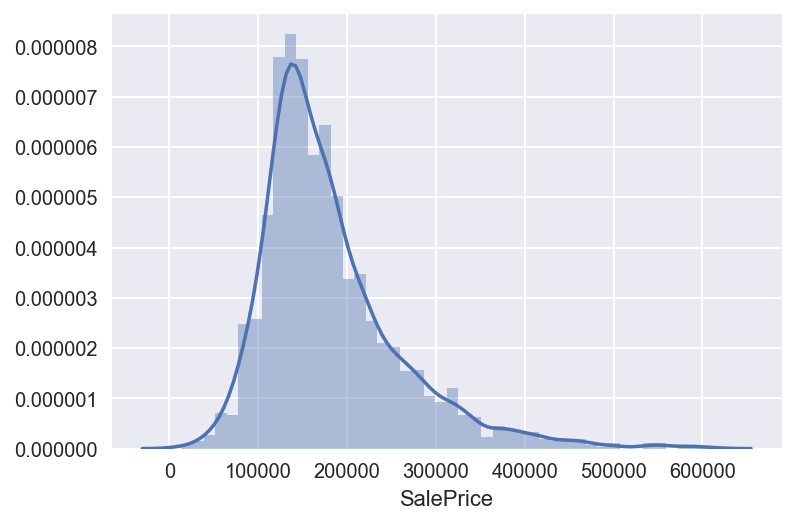

In [9]:
# There is a slight skew to the right.
sns.distplot(ames.SalePrice)
None

In [10]:
ames.isnull().sum()[ames.isnull().sum()>0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

There are a lot of missing values. Probably going to have to drop the columns. If there are only about 2000 rows there comes a 
point where a cut off has to be decided on whether to keep and create the missing data points are drop. Anything over 1000 will
be dropped. For oen rason or another whether it is human error, that feature simply doesn't exist on that property type, or the 
data was not collected; the amount is just too high to fill. Also, I doun't believe these features will add much to the modeling 
process and the majority of these types of data are objects which would mean changing the data type. I don't see the point in
all that work if the features aren't viable sources of analytical importance.

In [11]:
# Trying to get an idea of where the most houses are sold.
ames['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

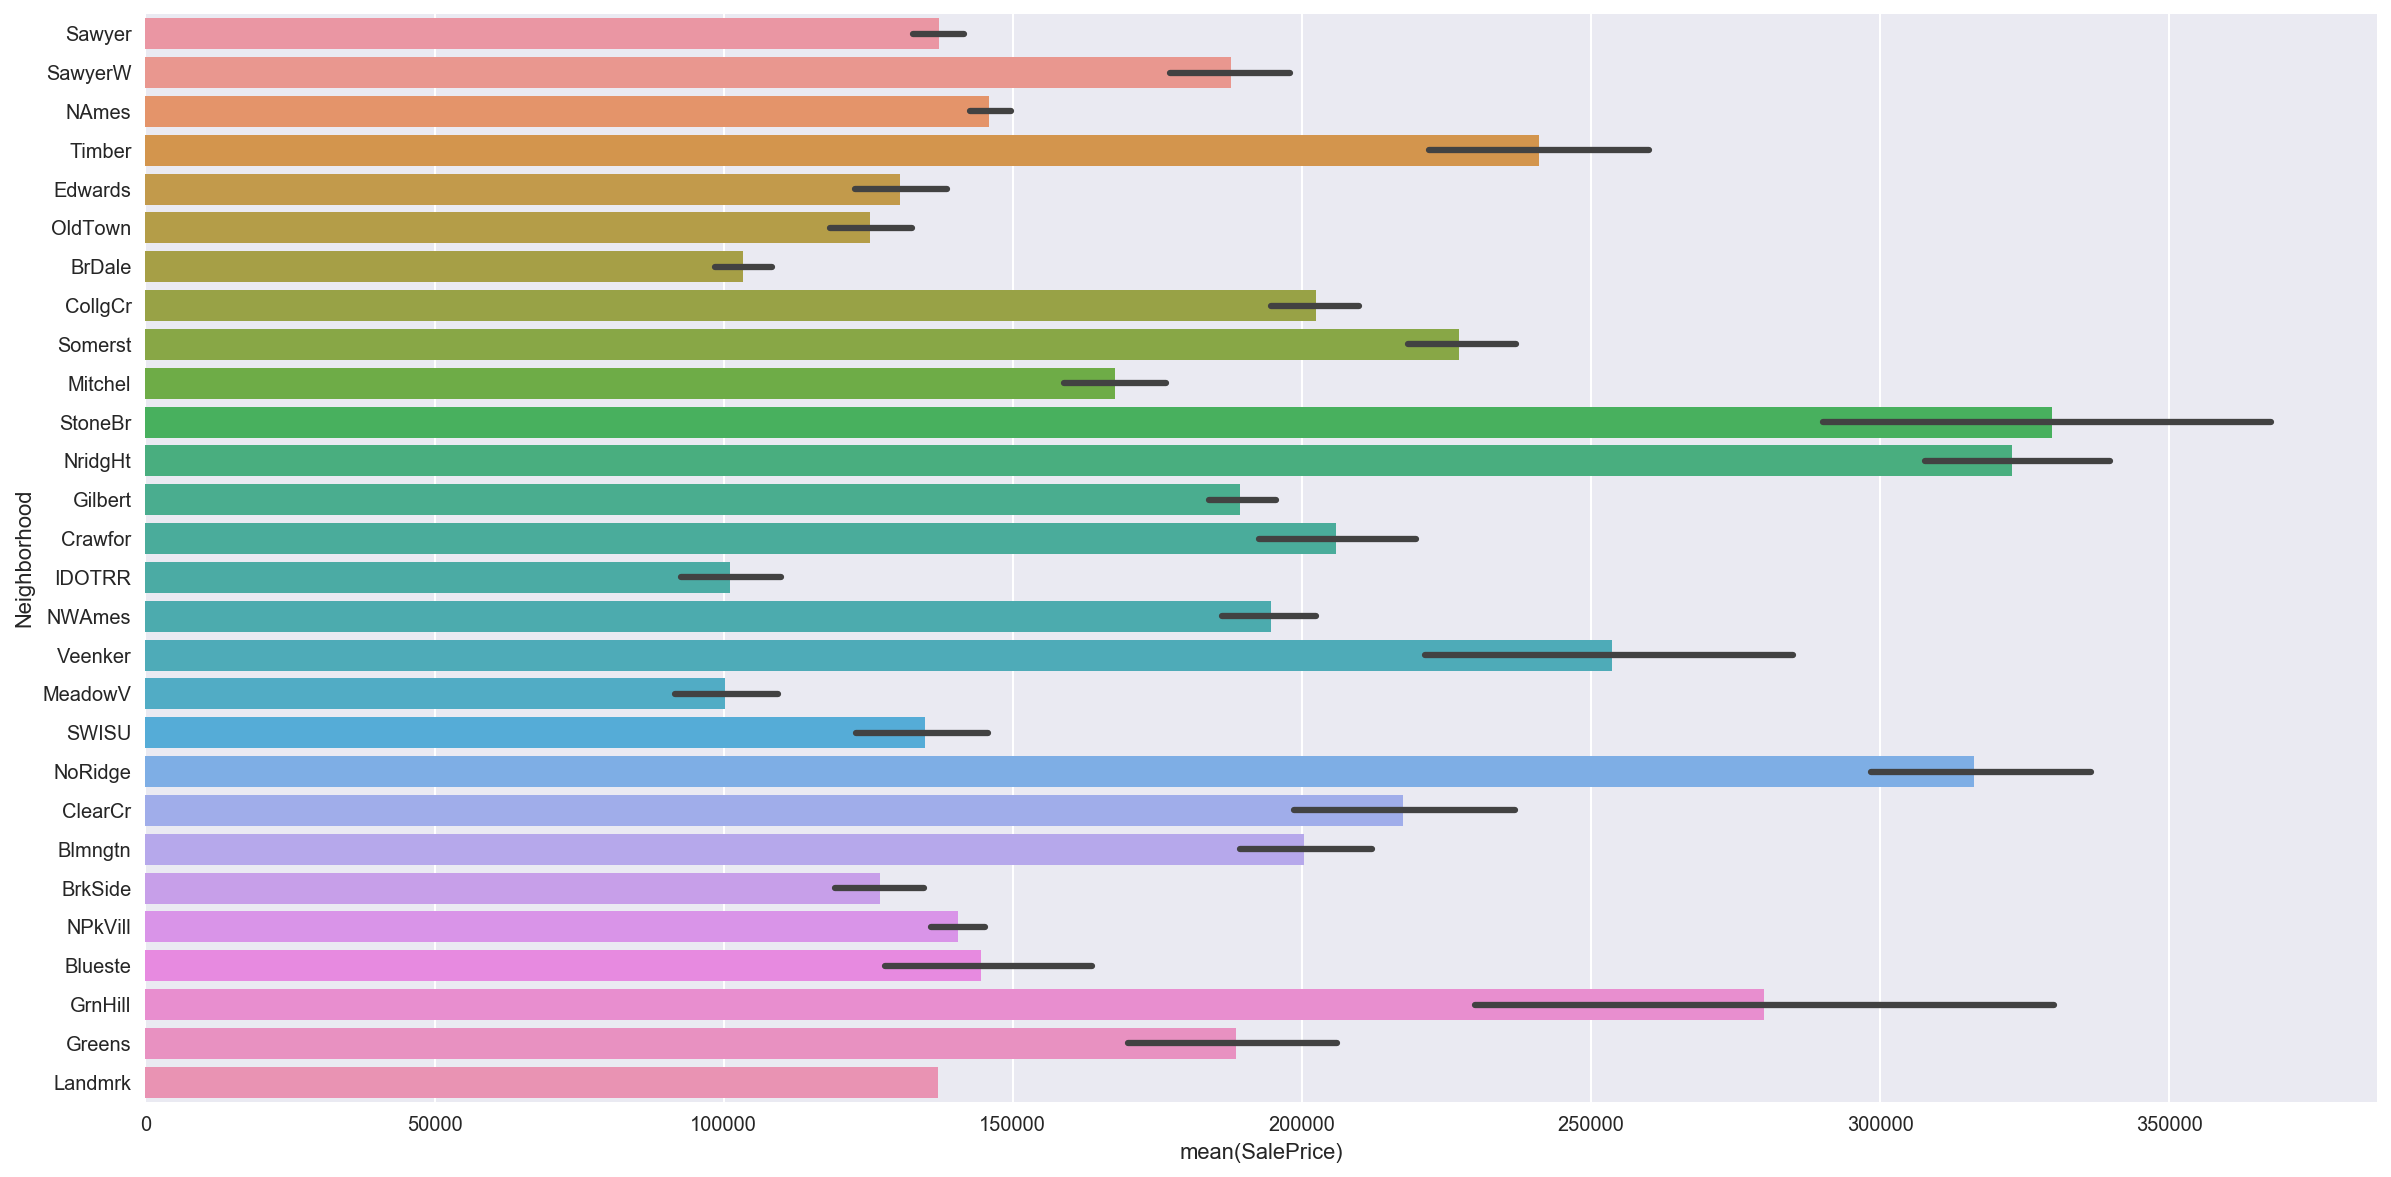

In [12]:
# There are areas where homes are sold at a higher price, but I don't see a relevance to the housing price in general.
# Without a detailed explanation of what the areas are like I can't draw many conclusions.
plt.figure(figsize=(20,10))
sns.barplot(x="SalePrice", y="Neighborhood", data=ames)
None

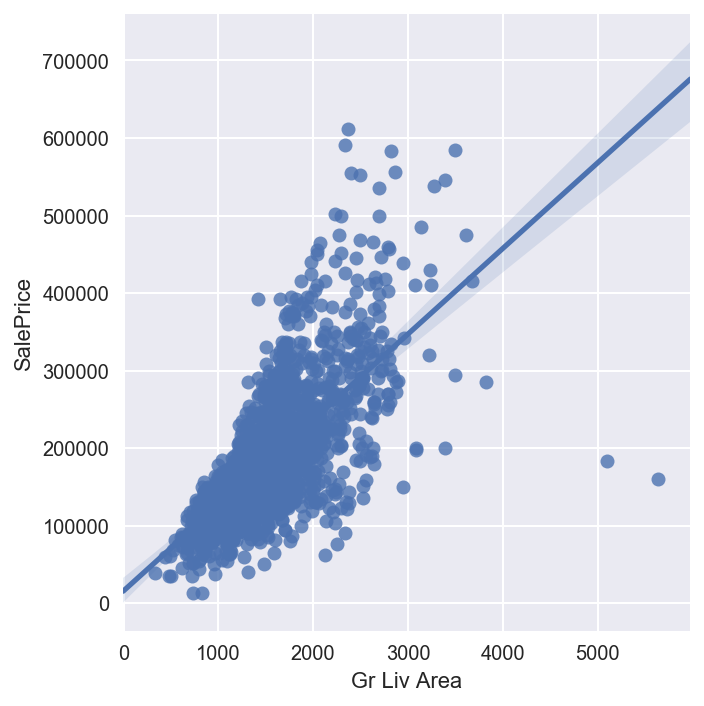

In [13]:
# There seem to be at least two major outliers above the 5000 mark
sns.lmplot(y='SalePrice', x='Gr Liv Area', data=ames)
None

In [14]:
# These seem like outliers. The lot footage is large, the lot area is very large. Looking at the plot they don't seem to belong.
# I'm ging to drop them
ames[ames['Gr Liv Area'] >= 4000]

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
960   1499           60        RL         313.0     63887   Pave   NaN   
1885  2181           20        RL         128.0     39290   Pave   NaN   

     Lot Shape Land Contour Utilities    ...     Pool Area Pool QC Fence  \
960        IR3          Bnk    AllPub    ...           480      Gd   NaN   
1885       IR1          Bnk    AllPub    ...             0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
960           NaN        0       1    2008        New         Partial   
1885         Elev    17000      10    2007        New         Partial   

      SalePrice  
960      160000  
1885     183850  

[2 rows x 81 columns]

In [15]:
ames.drop(960, inplace = True)

In [16]:
ames.drop(1885, inplace = True)

In [17]:
#Pool QC has 2042 null values so I decided to drop it
ames.drop('Pool QC', axis = 1, inplace = True)

In [18]:
# Misc Feature has 1986 null values so I decided to drop it
ames.drop('Misc Feature', axis = 1, inplace = True)

In [19]:
# Alley has 1911 null values so I decided to drop it
ames.drop('Alley', axis = 1, inplace = True)

In [20]:
# Fence has 1651 null values so I decided to drop it
ames.drop('Fence', axis = 1, inplace = True)

In [21]:
# Fireplace Qu has 1000 null values so I decided to drop it
ames.drop('Fireplace Qu', axis = 1, inplace = True)

In [22]:
ames.shape

(2049, 76)

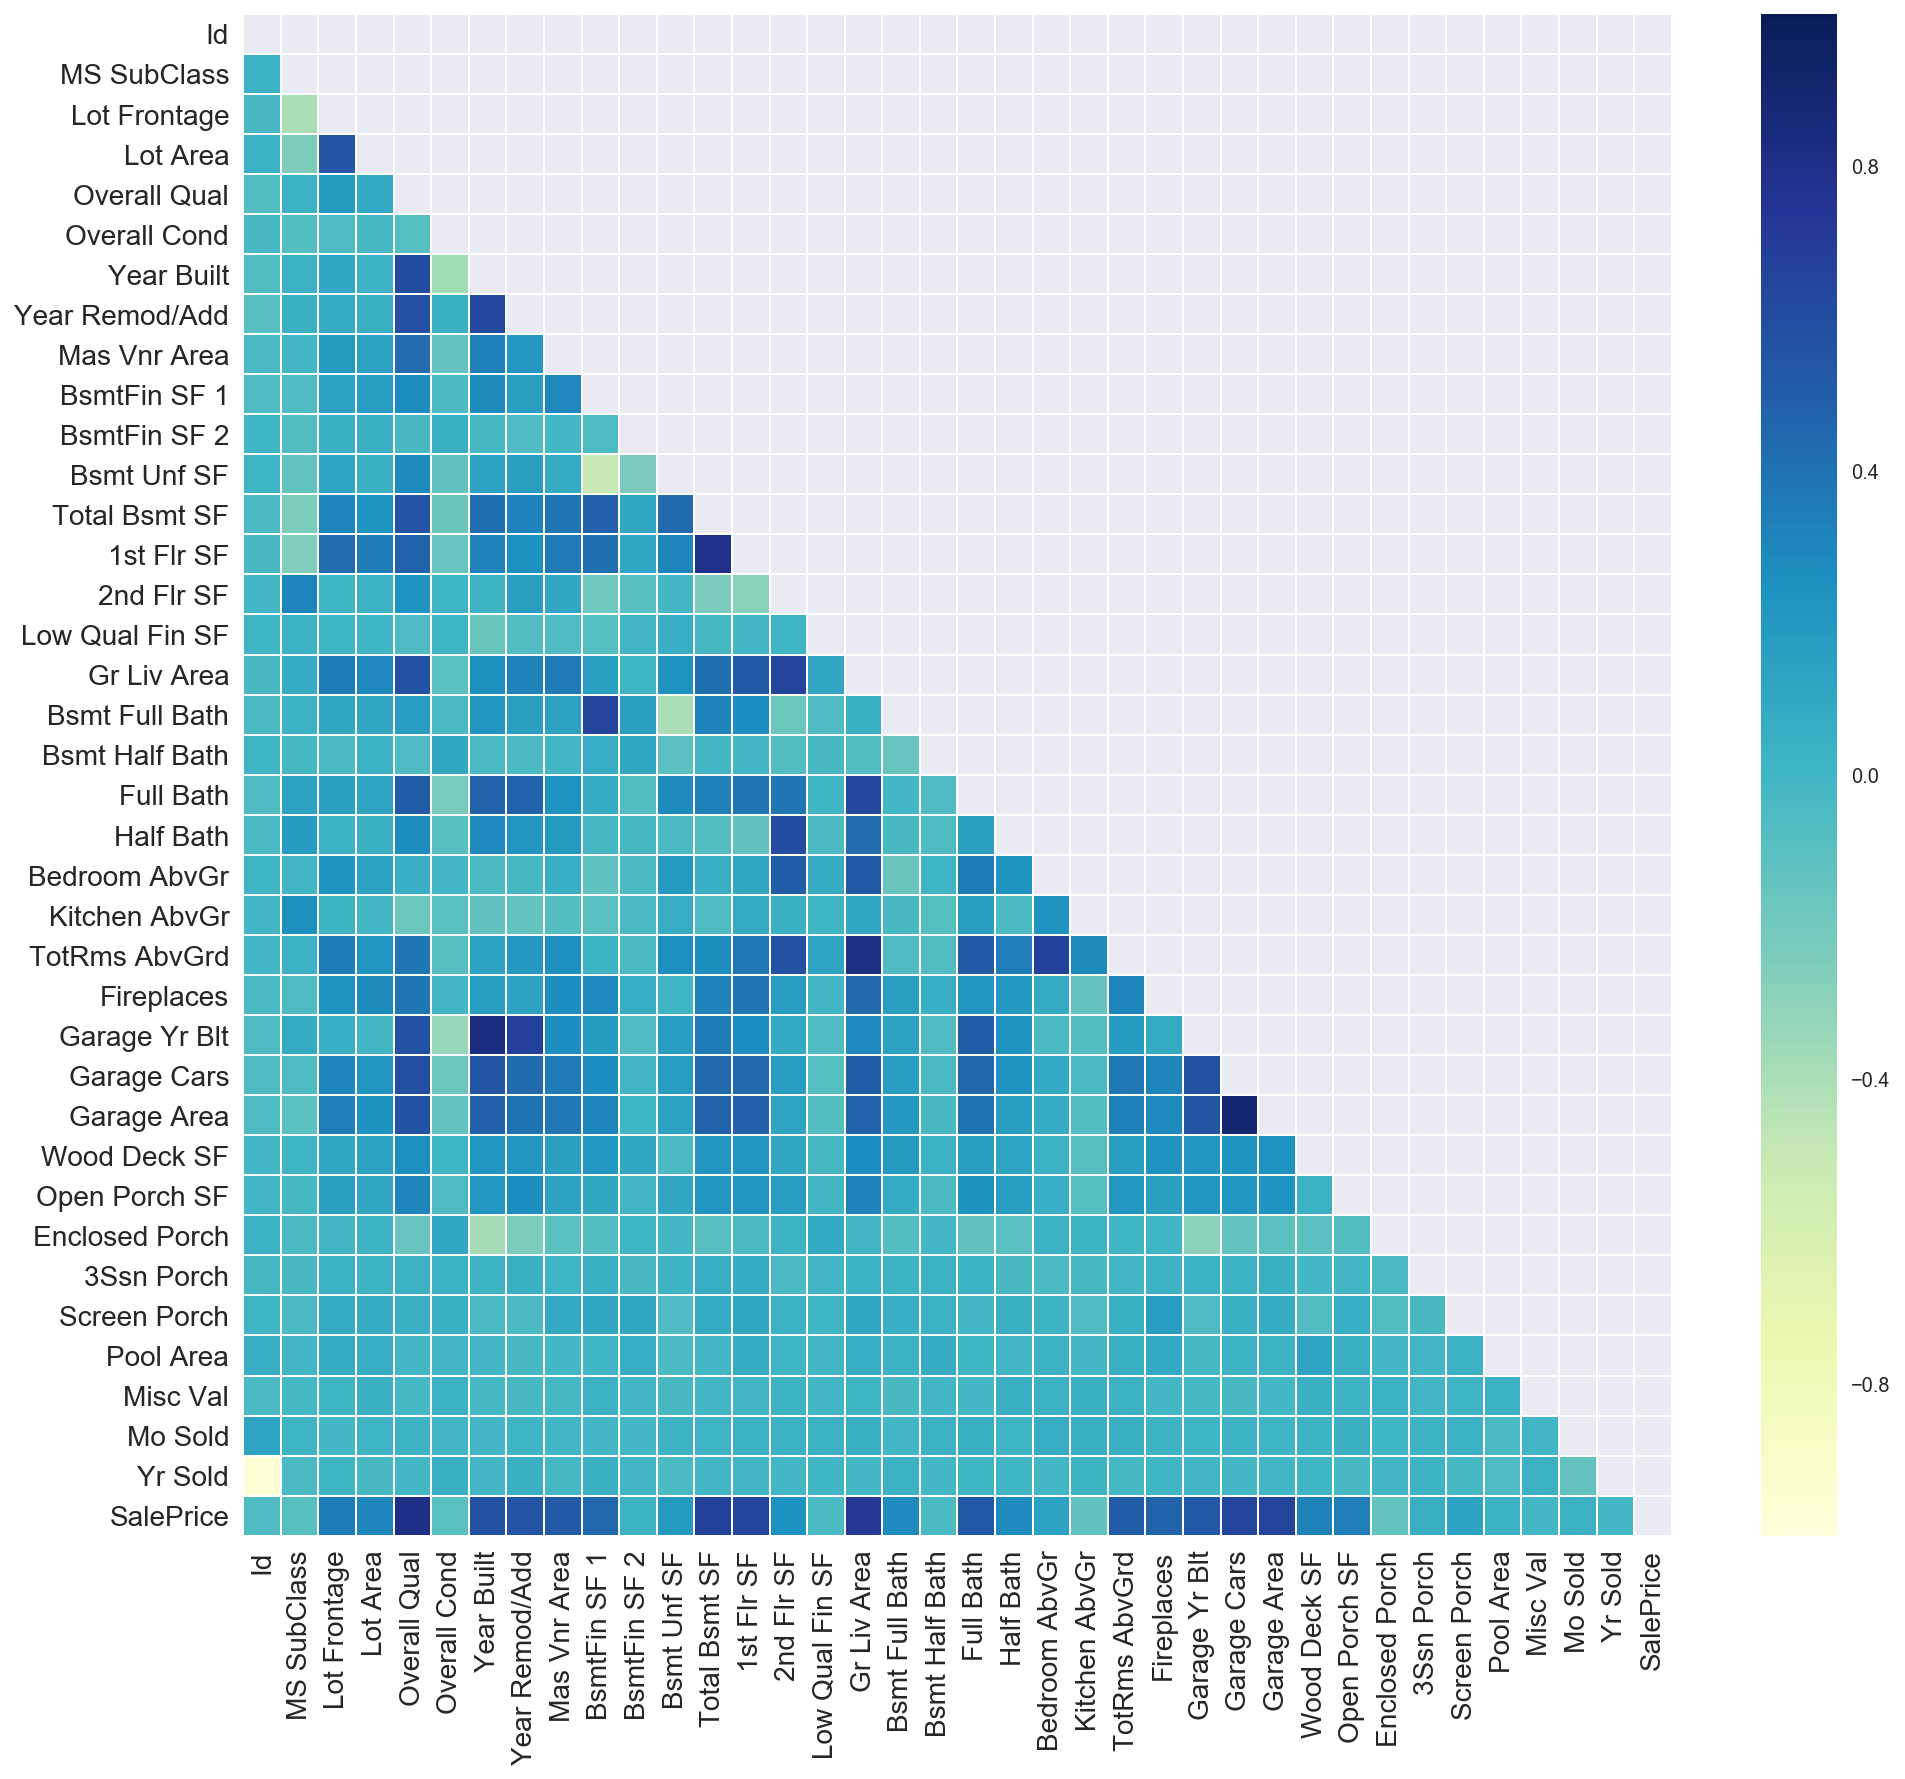

In [23]:
#Starting to scale down feature selections
corr = ames.corr()

fig, ax = plt.subplots(figsize=(16,14))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax, cmap="YlGnBu",  linewidths=.5)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

In [24]:
# Going to drop some of the negative correlations and some features that just don't seem to correlte well in general.
ames.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.803462
Gr Liv Area        0.719463
Total Bsmt SF      0.664819
Garage Area        0.655483
Garage Cars        0.648667
1st Flr SF         0.648252
Year Built         0.572405
Year Remod/Add     0.550872
Full Bath          0.538225
Garage Yr Blt      0.534514
Mas Vnr Area       0.520023
TotRms AbvGrd      0.509775
Fireplaces         0.473783
BsmtFin SF 1       0.445764
Lot Frontage       0.355530
Open Porch SF      0.338545
Wood Deck SF       0.327629
Lot Area           0.303744
Bsmt Full Bath     0.284763
Half Bath          0.283372
2nd Flr SF         0.248826
Bsmt Unf SF        0.190231
Bedroom AbvGr      0.137145
Screen Porch       0.134555
3Ssn Porch         0.048721
Mo Sold            0.032508
Pool Area          0.025805
BsmtFin SF 2       0.016222
Misc Val          -0.010323
Yr Sold           -0.015174
Low Qual Fin SF   -0.041608
Bsmt Half Bath    -0.045571
Id                -0.051416
MS SubClass       -0.087331
Overall Cond      -0

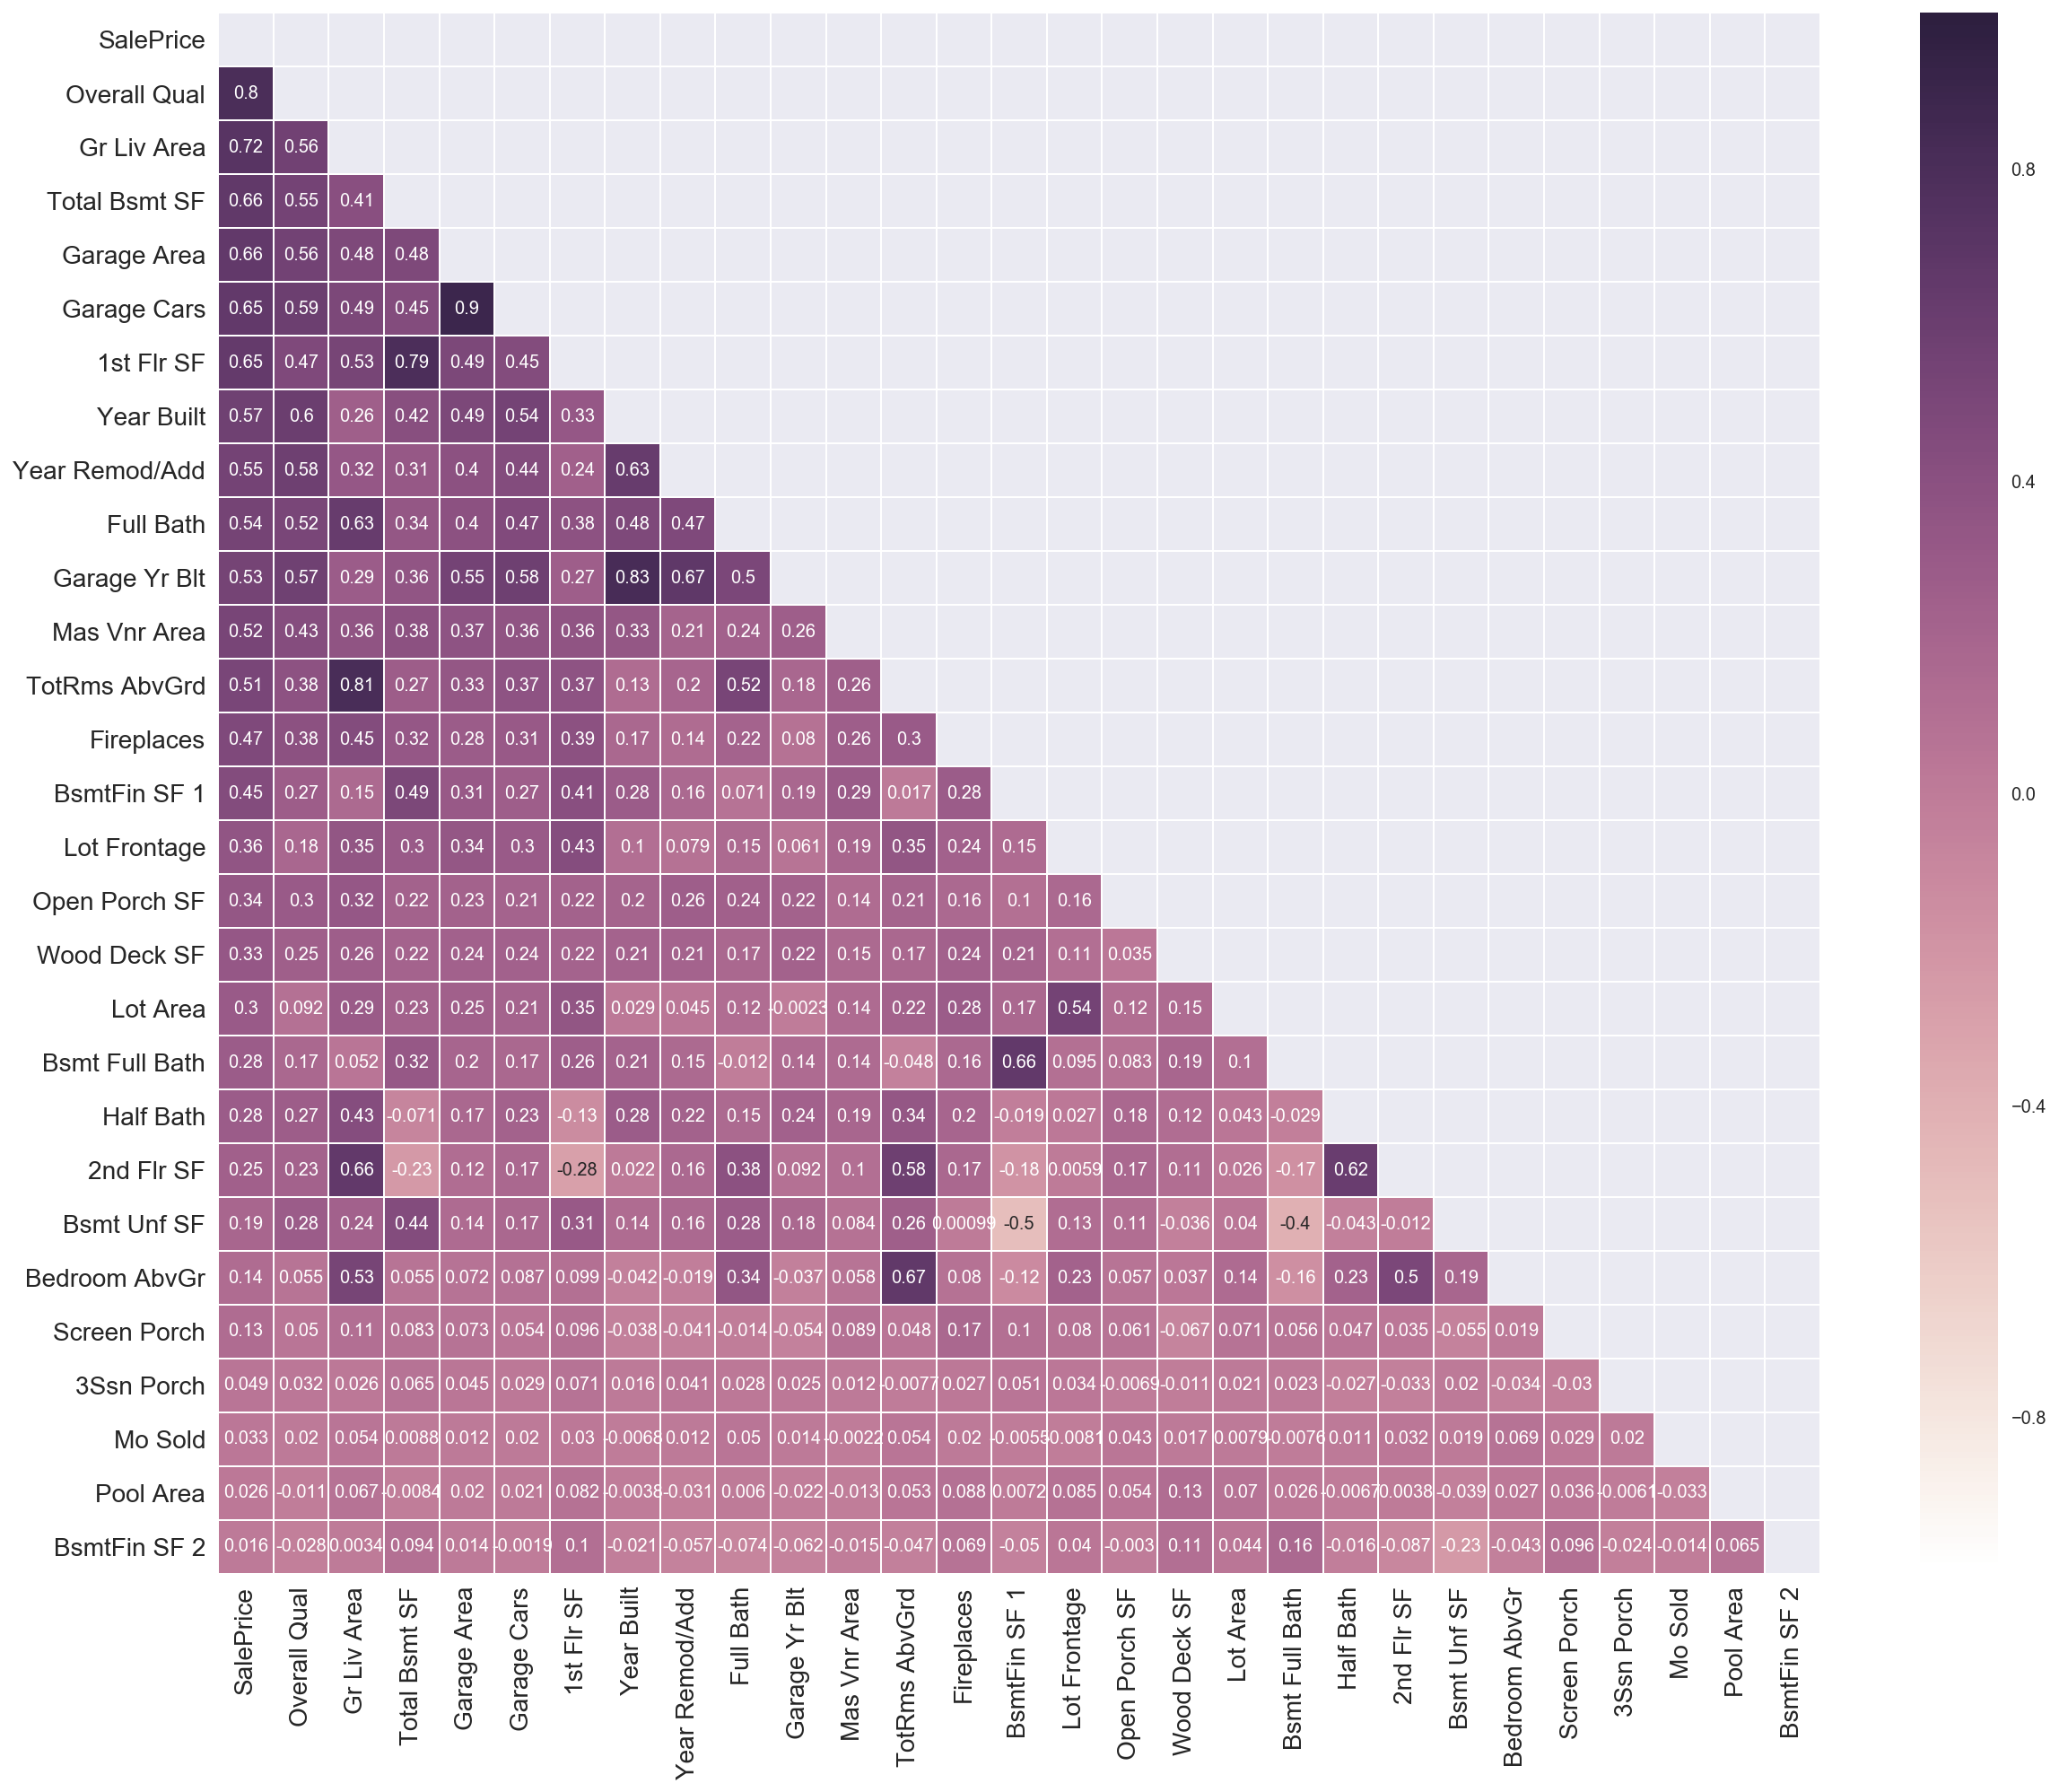

In [25]:
#Continuing to scale down feature selections
area_corr = ames[['SalePrice','Overall Qual','Gr Liv Area','Total Bsmt SF','Garage Area','Garage Cars','1st Flr SF','Year Built',
                  'Year Remod/Add','Full Bath','Garage Yr Blt','Mas Vnr Area','TotRms AbvGrd','Fireplaces','BsmtFin SF 1',
                  'Lot Frontage','Open Porch SF','Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath','2nd Flr SF',
                  'Bsmt Unf SF','Bedroom AbvGr','Screen Porch','3Ssn Porch','Mo Sold','Pool Area','BsmtFin SF 2']].corr()

fig, ax = plt.subplots(figsize=(20,16))

mask = np.zeros_like(area_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

ax = sns.heatmap(area_corr, ax=ax,mask=mask, annot=True, cmap=cmap, linewidths=.5)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

In [26]:
# Now that teh features have been reviewed, Im going to start going through them and examining them more carefully to determine
# whether they will be dropped, changed, ultimately chosen as a selected features.
area_corr.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
Overall Qual      0.937395
Garage Cars       0.858514
Garage Area       0.857093
Total Bsmt SF     0.762182
Year Built        0.742553
Mas Vnr Area      0.739626
1st Flr SF        0.733745
Year Remod/Add    0.723601
Garage Yr Blt     0.713859
Full Bath         0.706067
Gr Liv Area       0.678782
Fireplaces        0.572665
BsmtFin SF 1      0.494329
TotRms AbvGrd     0.450765
Open Porch SF     0.420950
Wood Deck SF      0.383556
Lot Frontage      0.350077
Bsmt Unf SF       0.286972
Bsmt Full Bath    0.278515
Lot Area          0.227140
Half Bath         0.199091
2nd Flr SF        0.082980
Bedroom AbvGr    -0.014663
Screen Porch     -0.108474
3Ssn Porch       -0.172997
Mo Sold          -0.259579
BsmtFin SF 2     -0.262294
Pool Area        -0.287212
Name: SalePrice, dtype: float64

In [27]:
# fill in missing points for Lot Frontage.
# The mean is 68.87, Median is 68, and the Mode is 60.
print(ames['Lot Frontage'].describe())
from scipy.stats import mode

print('Mode', mode(ames['Lot Frontage']))

count    1719.000000
mean       68.878999
std        22.472112
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64
Mode ModeResult(mode=array([ 60.]), count=array([179]))


In [28]:
# Decided to go with median to fill in the missing values.
strategy = 'median' 

LF_imputer = Imputer(strategy=strategy)
LF_imputer.fit(ames[['Lot Frontage']])

LFs = LF_imputer.transform(
    ames[['Lot Frontage']])
print(LFs[0:5], LFs.mean())

[[ 68.]
 [ 43.]
 [ 68.]
 [ 73.]
 [ 82.]] 68.7374328941


In [29]:
# Imputered the missing values and added them to the column.
ames['Lot Frontage']=LFs

In [30]:
ames.isnull().sum()[ames.isnull().sum()>0]

Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Qual          55
Bsmt Cond          55
Bsmt Exposure      58
BsmtFin Type 1     55
BsmtFin SF 1        1
BsmtFin Type 2     56
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Type       113
Garage Yr Blt     114
Garage Finish     114
Garage Cars         1
Garage Area         1
Garage Qual       114
Garage Cond       114
dtype: int64

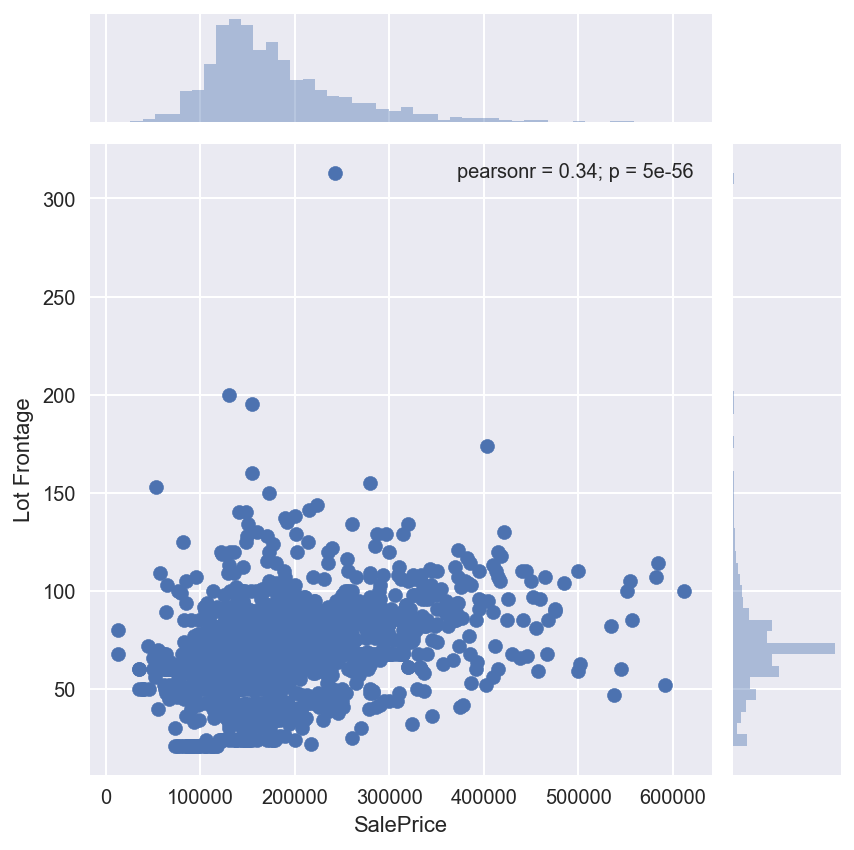

In [31]:
# That Frontage over 300 could be an outlier or it could just be a house with a large front yard.
sns.jointplot(x ="SalePrice", y= "Lot Frontage" , data=ames)
None

In [32]:
# The house has a large Lot area so I'm not that concerned anymore about the large Lot Frontage. It seems the plot is just large.
ames[ames['Lot Frontage'] >= 250]

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
1335  1266           20        RL         313.0     27650   Pave       IR2   

     Land Contour Utilities Lot Config    ...     Enclosed Porch 3Ssn Porch  \
1335          HLS    AllPub     Inside    ...                  0          0   

     Screen Porch Pool Area Misc Val Mo Sold  Yr Sold  Sale Type  \
1335            0         0        0      11     2008        WD    

      Sale Condition  SalePrice  
1335          Normal     242000  

[1 rows x 76 columns]

In [33]:
ames['Lot Area'].describe()

count      2049.000000
mean      10024.677892
std        6608.511749
min        1300.000000
25%        7500.000000
50%        9405.000000
75%       11500.000000
max      159000.000000
Name: Lot Area, dtype: float64

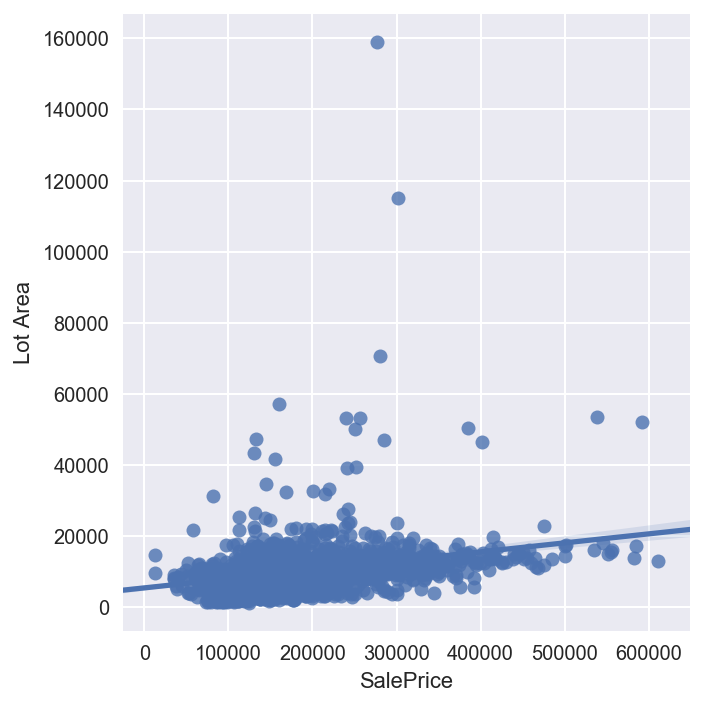

In [34]:
# These seem like outliers. They are on cul du sacs. There are 131 and none of the others are that large. It just doesn't seem
# right.
sns.lmplot(x='SalePrice', y='Lot Area', data=ames)
None

In [35]:
# I'm going to drop them. Even if the numbers are real its only two and if it makes a large different in .describe() I'll
# undo it
ames[ames['Lot Area'] >= 100000]

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
471  2116           50        RL          68.0    159000   Pave       IR2   
694  2072           20        RL          68.0    115149   Pave       IR2   

    Land Contour Utilities Lot Config    ...     Enclosed Porch 3Ssn Porch  \
471          Low    AllPub    CulDSac    ...                  0          0   
694          Low    AllPub    CulDSac    ...                  0          0   

    Screen Porch Pool Area Misc Val Mo Sold  Yr Sold  Sale Type  \
471            0         0      500       6     2007        WD    
694            0         0        0       6     2007        WD    

     Sale Condition  SalePrice  
471          Normal     277000  
694          Normal     302000  

[2 rows x 76 columns]

In [36]:
# 131 Cul du sacs. Its not like they are all that size. Only two with such a large lot area. Doesn't seem possible and even if
# it is I belive it would distort the data slightly since Lot area and Lot Frontage are two Features I want to use to predict with.
ames['Lot Config'].value_counts()

Inside     1502
Corner      347
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

In [37]:
ames.drop(471, inplace = True)

In [38]:
ames.drop(694, inplace = True)

In [39]:
ames.shape

(2047, 76)

In [40]:
ames[ames['Total Bsmt SF'] <= 0].sort_values('MS SubClass')

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
954   2622           20        RL          60.0      7200   Pave       Reg   
794   1255           20        RL          60.0     10122   Pave       Reg   
635   2904           20   A (agr)         125.0     31250   Pave       Reg   
616   1498           20        RL         123.0     47007   Pave       IR1   
1222  1326           20        RM          70.0     12702   Pave       Reg   
1252   244           20        RL          60.0     11100   Pave       Reg   
1331   650           20        RL          75.0      9533   Pave       Reg   
790   1205           20        RL          74.0      7785   Pave       IR1   
1387   787           20        RL          68.0     13680   Pave       IR1   
485    155           20        RL          60.0      7200   Pave       Reg   
256   2745           20        RL          77.0      8335   Pave       Reg   
1481  2701           20        RL         100.0     21370   Pave       Reg   
240   2740           20        RL          80.0     12048   Pave       Reg   
183   1554           20   A (agr)          80.0     14584   Pave       Reg   
1684  2004           20        RM          52.0      8626   Pave       Reg   
114    781           20        RL          68.0      9000   Pave       Reg   
1875  2279           20        RL         200.0     43500   Pave       Reg   
1428  1902           20        RL          50.0      5000   Pave       Reg   
737    788           20        RL          68.0     15635   Pave       IR1   
1089   709           30        RM          50.0      5925   Pave       Reg   
1022  2703           30        RL          55.0      8250   Pave       Reg   
2010  2880           30   C (all)          69.0     12366   Pave       Reg   
581    946           30   I (all)         109.0     21780   Grvl       Reg   
696    274           30        RL          67.0      8777   Pave       Reg   
514   2082           30        RL          68.0     11515   Pave       IR1   
249   2242           50        RM          64.0     11067   Pave       Reg   
933   1375           50        RL          80.0     17120   Pave       Reg   
1157   897           50        RL          50.0      8405   Pave       Reg   
1933  2338           60        RL          68.0     14762   Pave       IR2   
12     807           70        RL         120.0     26400   Pave       Reg   
146    888           85        RL          64.0      7301   Pave       Reg   
390     84           90        RM          68.0      8930   Pave       Reg   
1681  1899           90        RL          70.0      9842   Pave       Reg   
1859  2625           90        RL          60.0      8544   Pave       Reg   
1620   815           90        RL          64.0      7007   Pave       Reg   
1594  1502           90        RL          65.0      6012   Pave       Reg   
93     811           90        RL          64.0      7018   Pave       Reg   
1889   810           90        RL          64.0      7018   Pave       Reg   
1686  2627           90        RL          60.0      8544   Pave       Reg   
437   1501           90        RL          65.0      6040   Pave       Reg   
1256   813           90        RL          64.0      7018   Pave       Reg   
499    812           90        RL          64.0      7018   Pave       Reg   
1270  1569           90        RL          76.0     10260   Pave       Reg   
772    679           90        RL          60.0      7200   Pave       Reg   
580   1504           90        RL          74.0      6845   Pave       Reg   
1125  2626           90        RL          68.0      8544   Pave       Reg   
1049  2177           90        RL          68.0      9555   Pave       IR1   
642    953           90        RL          75.0     10125   Pave       Reg   
1007  1880           90        RL          68.0     10899   Pave       IR1   
924    677           90        RL          60.0      8544   Pave       Reg   
1377  2707           90       

Houses in the midwest should have basements. I belive these 0 sq footages are over sights. All the house types are 
different. The Zoning are almost all the same. It doesn't make sense that there would be no basement. I'm going to have to
imputer for each MS SubClass. 
Upon further anaylsis and comparisons with the feature dictionary, there are certain features that have NA for basements and they are the same as the MS SubClass Total Bsmnt Sf below. So since they have that NA that means there really is no basement. So this is not an oversight. Maybe they have root cellars or possibily fall out shelters in the their backyards which would explain why there are no basements. so I'm not going to try and dummize the Ms SubClass and then imputer all the 0.0. I'm going to leave them as they are based on the facts above.

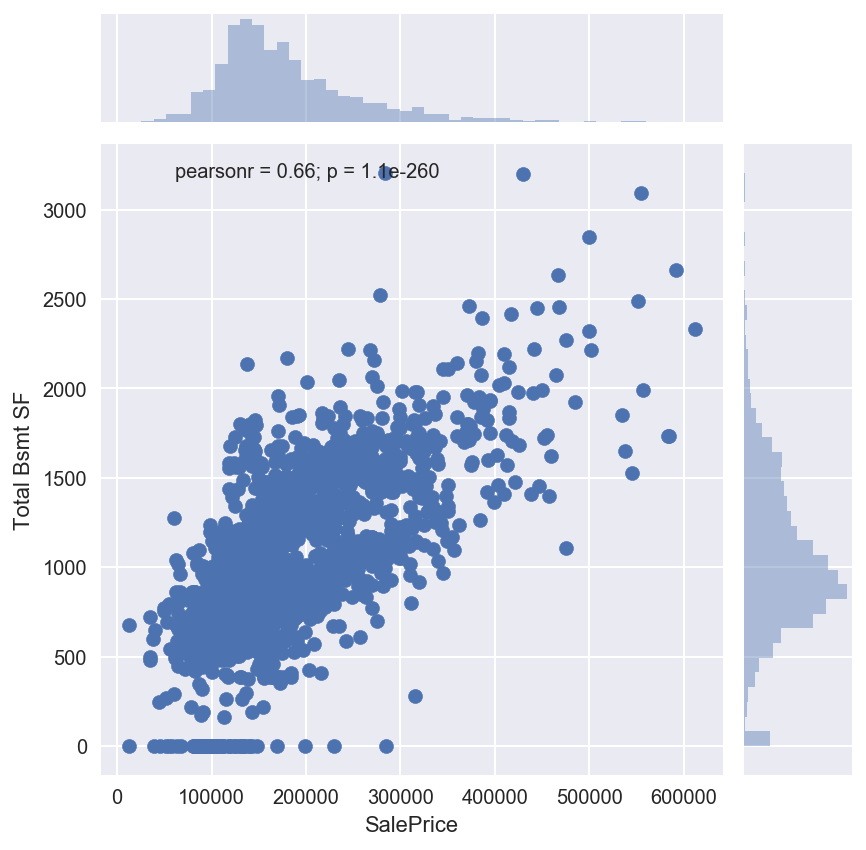

In [41]:
# Graph would be better with out all the 0.0
sns.jointplot(x ="SalePrice", y= "Total Bsmt SF" , data=ames)
None

In [42]:
#ames['MS SubClass'].value_counts()
#ames['MS SubClass'].nunique()

In [43]:
#filled in Nan with value
ames['Total Bsmt SF'].fillna(0, inplace=True)

In [44]:
#twenty = ames[ames['MS SubClass'] == 20]; twenty.shape
#ames.shape
# # The mean is 1257, Median is 1230, and the Mode is 864
#print(twenty['Total Bsmt SF'].describe())
#print('Mode', mode(twenty['Total Bsmt SF']))
#strategy = 'median' 

#T_imputer = Imputer(strategy=strategy)
#T_imputer.fit(twenty[['Total Bsmt SF']])

#Ts = T_imputer.transform(
#    twenty[['Total Bsmt SF']])
#print(Ts[0:5], Ts.mean())

In [45]:
# The first three columns add up to Gr Liv Area. I dont need to use them in my modeling becasue they are already included.
ames[['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area']].head()

1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area
0         725         754                0         1479
1         913        1209                0         2122
2        1057           0                0         1057
3         744         700                0         1444
4         831         614                0         1445

In [46]:
ames[['Overall Qual']].describe()

Overall Qual
count   2047.000000
mean       6.107963
std        1.422336
min        1.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       10.000000

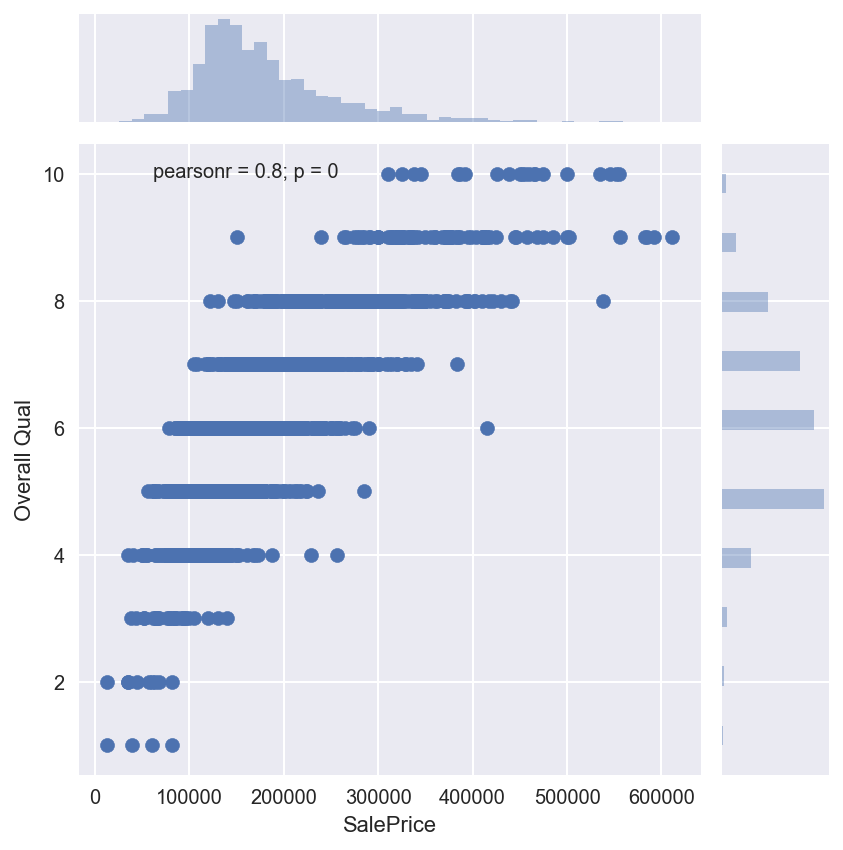

In [47]:
sns.jointplot(x="SalePrice", y="Overall Qual", data=ames)
None

In [48]:
ames[['Overall Cond']].describe()

Overall Cond
count   2047.000000
mean       5.562286
std        1.104910
min        1.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        9.000000

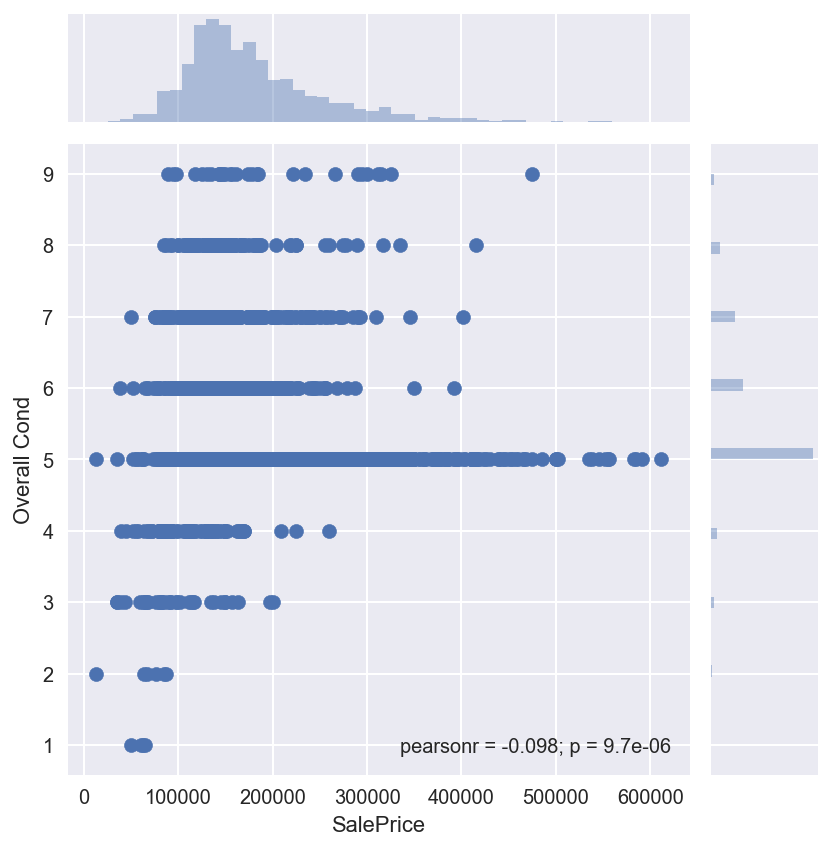

In [49]:
sns.jointplot(x="SalePrice", y="Overall Cond", data=ames)
None

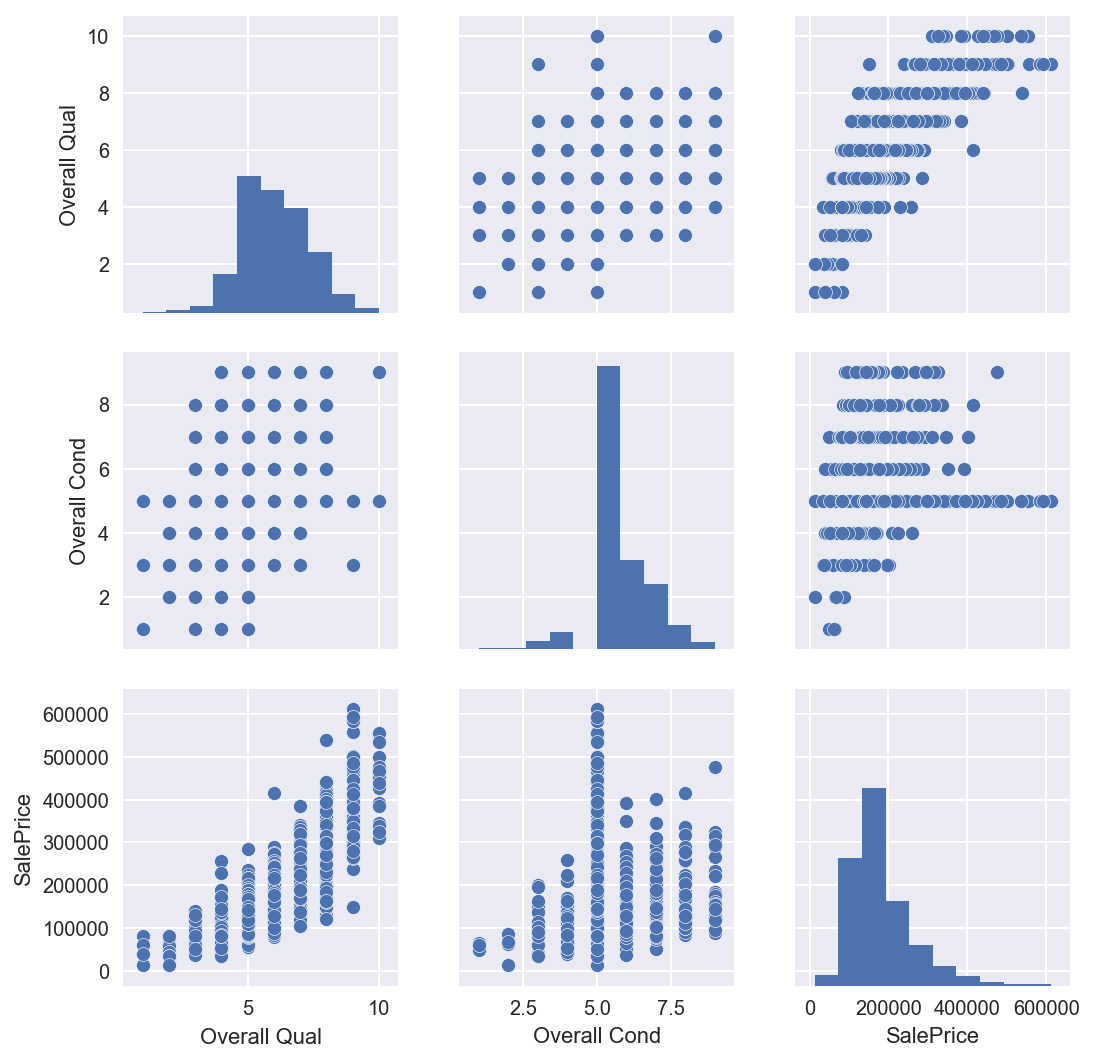

In [50]:
sns.pairplot(ames[['Overall Qual','Overall Cond','SalePrice']])
None

I dont understand why the corrleation is so poor for Overall Cond and Sale Price. The data is partically the same for
Overall Cond and Overall Qual but it does not relate well to Sale Price at all. The correlation is so low, and I know 
causality doesn't mean correlation but the numbers don't lie. I would be weary to try it as a predictor. Maybe I should and if
causes horrible models I'll drop it but compared to Overall Cond one would think there would be correlation. The correlation and p-values are in the negatives for Overall Qual compared to Overall Cond which is in the postivites and has great value. I wish I had more time to further anaylze the two features just to understand why the vast diffrence.

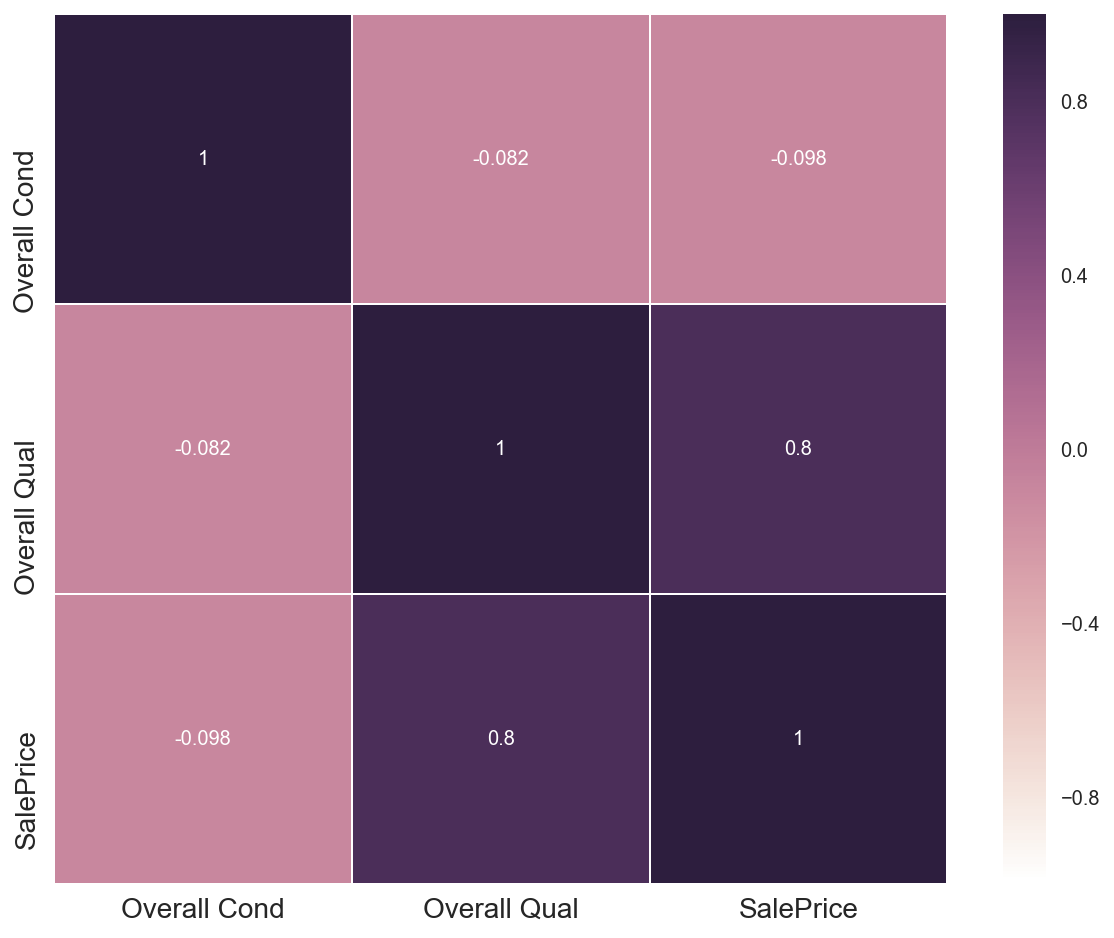

In [51]:
over_corr = ames[['Overall Cond', 'Overall Qual', 'SalePrice']].corr()

fig, ax = plt.subplots(figsize=(10,8))

#mask = np.zeros_like(area_corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

ax = sns.heatmap(over_corr, ax=ax, annot=True, cmap=cmap, linewidths=.5)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

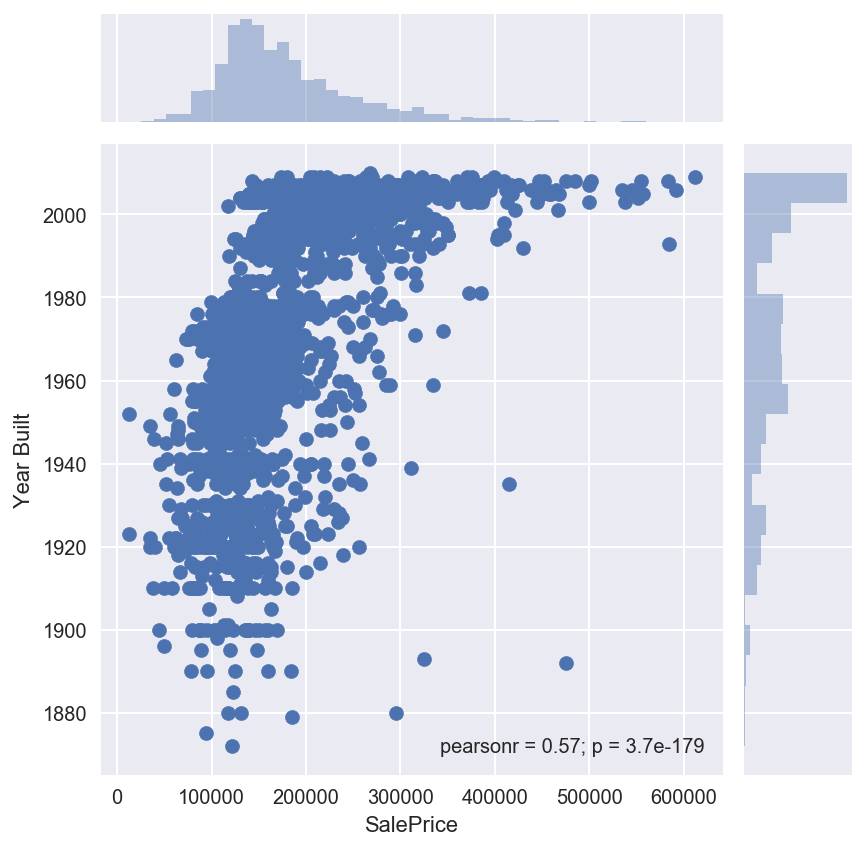

In [52]:
# Seem to be a few that were sold at a much higher price compared to the other houses but without further analysis I won't know
# why. I also don't think it is important at this time. Those houses could be bigger, have more rooms, bathrooms etc and thus
# have sold for more.
sns.jointplot(x="SalePrice", y="Year Built", data=ames)
None

In [53]:
# According to the description TotRms AbvGrd contains bedroom and kitchen so I dont need to use those are features. But it 
# clearly states it does not include bathrooms. I need to find a way of concatenating the bathrooms into one column and 
#possibiliy changing the half bathrooms to 0.5 instead of 1 but I need to think if that will really make a difference.
ames[['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd']].head(10)

Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2          1              3   
4             0.0             0.0          2          0              3   
5             0.0             0.0          2          1              2   
6             1.0             0.0          2          0              2   
7             1.0             0.0          1          0              3   
8             0.0             0.0          1          0              2   
9             0.0             1.0          1          2              5   

   Kitchen AbvGr  TotRms AbvGrd  
0              1              6  
1              1              8  
2              1              5  
3              1              7  
4              1              6  
5              1              6  
6              1              5  
7              1              6  
8              1              6  
9              1              9

In [54]:
# Wood Deck has a very high max compared to the others. Though techincally a deck is different from a porch
ames[['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']].describe()

Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  Screen Porch
count   2047.000000    2047.000000     2047.000000  2047.000000   2047.000000
mean      93.460186      47.199316       22.616023     2.596483     16.543723
std      128.085146      65.880408       59.895250    25.254005     57.425611
min        0.000000       0.000000        0.000000     0.000000      0.000000
25%        0.000000       0.000000        0.000000     0.000000      0.000000
50%        0.000000      26.000000        0.000000     0.000000      0.000000
75%      168.000000      70.000000        0.000000     0.000000      0.000000
max     1424.000000     547.000000      432.000000   508.000000    490.000000

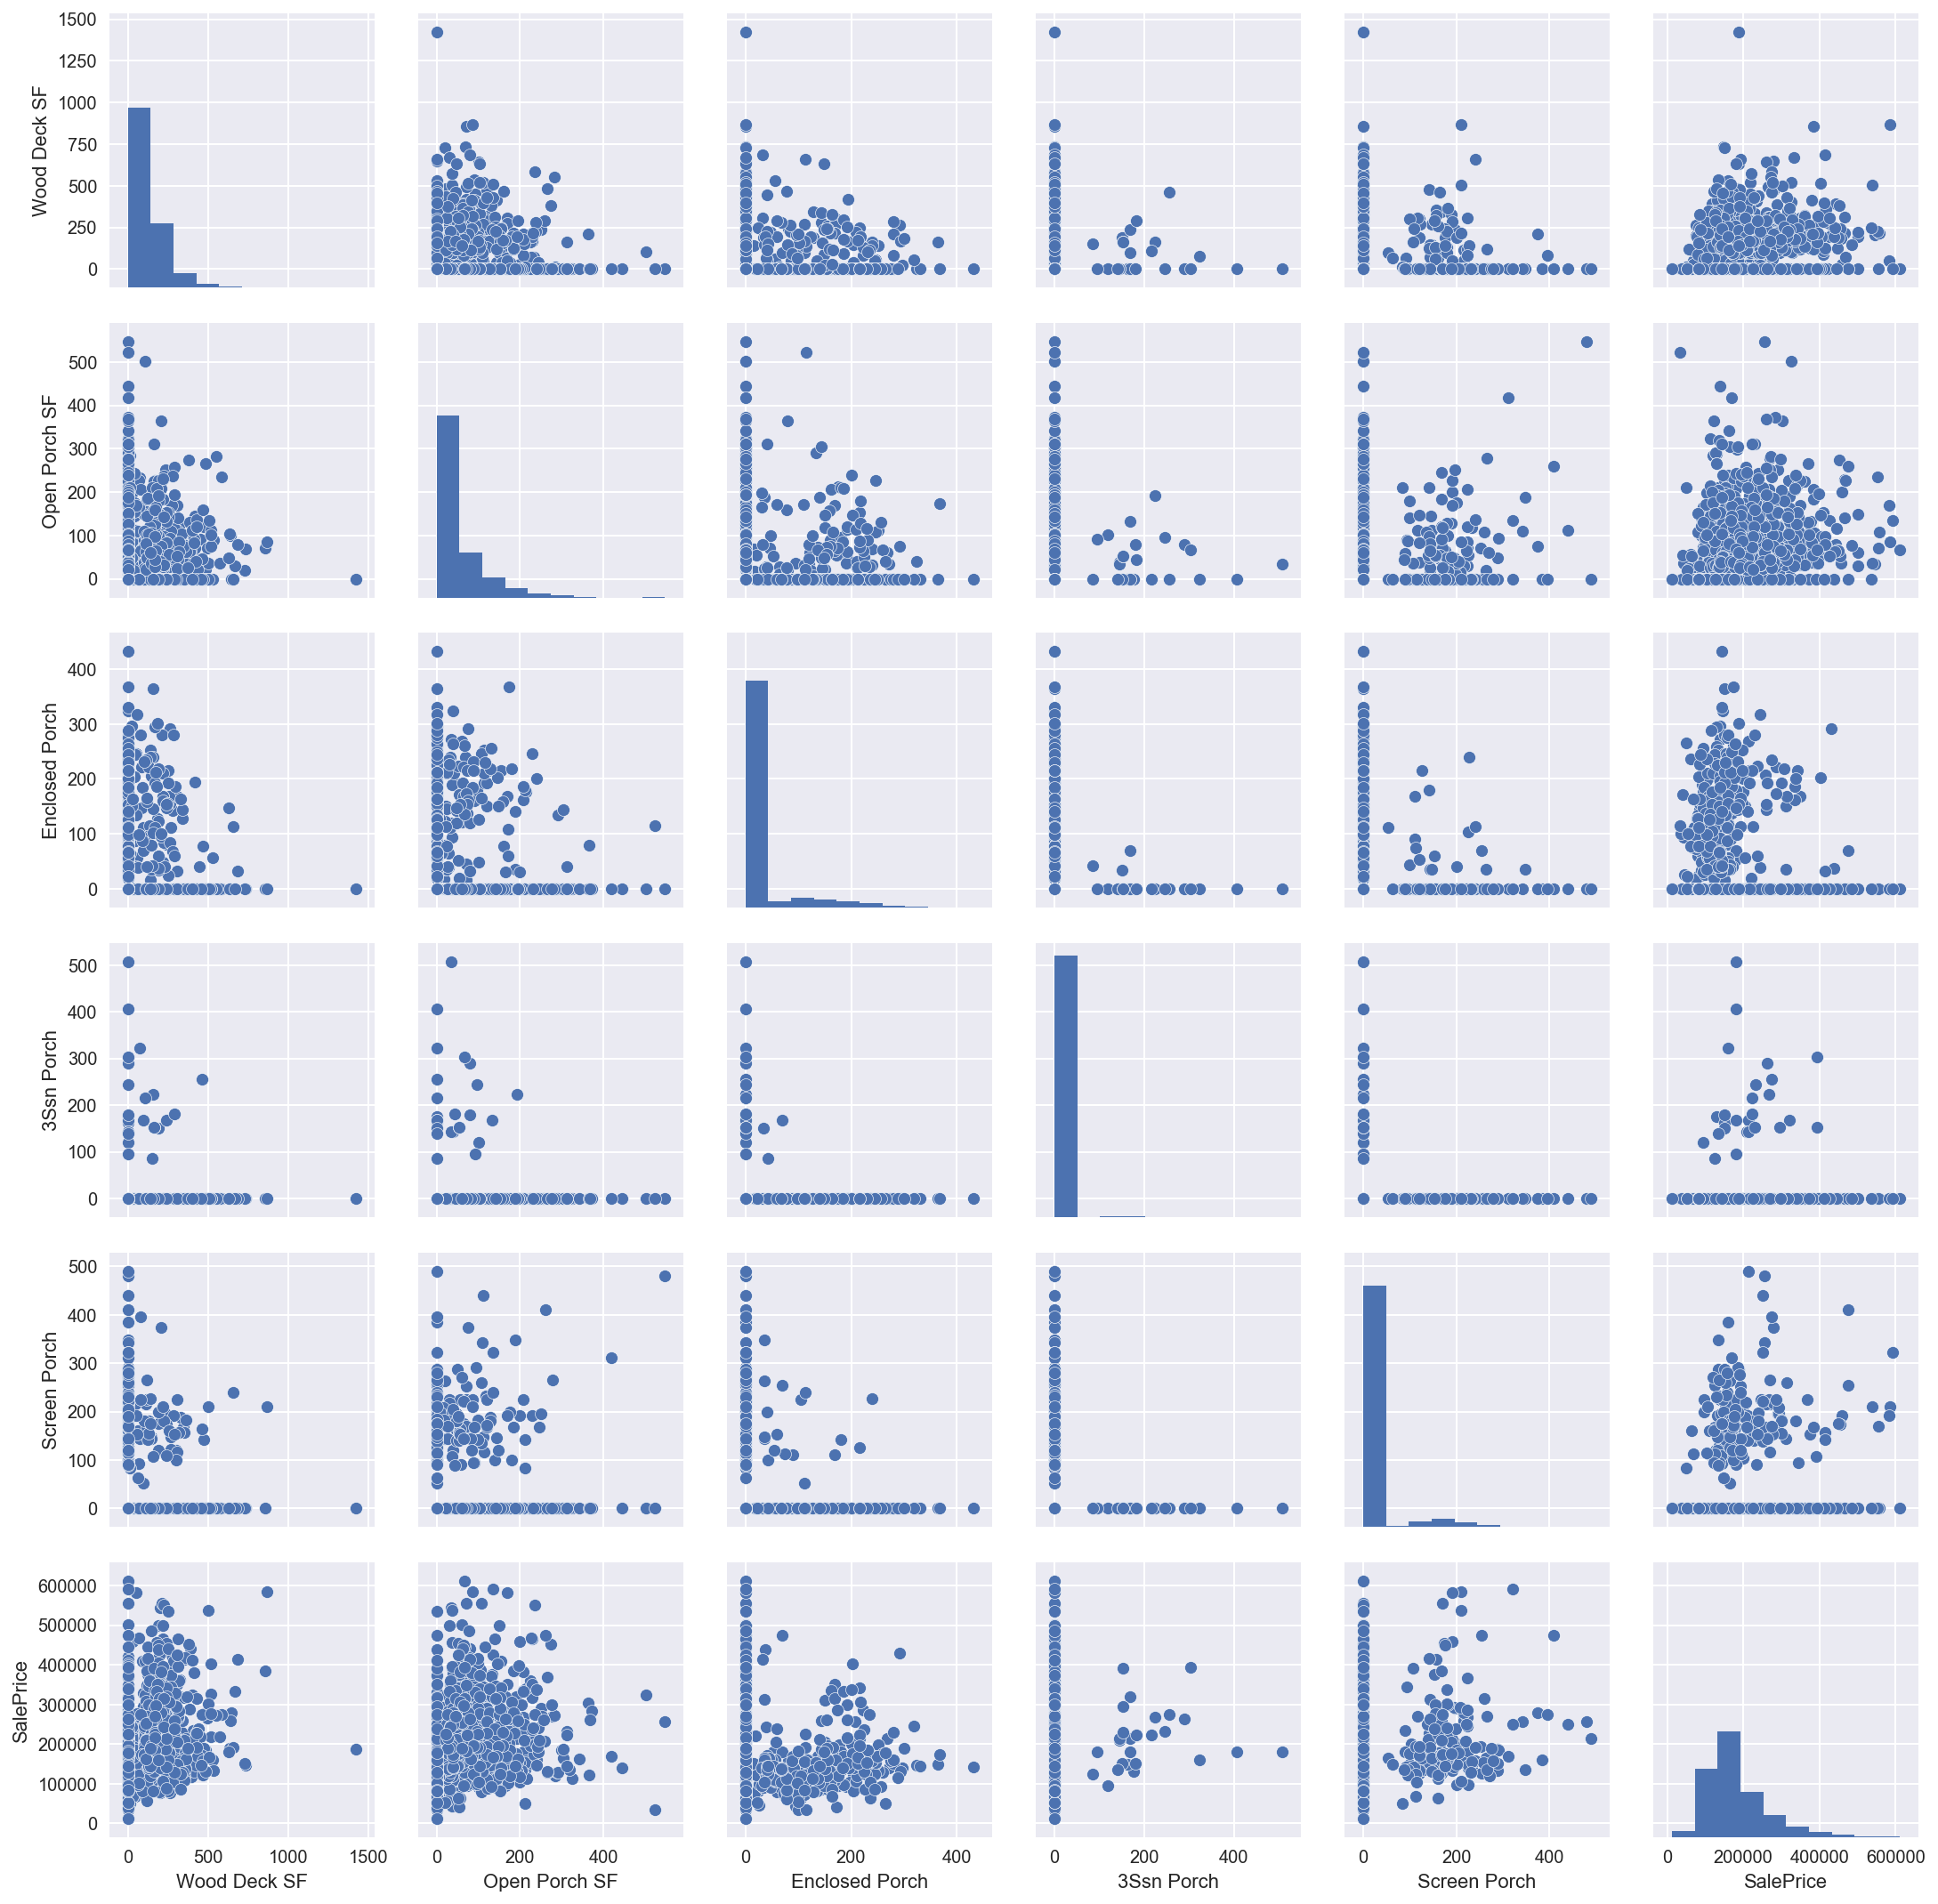

In [55]:
# There's so much noise due to the 0.0 its hard to see any kind of relation. There definitly seems to be more wood deck and 
# open porch data compared to the others which are mostly 0.0s or have a low relation with Sales Price.
sns.pairplot(ames[['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'SalePrice']])
None

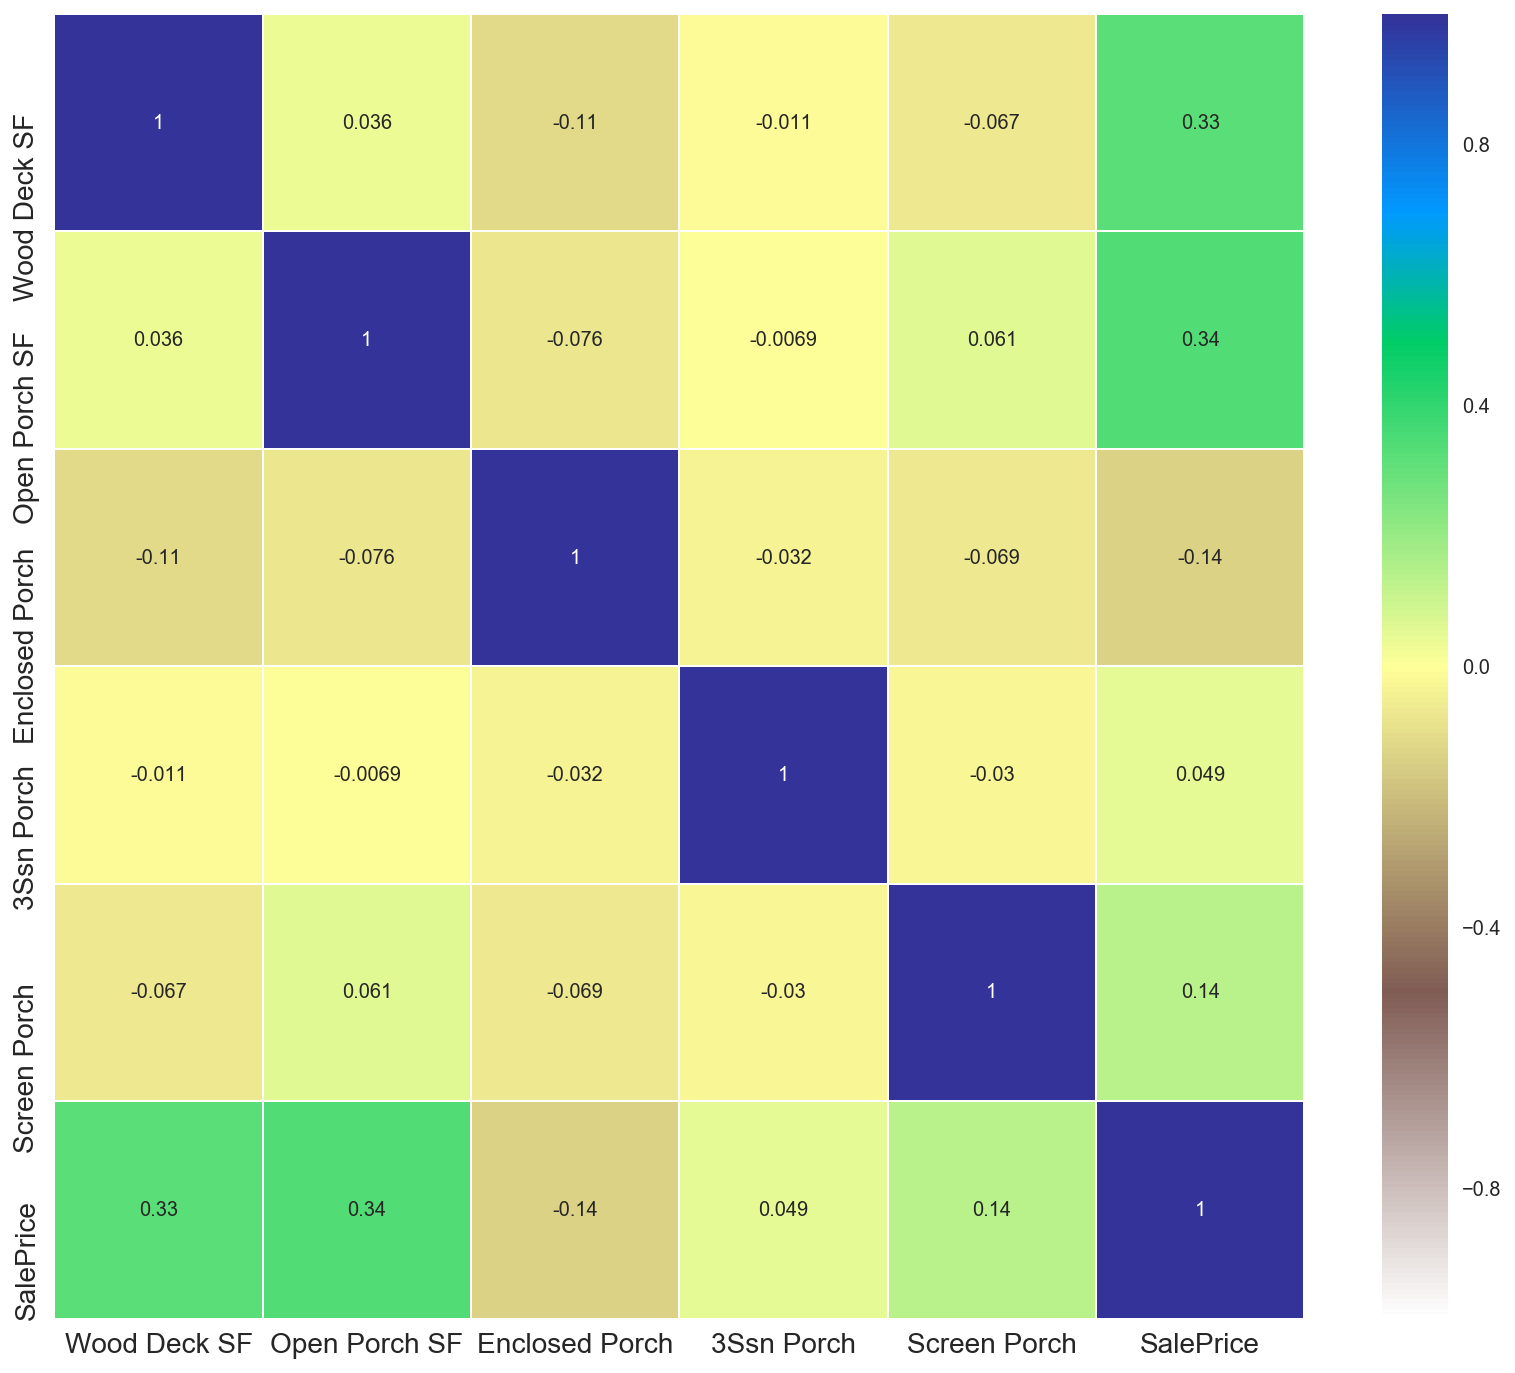

In [56]:
# There's not a lot of correlation between outdoor attached to home area and sales price.
outdoor_area = ames[['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'SalePrice']].corr()

fig, ax = plt.subplots(figsize=(14,12))

#mask = np.zeros_like(area_corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

ax = sns.heatmap(outdoor_area, ax=ax, annot=True, cmap= 'terrain_r', linewidths=.5)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

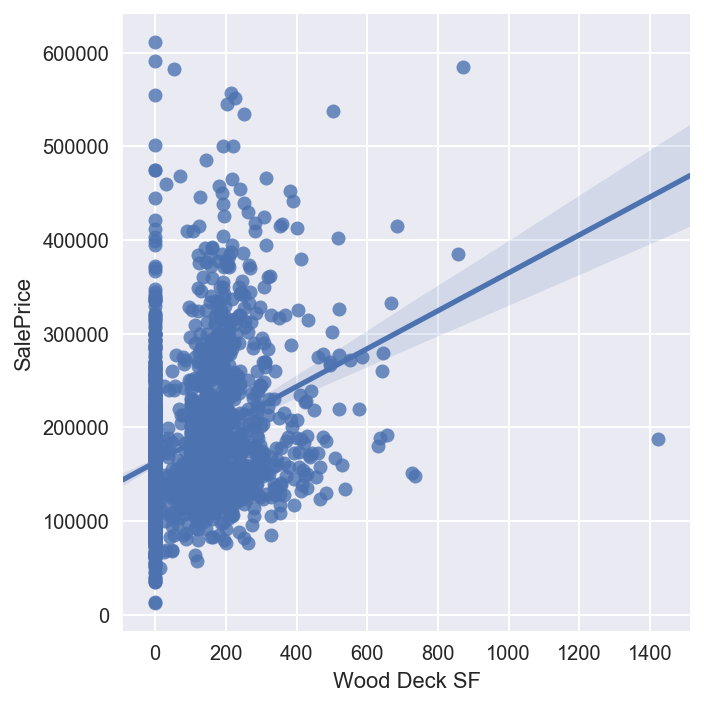

In [57]:
# There seem to be a few decks that have very large sf. This may be reasonable depending on where the homes are located ie
# on a corner or a large plot of land. They may also be outliers.
sns.lmplot(x='Wood Deck SF', y='SalePrice', data=ames)
None

In [58]:
# Can't use as a feature it has to many 0.0 and it looks like it may have outliers as well.
ames['Wood Deck SF'].value_counts()

0       1074
100       53
144       46
192       43
120       40
168       36
140       23
224       17
160       14
143       13
216       12
240       12
200       10
280        8
264        8
156        8
108        8
208        8
48         8
112        7
128        7
188        7
132        7
136        7
210        7
196        7
252        7
64         6
182        6
105        6
        ... 
246        1
253        1
333        1
255        1
329        1
327        1
324        1
319        1
318        1
316        1
314        1
311        1
309        1
308        1
305        1
303        1
297        1
295        1
291        1
287        1
286        1
283        1
277        1
269        1
263        1
261        1
260        1
259        1
257        1
1424       1
Name: Wood Deck SF, Length: 320, dtype: int64

In [59]:
# Its a corner house. It could have a deck that goes all the way around the house. I don't think there is a need to drop it
# It is also a split level house so it could have a wood deck on both floors which would make it larger. Also a deck can go out
# it doesn't have to wrap around and like I said it being a corner it could have more room, according to lot area it does, so it
# could go out back. KEEP.
ames[ames['Wood Deck SF'] == 1424]

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
966  2294           80        RL          68.0     15957   Pave       IR1   

    Land Contour Utilities Lot Config    ...     Enclosed Porch 3Ssn Porch  \
966          Low    AllPub     Corner    ...                  0          0   

    Screen Porch Pool Area Misc Val Mo Sold  Yr Sold  Sale Type  \
966            0         0        0       9     2007        WD    

     Sale Condition  SalePrice  
966          Normal     188000  

[1 rows x 76 columns]

In [60]:
# 113 with 0.0 for Garage area
ames['Garage Area'].value_counts()

0.0       113
440.0      70
576.0      69
484.0      52
528.0      46
240.0      45
400.0      43
288.0      43
480.0      39
264.0      33
308.0      32
280.0      24
336.0      18
504.0      18
420.0      18
672.0      17
462.0      17
312.0      16
216.0      16
572.0      15
624.0      14
180.0      14
384.0      13
506.0      13
550.0      13
478.0      13
660.0      12
352.0      12
564.0      12
525.0      12
         ... 
830.0       1
267.0       1
524.0       1
686.0       1
358.0       1
808.0       1
916.0       1
497.0       1
226.0       1
466.0       1
584.0       1
292.0       1
900.0       1
698.0       1
242.0       1
428.0       1
513.0       1
845.0       1
857.0       1
899.0       1
639.0       1
687.0       1
689.0       1
667.0       1
923.0       1
925.0       1
1356.0      1
1138.0      1
865.0       1
475.0       1
Name: Garage Area, Length: 511, dtype: int64

In [61]:
# Has the same 113 0.0 values as Garage Area. 
ames['Garage Cars'].value_counts()

2.0    1133
1.0     524
3.0     262
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [62]:
# Both Garage Cars and Garage Area has a NaN value. So instead of dropping it I'll just put in a 0.0 to fill the void. I'd rather
# have more data then less at this point and don't feel the need to drop it
ames['Garage Cars'].fillna(0, inplace=True)
ames['Garage Area'].fillna(0, inplace=True)

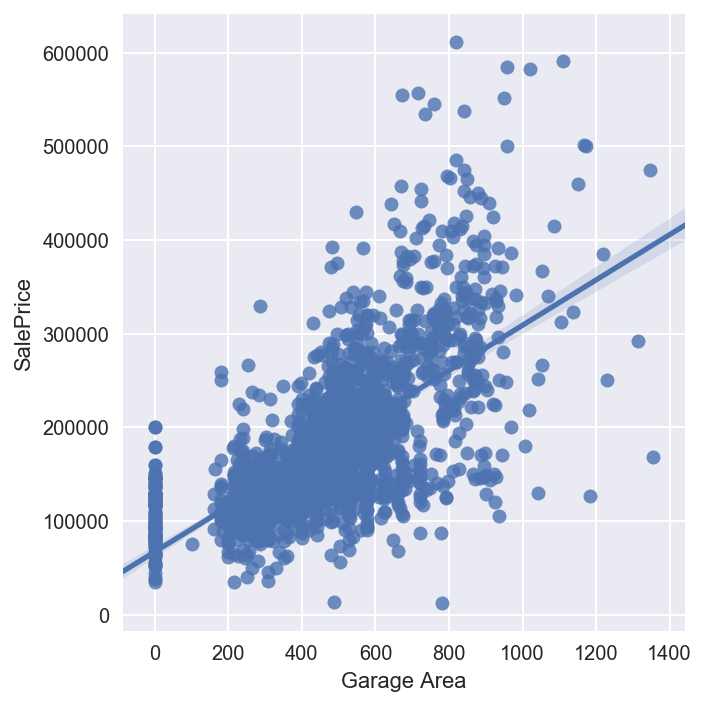

In [63]:
# There is a descent clustering for garage area and then as the house price increase the garage area does which would make sense
# since in theory a more expensive house usually means more area and thus more garage area.
sns.lmplot(x='Garage Area', y='SalePrice', data=ames)
None

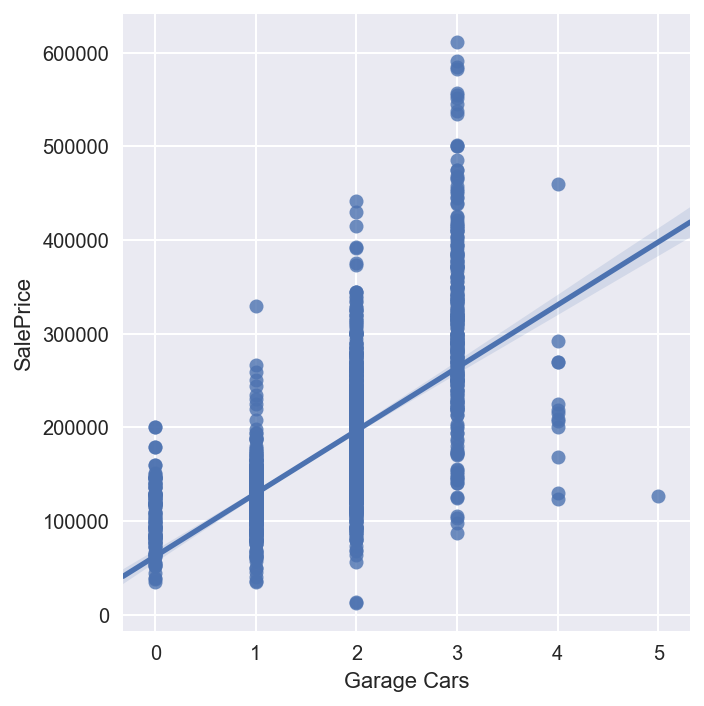

In [64]:
sns.lmplot(x='Garage Cars', y='SalePrice', data=ames)
None

In [65]:
ames['Fireplaces'].value_counts()

0    1000
1     898
2     143
3       5
4       1
Name: Fireplaces, dtype: int64

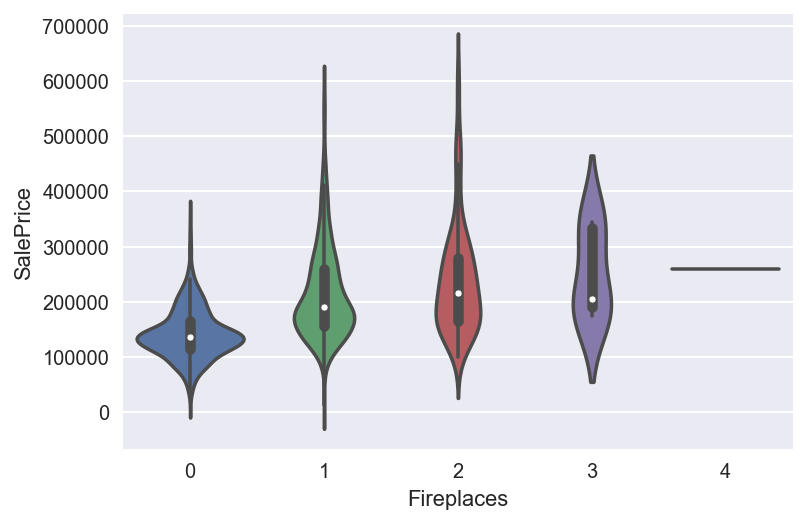

In [66]:
# This might actually be a good feature to use. It had a decent correlation with the heatmap and the sale price isn't bad with 
# no fireplace. Though I might want to look into the one that has 4 fireplaces just to see if there is any skewed looking data
sns.violinplot(x="Fireplaces", y="SalePrice", data=ames)
None

In [67]:
# It seems to be a large house. It's on a corner, has a pool, is multi leveled. I think it's fine. It has 9 rooms, a large
# garage. It's a big house. KEEP
ames[ames['Fireplaces'] == 4]

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
761  2499           80        RL         100.0     14330   Pave       IR1   

    Land Contour Utilities Lot Config    ...     Enclosed Porch 3Ssn Porch  \
761          Low    AllPub     Corner    ...                  0          0   

    Screen Porch Pool Area Misc Val Mo Sold  Yr Sold  Sale Type  \
761            0       800        0       1     2006        WD    

     Sale Condition  SalePrice  
761          Normal     260000  

[1 rows x 76 columns]

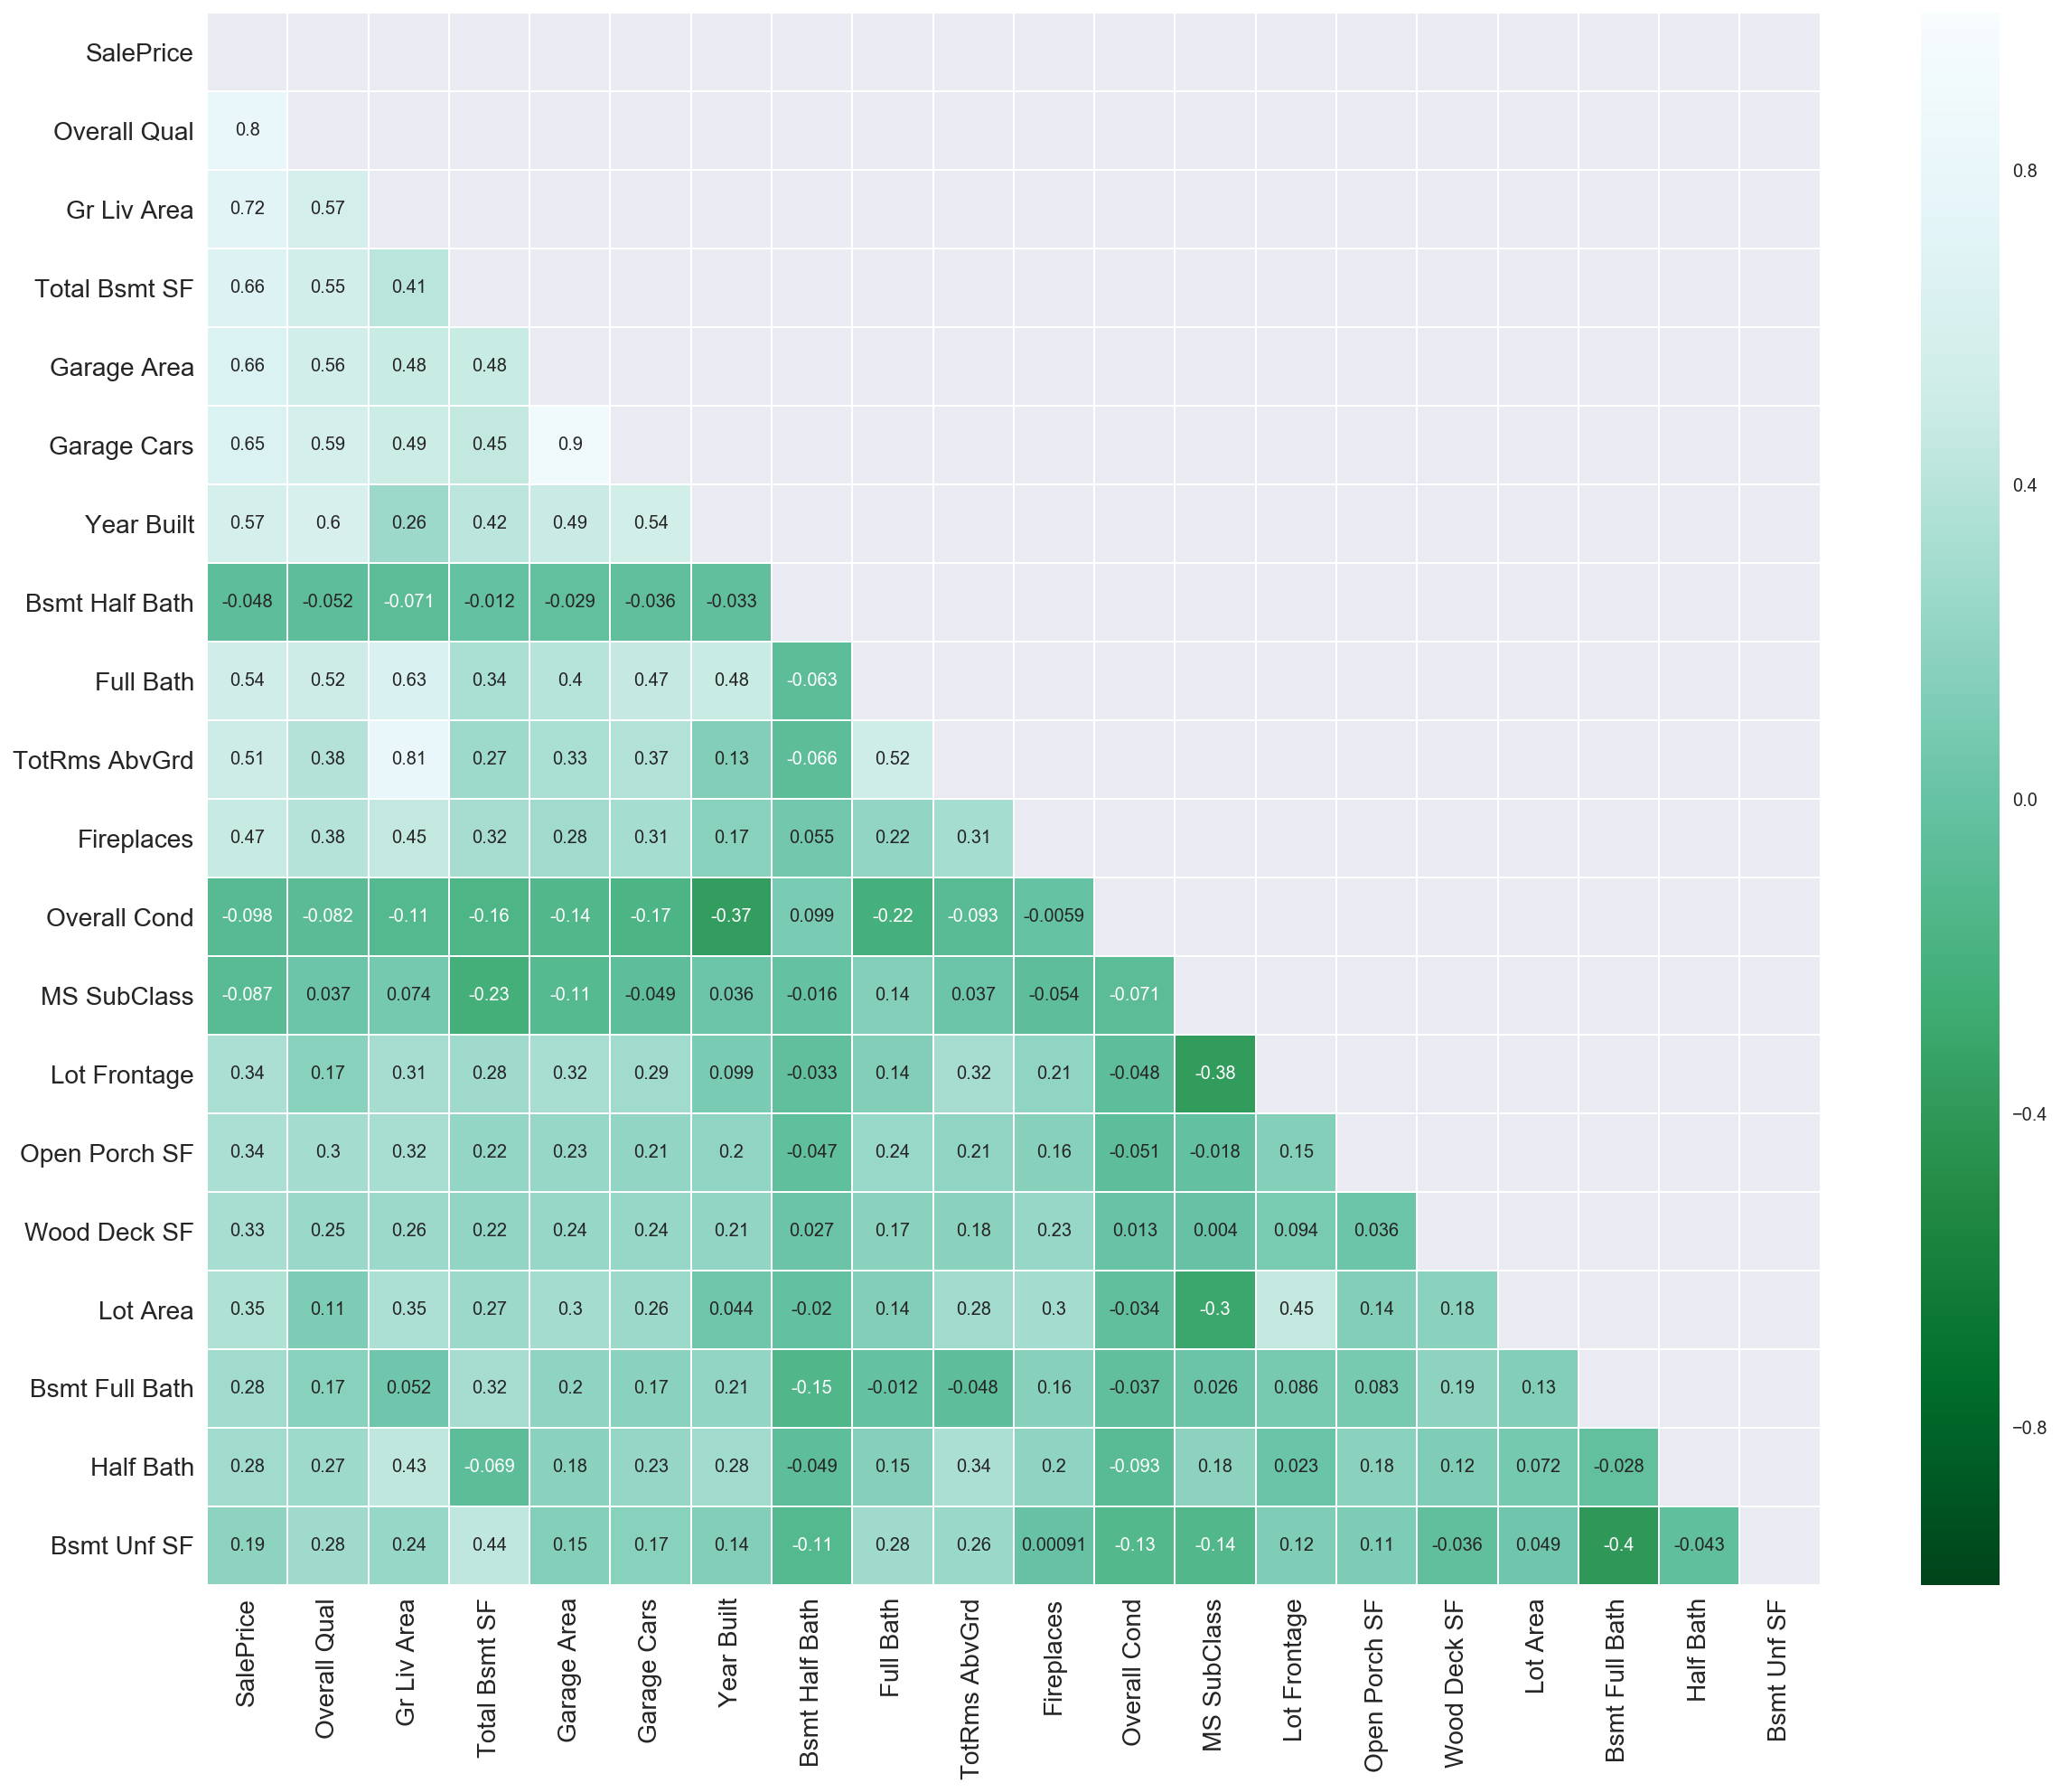

In [68]:
#Almost finished with the scaling down feature selections
area2_corr = ames[['SalePrice','Overall Qual','Gr Liv Area','Total Bsmt SF','Garage Area','Garage Cars','Year Built',
                  'Bsmt Half Bath','Full Bath','TotRms AbvGrd','Fireplaces','Overall Cond','MS SubClass',
                  'Lot Frontage','Open Porch SF','Wood Deck SF','Lot Area','Bsmt Full Bath','Half Bath',
                  'Bsmt Unf SF']].corr()

fig, ax = plt.subplots(figsize=(20,16))

mask = np.zeros_like(area2_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

ax = sns.heatmap(area2_corr, ax=ax, mask=mask, annot=True, cmap="BuGn_r", linewidths=.5)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

In [69]:
area2_corr.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
Overall Qual      0.929071
Garage Cars       0.859354
Garage Area       0.856560
Total Bsmt SF     0.816353
Gr Liv Area       0.806855
Year Built        0.757426
Full Bath         0.738546
TotRms AbvGrd     0.635579
Fireplaces        0.608205
Lot Frontage      0.462134
Open Porch SF     0.430502
Lot Area          0.427420
Wood Deck SF      0.354317
Bsmt Unf SF       0.343224
Bsmt Full Bath    0.293296
Half Bath         0.288965
MS SubClass      -0.323286
Bsmt Half Bath   -0.419606
Overall Cond     -0.538413
Name: SalePrice, dtype: float64

In [70]:
# Combined the bathrooms into one column. Changed half baths to 0.5 since they are techinically half a room. 
# Created a new column called Baths.
ames['Baths'] = ames['Bsmt Full Bath'] + 0.5 * ames['Bsmt Half Bath'] + ames['Full Bath'] + 0.5 * ames['Half Bath']

In [71]:
ames.head()

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0  109           60        RL          68.0     13517   Pave       IR1   
1  544           60        RL          43.0     11492   Pave       IR1   
2  153           20        RL          68.0      7922   Pave       Reg   
3  318           60        RL          73.0      9802   Pave       Reg   
4  255           50        RL          82.0     14235   Pave       IR1   

  Land Contour Utilities Lot Config  ...   3Ssn Porch Screen Porch Pool Area  \
0          Lvl    AllPub    CulDSac  ...            0            0         0   
1          Lvl    AllPub    CulDSac  ...            0            0         0   
2          Lvl    AllPub     Inside  ...            0            0         0   
3          Lvl    AllPub     Inside  ...            0            0         0   
4          Lvl    AllPub     Inside  ...            0            0         0   

  Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  Baths  
0        0       3    2010        WD           Normal     130500    2.5  
1        0       4    2009        WD           Normal     220000    3.5  
2        0       1    2010        WD          Abnorml     109000    2.0  
3        0       4    2010        WD           Normal     174000    2.5  
4        0       3    2010        WD           Normal     138500    2.0  

[5 rows x 77 columns]

In [72]:
# dropped old bathroom columns since now there is a column with the combination
ames.drop(['Bsmt Full Bath', 'Bsmt Half Bath','Full Bath','Half Bath'], axis=1, inplace = True)

In [73]:
ames['Baths'].fillna(0, inplace=True)

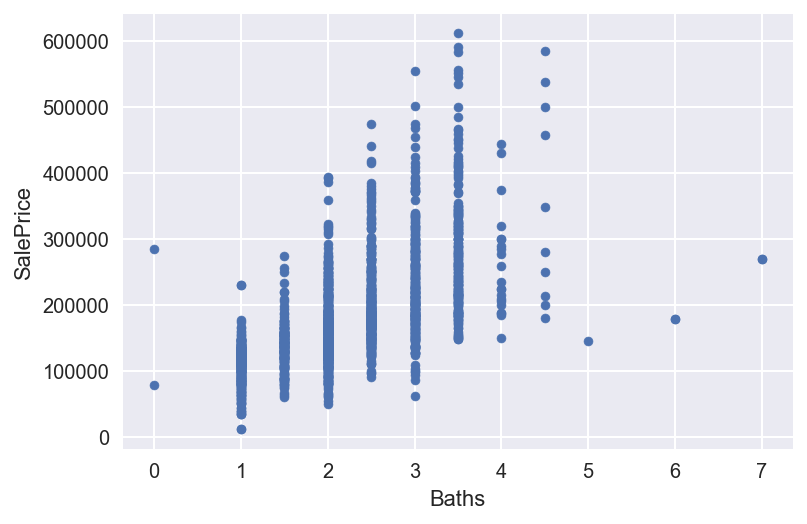

In [74]:
# Seem to be a few homes with no bathrooms. That doesn't seem right. Also a few that have a large number of bathrooms. This
# could be more realistic based on the size and type of house. This is most likely a mistake but I don't know if its worth 
# dropping the rows for two houses with 0.0 for baths. Maybe they have outhouses?
ames.plot(x= 'Baths', y = 'SalePrice', kind='scatter')
None

In [75]:
ames.head()

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0  109           60        RL          68.0     13517   Pave       IR1   
1  544           60        RL          43.0     11492   Pave       IR1   
2  153           20        RL          68.0      7922   Pave       Reg   
3  318           60        RL          73.0      9802   Pave       Reg   
4  255           50        RL          82.0     14235   Pave       IR1   

  Land Contour Utilities Lot Config  ...   3Ssn Porch Screen Porch Pool Area  \
0          Lvl    AllPub    CulDSac  ...            0            0         0   
1          Lvl    AllPub    CulDSac  ...            0            0         0   
2          Lvl    AllPub     Inside  ...            0            0         0   
3          Lvl    AllPub     Inside  ...            0            0         0   
4          Lvl    AllPub     Inside  ...            0            0         0   

  Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  Baths  
0        0       3    2010        WD           Normal     130500    2.5  
1        0       4    2009        WD           Normal     220000    3.5  
2        0       1    2010        WD          Abnorml     109000    2.0  
3        0       4    2010        WD           Normal     174000    2.5  
4        0       3    2010        WD           Normal     138500    2.0  

[5 rows x 73 columns]

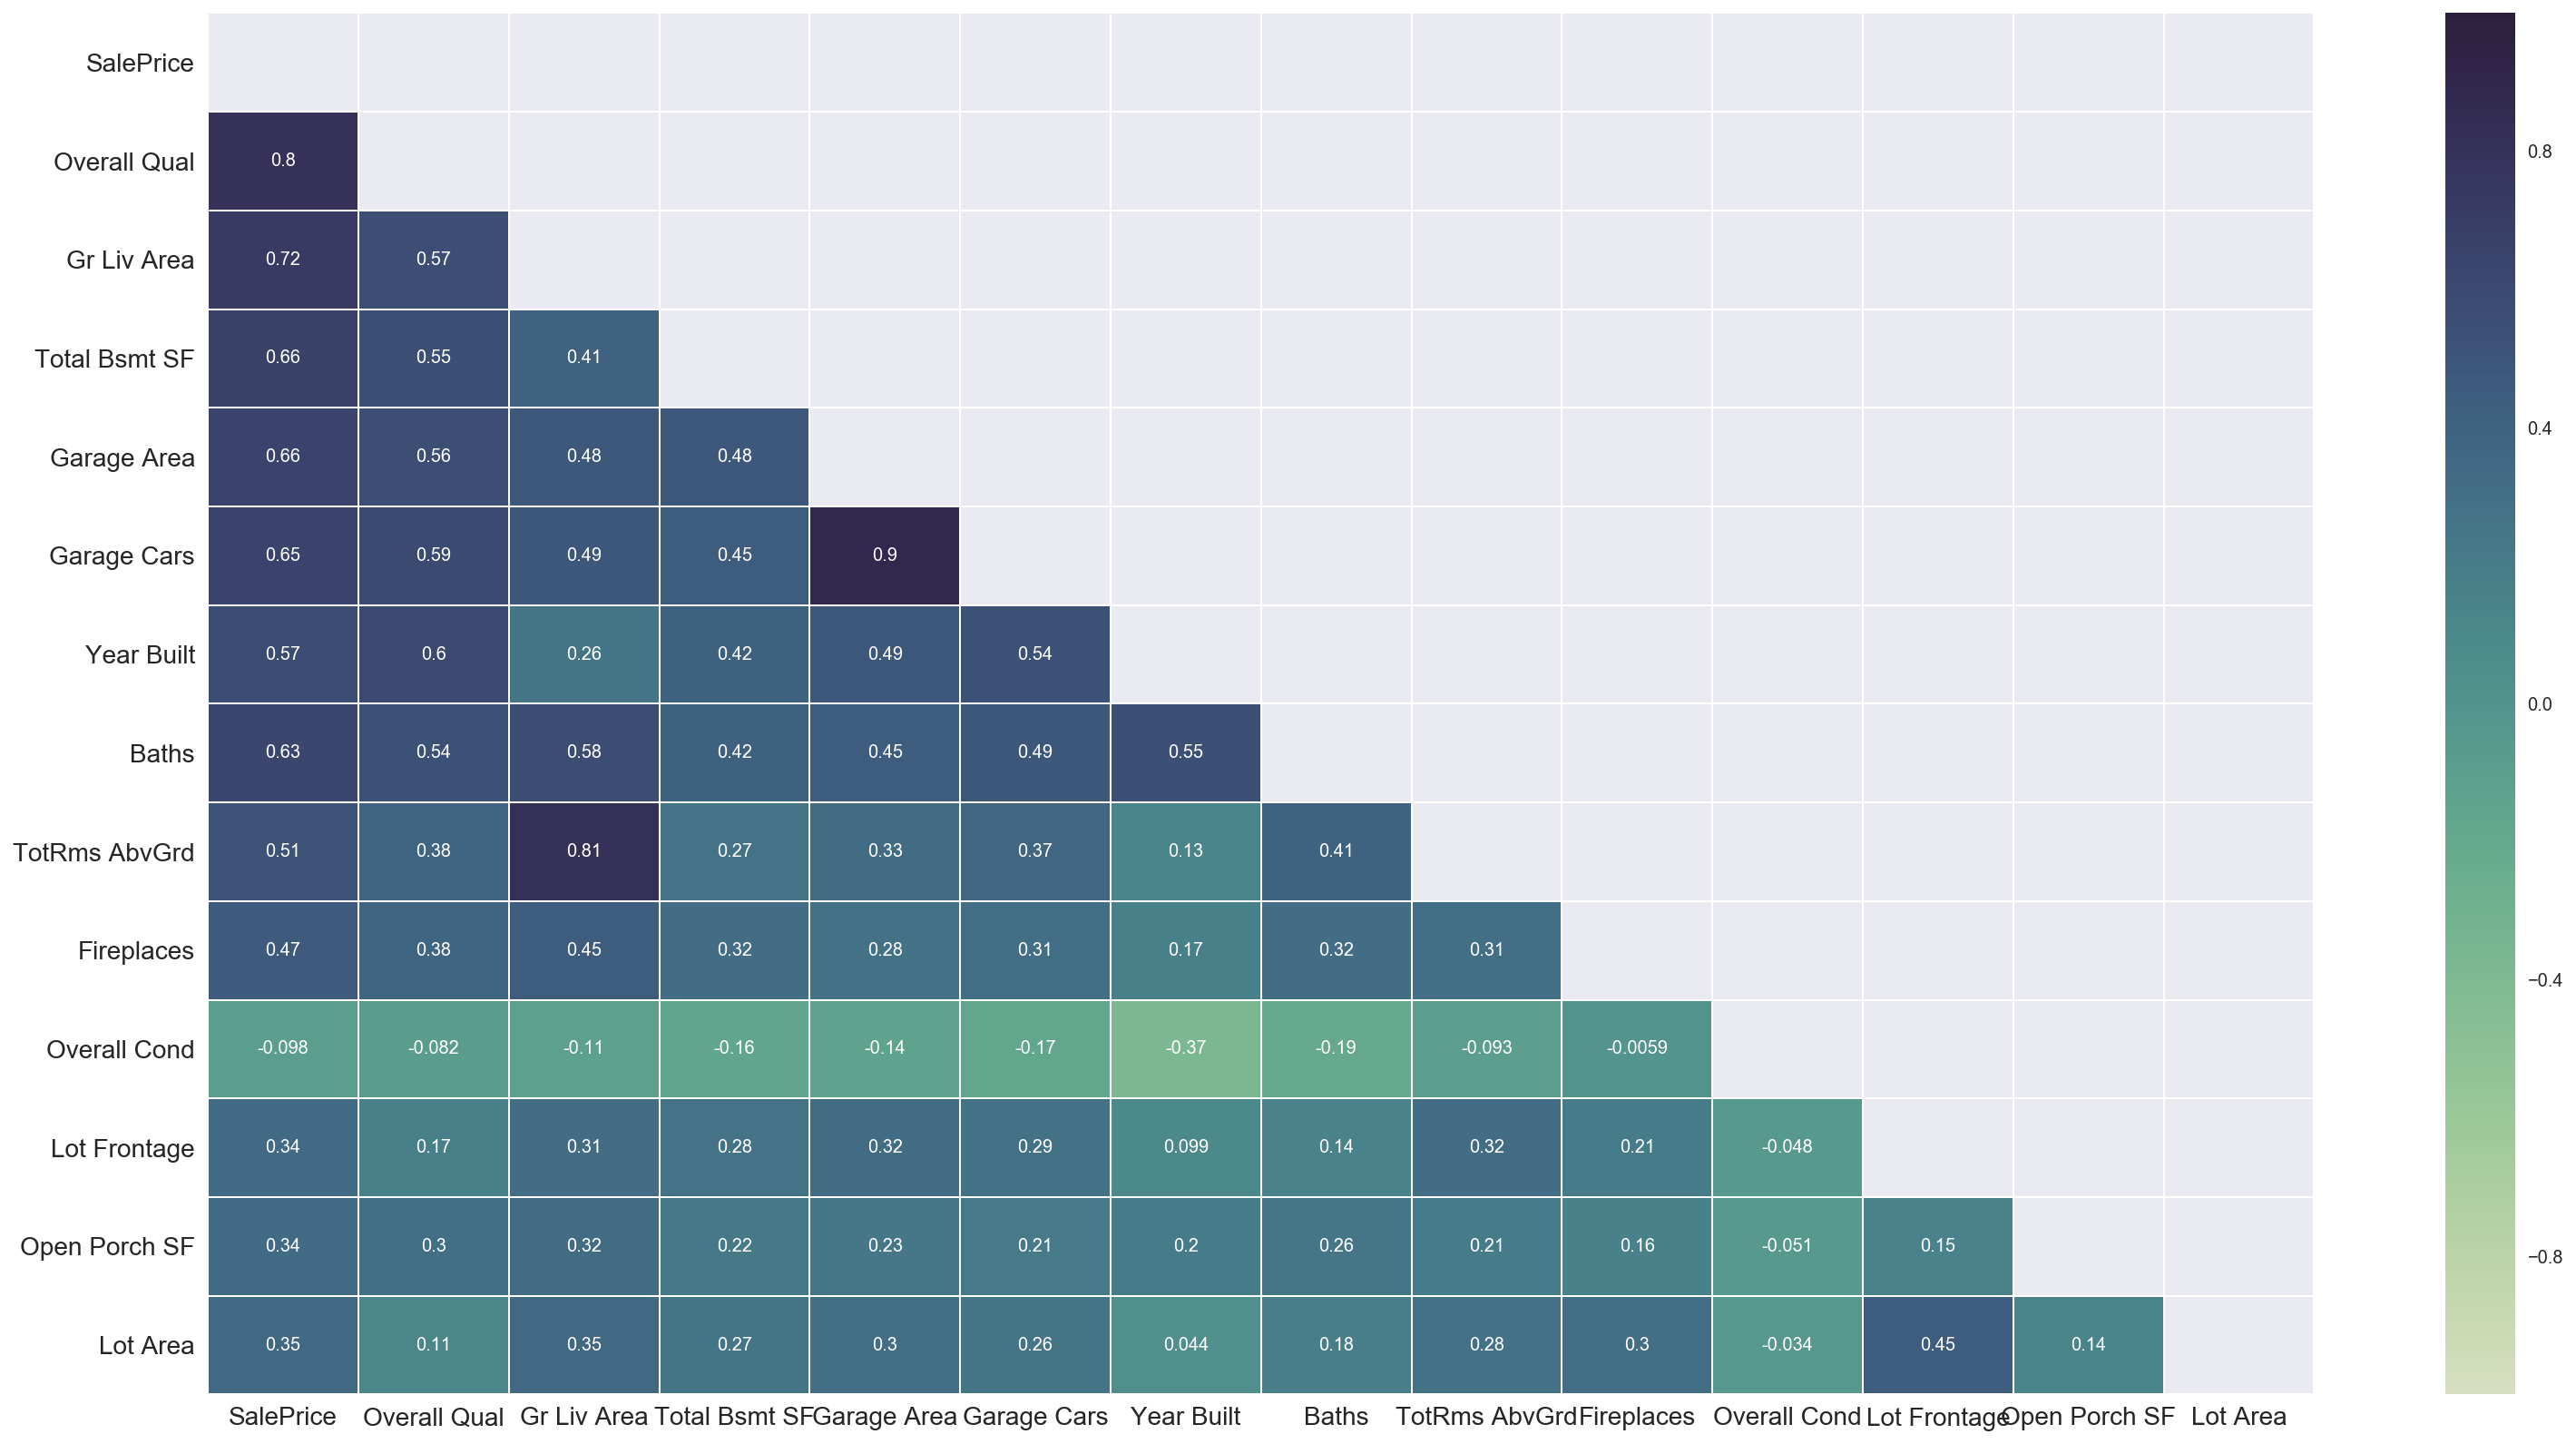

In [76]:
#Last scaling down feature selections
area3_corr = ames[['SalePrice','Overall Qual','Gr Liv Area','Total Bsmt SF','Garage Area','Garage Cars','Year Built',
                  'Baths','TotRms AbvGrd','Fireplaces','Overall Cond','Lot Frontage',
                  'Open Porch SF','Lot Area']].corr()

fig, ax = plt.subplots(figsize=(26,14))

mask = np.zeros_like(area3_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)

ax = sns.heatmap(area3_corr, ax=ax, mask=mask, annot=True, cmap=cmap, linewidths=.5)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

In [77]:
area3_corr.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
Overall Qual     0.920043
Total Bsmt SF    0.806144
Baths            0.803744
Garage Cars      0.783000
Garage Area      0.762246
Year Built       0.759069
Gr Liv Area      0.746280
TotRms AbvGrd    0.508725
Fireplaces       0.413894
Open Porch SF    0.184606
Lot Frontage     0.065494
Lot Area         0.049520
Overall Cond    -0.729867
Name: SalePrice, dtype: float64

# Part 2 a: Regression- Preprocessing, Scaling, and Creating train/test sets

In [78]:
#Setting y as target which is SalePrice and X are the feature columns that have been hand picked due to there correlation
#values and extensive EDA
y = ames['SalePrice']
X = ames[['Overall Qual','Total Bsmt SF','Baths','Garage Cars','Garage Area','Year Built','Gr Liv Area','TotRms AbvGrd','Fireplaces',
       'Open Porch SF','Lot Frontage','Lot Area','Overall Cond']]

In [79]:
X.isnull().sum()[X.isnull().sum()>0]

Series([], dtype: int64)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1371, 13) (676, 13) (1371,) (676,)


In [81]:
ss = StandardScaler()  
ss.fit(X_train)   
Xs_train = ss.transform(X_train)  
Xs_test = ss.transform(X_test)

# Part 2 b: Modeling on train split training data


In [82]:
# LinearRegression scores with CV. The R2 values are pretty good but I could probably improve on them.
lr = LinearRegression()
lr.fit(Xs_train, y_train)
print(lr.score(Xs_train, y_train))
print('Cross Val Score', cross_val_score(lr, Xs_train, y_train, cv=10))

0.843807955523
Cross Val Score [ 0.80319093  0.81447316  0.89163609  0.80067547  0.85354706  0.83311502
  0.80686713  0.83483055  0.869618    0.86550253]


In [83]:
# Not bad values. Consistent with what was seen above.
scores = cross_val_score(lr, Xs_train, y_train, cv=10)
print('Scores mean', scores.mean(),'Scores std dev', scores.std())

Scores mean 0.837345594223 Scores std dev 0.030052975635


In [84]:
# These are the steps for fitting the RidegCV/model
alphas = np.logspace(0, 5, 10)
RCV= RidgeCV(alphas = alphas, cv=10)
print(RCV.fit(Xs_train, y_train))
print('Optimal alpha', RCV.alpha_)
print('Cross Val Score', cross_val_score(RCV, Xs_train, y_train, cv=10))
scoresRCV = cross_val_score(RCV, Xs_train, y_train, cv=10)
print('Scores mean',scoresRCV.mean(),'Scores std dev', scoresRCV.std())

RidgeCV(alphas=array([  1.00000e+00,   3.59381e+00,   1.29155e+01,   4.64159e+01,
         1.66810e+02,   5.99484e+02,   2.15443e+03,   7.74264e+03,
         2.78256e+04,   1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)
Optimal alpha 46.4158883361
Cross Val Score [ 0.80412356  0.81480028  0.89157163  0.80062576  0.85404648  0.83367149
  0.80636914  0.83733247  0.86631029  0.86561233]
Scores mean 0.837446341747 Scores std dev 0.0296489863408


In [85]:
# These are the steps for LassoCV
LCV = LassoCV(n_alphas =100, cv=10)
print(LCV.fit(Xs_train, y_train))
print('Optimal alpha',LCV.alpha_)
print('Cross Val Score', cross_val_score(LCV,Xs_train, y_train, cv=10))
scoresLCV = cross_val_score(LCV, Xs_train, y_train, cv=10)
print('Scores mean',scoresLCV.mean(),'Scores std dev', scoresLCV.std())

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
Optimal alpha 63.2907960453
Cross Val Score [ 0.80376489  0.81413511  0.89161385  0.79984146  0.85374272  0.83328509
  0.80655411  0.83576878  0.86790584  0.8658665 ]
Scores mean 0.837247834921 Scores std dev 0.0300020419142


In [86]:
# ElasticNetCV set up
l1_ratios = np.linspace(0.01, 1.0, 25)
ENCV = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,verbose=1)
ENCV.fit(Xs_train, y_train)

print('Optimal alpha', ENCV.alpha_)
print('l1 ratio', ENCV.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Optimal alpha 63.2907960453
l1 ratio 1.0


...............................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    4.0s finished


In [87]:
enet = ElasticNet(alpha=ENCV.alpha_, l1_ratio=ENCV.l1_ratio_)

enet_scores = cross_val_score(enet, Xs_train, y_train, cv=10)

print('Enet scores',enet_scores)
print('Enet scores mean',np.mean(enet_scores))

Enet scores [ 0.80374997  0.81413925  0.89161399  0.80016614  0.85374549  0.83328207
  0.80654601  0.8357602   0.86896271  0.86586271]
Enet scores mean 0.837382854072


In [88]:
# Comparing the residuals
RCV.fit(Xs_train, y_train)
LCV.fit(Xs_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [89]:
RCV_resid = y_train - RCV.predict(Xs_train)
LCV_resid = y_train - LCV.predict(Xs_train)

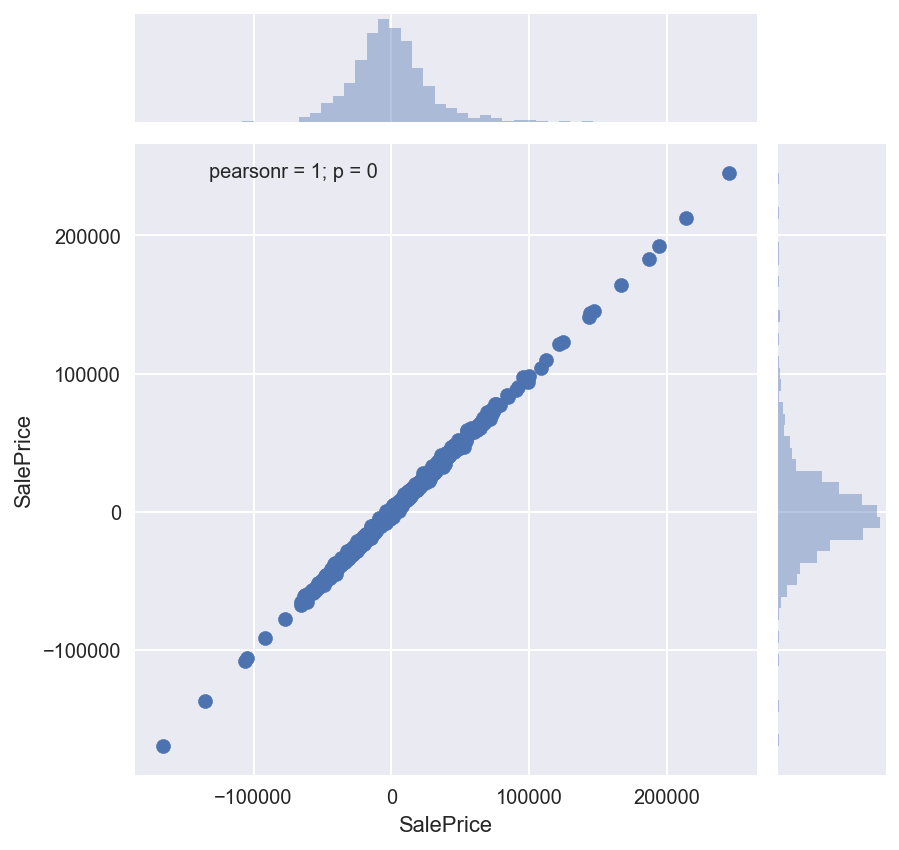

In [90]:
# most likely these two models are so closely correlated that they are overfitting when graphed together and thus the perfect
# coefficient. In one way thats good becasue it shows the resuklts are very similar but its bad becasue its doesn't actually 
# mean anything to help with the analysis.
sns.jointplot(RCV_resid, LCV_resid)
None

# Part 2 c: Modeling on train split testing data

In [91]:
lr = LinearRegression()
lr.fit(Xs_train, y_train)
print(lr.score(Xs_test, y_test))
print('Cross Val Score', cross_val_score(lr, Xs_test, y_test, cv=10))
print('Coefficients', lr.coef_)

0.845364803066
Cross Val Score [ 0.87015714  0.8572741   0.82187584  0.83908191  0.84872646  0.83317136
  0.78621396  0.80536738  0.85138625  0.84071985]
Coefficients [ 25840.15556457  16103.706879     5386.91533864  -4049.97004751
  10769.55599504  11663.44130156  22058.8246788   -2084.52096343
   4860.85198873   2001.11212279   3969.80550407   5415.81353993
   5912.12947175]


In [92]:
scores = cross_val_score(lr, Xs_test, y_test, cv=10)
print('Scores mean', scores.mean(),'Scores std dev', scores.std())

Scores mean 0.835397424244 Scores std dev 0.0238131098361


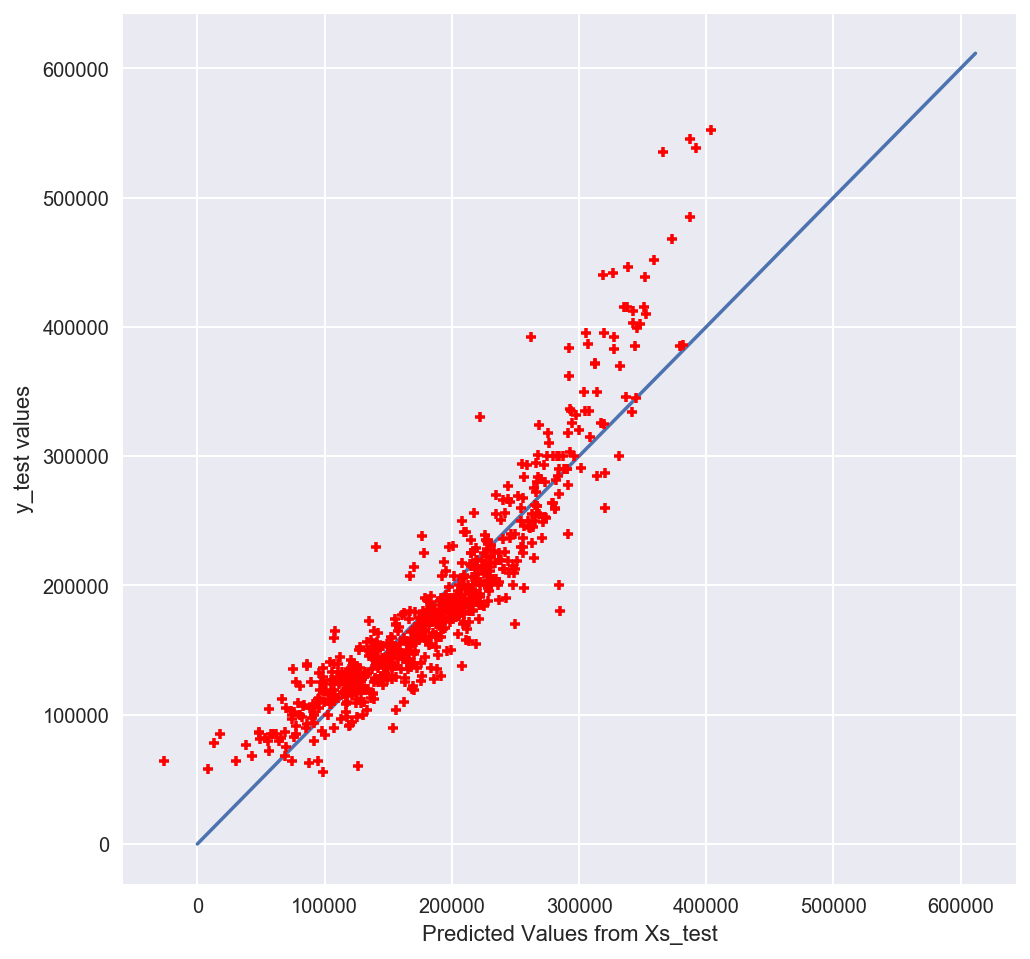

score:  0.845364803066


In [93]:
lrtest = lr.fit(Xs_train, y_train)

predictions  =  lrtest.predict(Xs_test)
score        =  lrtest.score(Xs_test, y_test)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Xs_test")
plt.ylabel("y_test values")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

print("score: ", score)

This graph shows promise. Its not overfitting or underfitting. It has a near linear regression and an R2 score that is decent. There is some clustering which is good becasue it shoes there is corrleation of the data and the spreading is not too far off the plotting line.I would have liked a closer fit but for the values this isn't a bad fit.

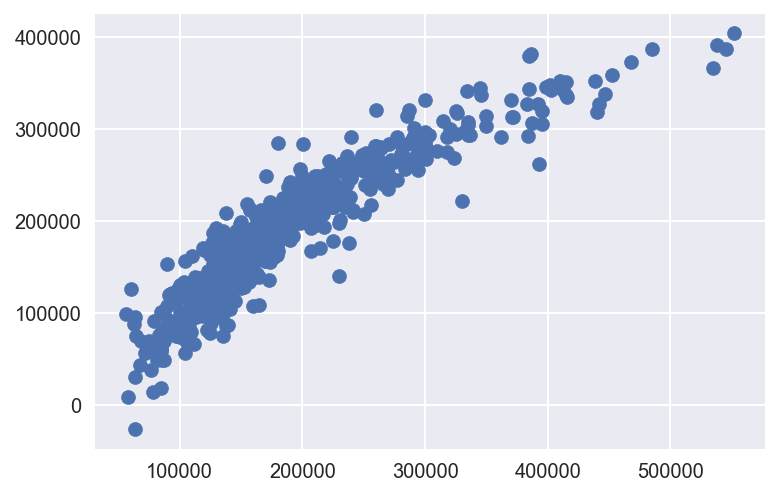

In [94]:
pred =  lr.predict(Xs_test)
plt.scatter(y_test, pred)
plt.show()

This has a nice linear shape to it. Its not to spread out and the clustering seems to be appropriate in that its clustered around a linear loine and not spread out as the tails are.

In [95]:
# These are the steps for fitting the RidegCV/model
alphas = np.logspace(0, 5, 10)
RCV= RidgeCV(alphas = alphas, cv=10)
print(RCV.fit(Xs_train, y_train))
print(RCV.score(Xs_test, y_test))
print('Optimal alpha', RCV.alpha_)
print('Cross Val Score', cross_val_score(RCV, Xs_test, y_test, cv=10))
scoresRCV = cross_val_score(RCV, Xs_test, y_test, cv=10)
print('Scores mean',scoresRCV.mean(),'Scores std dev', scoresRCV.std())

RidgeCV(alphas=array([  1.00000e+00,   3.59381e+00,   1.29155e+01,   4.64159e+01,
         1.66810e+02,   5.99484e+02,   2.15443e+03,   7.74264e+03,
         2.78256e+04,   1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)
0.843971715842
Optimal alpha 46.4158883361
Cross Val Score [ 0.86901885  0.8555629   0.82344453  0.84021268  0.84851788  0.83192521
  0.78764232  0.81005454  0.85171221  0.83984441]
Scores mean 0.835793553849 Scores std dev 0.022570995087


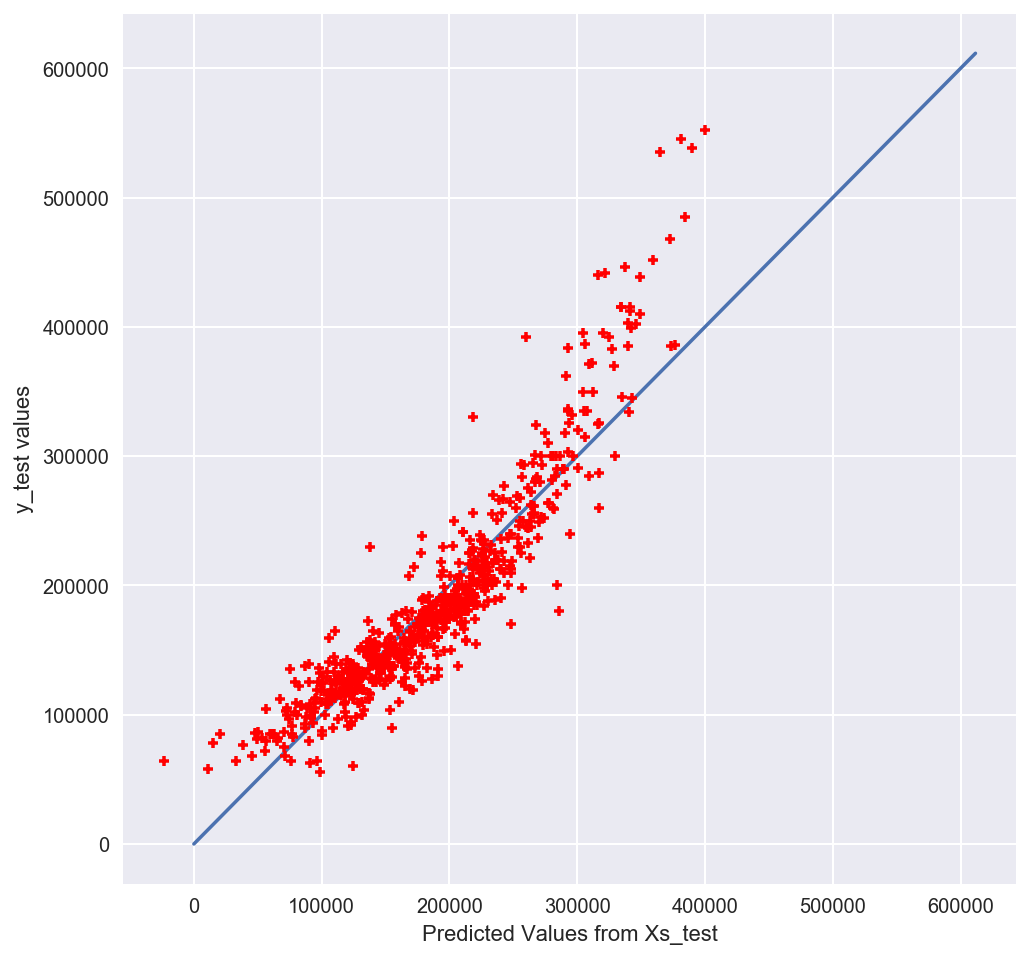

score:  0.843971715842


In [96]:
RCVtest = RCV.fit(Xs_train, y_train)

predictions  =  RCVtest.predict(Xs_test)
score        =  RCVtest.score(Xs_test, y_test)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Xs_test")
plt.ylabel("y_test values")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

print("score: ", score)

Very similar to the linear regression graph. There is good correlation between the values without the risk of under or overfitting. There is some spreding but its not to far from the plotted line. The R2 is even slightly better for this graph.


In [97]:
# These are the steps for LassoCV
LCV = LassoCV(n_alphas =100, cv=10)
print(LCV.fit(Xs_train, y_train))
print(LCV.score(Xs_test, y_test))
print('Optimal alpha',LCV.alpha_)
print('Cross Val Score', cross_val_score(LCV,Xs_test, y_test, cv=10))
scoresLCV = cross_val_score(LCV, Xs_test, y_test, cv=10)
print('Scores mean',scoresLCV.mean(),'Scores std dev', scoresLCV.std())

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
0.84531014556
Optimal alpha 63.2907960453
Cross Val Score [ 0.86872228  0.85762792  0.82040245  0.83971391  0.8493663   0.8318721
  0.78007835  0.80678376  0.85158108  0.83943042]
Scores mean 0.834557857329 Scores std dev 0.0249115398346


In [98]:
# ElasticNetCV set up
l1_ratios = np.linspace(0.01, 1.0, 25)
ENCV = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,verbose=1)
ENCV.fit(Xs_train, y_train)
print(ENCV.score(Xs_test, y_test))
print('Optimal alpha', ENCV.alpha_)
print('l1 ratio', ENCV.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.84531014556
Optimal alpha 63.2907960453
l1 ratio 1.0


.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    4.3s finished


In [99]:
enet = ElasticNet(alpha=ENCV.alpha_, l1_ratio=ENCV.l1_ratio_)

enet_scores = cross_val_score(enet, Xs_test, y_test, cv=10)

print('Enet scores',enet_scores)
print('Enet scores mean',np.mean(enet_scores))

Enet scores [ 0.86969897  0.85742092  0.8213988   0.83970006  0.84924326  0.83290847
  0.78528143  0.8066374   0.85143202  0.84060591]
Enet scores mean 0.835432722464


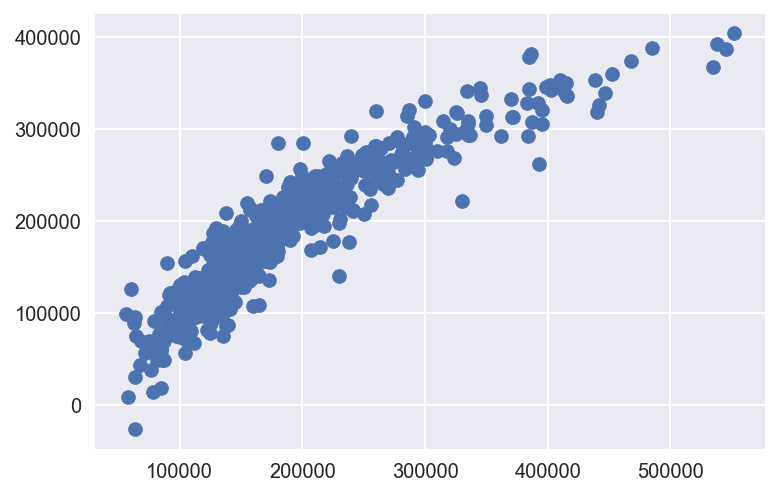

In [100]:
pred = ENCV.predict(Xs_test)
plt.scatter(y_test,pred )
plt.show()

In [101]:
# Comparing the residuals
RCV.fit(Xs_train, y_train)
LCV.fit(Xs_train, y_train)
RCV_resid = y_test - RCV.predict(Xs_test)
LCV_resid = y_test - LCV.predict(Xs_test)

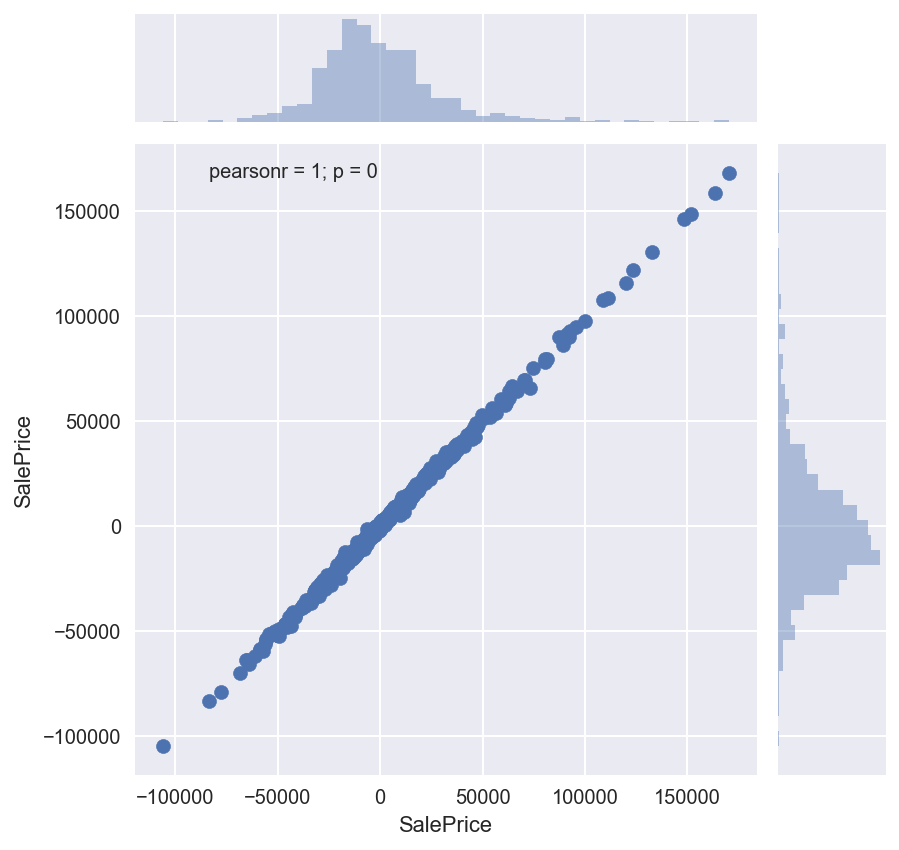

In [102]:
# most likely these two models are so closely correlated that they are overfitting when graphed together and thus the perfect
# coefficient. 
sns.jointplot(RCV_resid, LCV_resid)
None

# K Fold Cross Validation

In [103]:
y = ames['SalePrice']
X = ames[['Overall Qual','Total Bsmt SF','Baths','Garage Cars','Garage Area','Year Built','Gr Liv Area','TotRms AbvGrd','Fireplaces',
       'Open Porch SF','Lot Frontage','Lot Area','Overall Cond']]
X=X.values
y=y.values
print(y.shape, X.shape)

(2047,) (2047, 13)


In [104]:
kfolds = KFold(5)

In [105]:
for training_index, test_index in kfolds.split(X, y):
    print('training: ', training_index[0:6], '...', training_index[-7:-1], 
          '\ntest: ', test_index[0:6], '...', test_index[-7:-1], '\n')

training:  [410 411 412 413 414 415] ... [2040 2041 2042 2043 2044 2045] 
test:  [0 1 2 3 4 5] ... [403 404 405 406 407 408] 

training:  [0 1 2 3 4 5] ... [2040 2041 2042 2043 2044 2045] 
test:  [410 411 412 413 414 415] ... [813 814 815 816 817 818] 

training:  [0 1 2 3 4 5] ... [2040 2041 2042 2043 2044 2045] 
test:  [820 821 822 823 824 825] ... [1222 1223 1224 1225 1226 1227] 

training:  [0 1 2 3 4 5] ... [2040 2041 2042 2043 2044 2045] 
test:  [1229 1230 1231 1232 1233 1234] ... [1631 1632 1633 1634 1635 1636] 

training:  [0 1 2 3 4 5] ... [1631 1632 1633 1634 1635 1636] 
test:  [1638 1639 1640 1641 1642 1643] ... [2040 2041 2042 2043 2044 2045] 



Fold 0 - r^2 score: 0.829375915296 mse: 1074123270.57


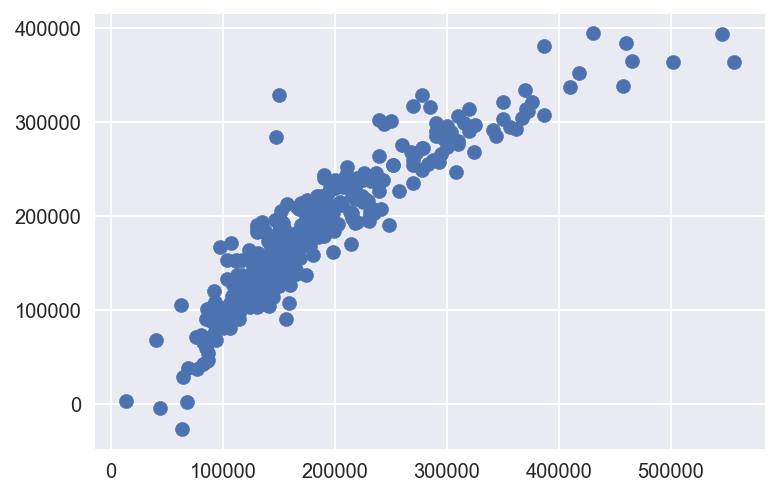

Fold 1 - r^2 score: 0.849122145028 mse: 897555192.08


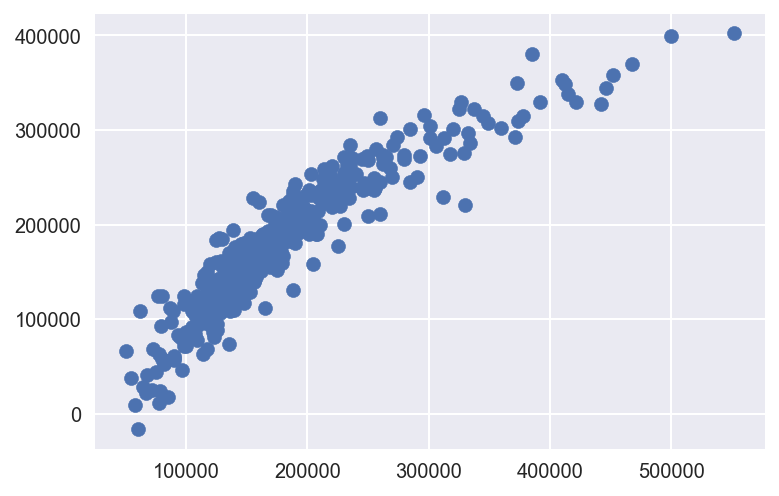

Fold 2 - r^2 score: 0.849560266583 mse: 965613427.61


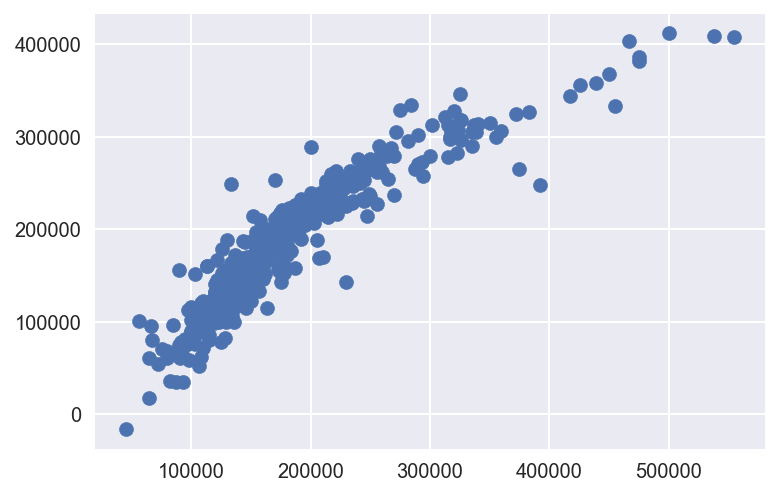

Fold 3 - r^2 score: 0.862692376167 mse: 785257705.685


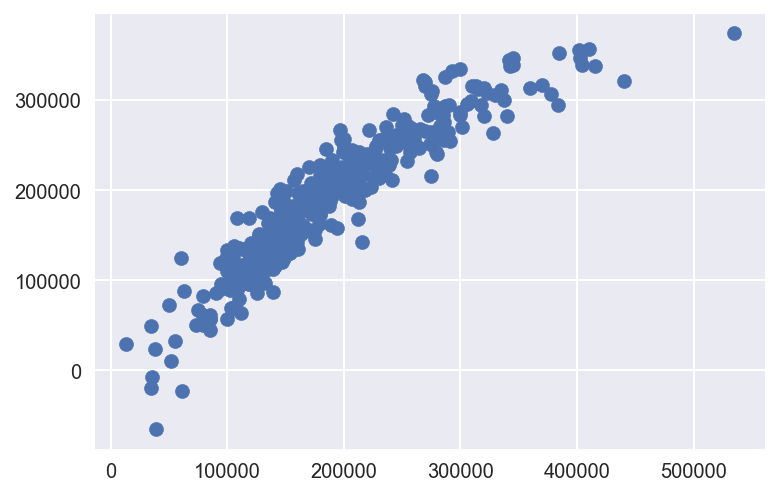

Fold 4 - r^2 score: 0.827579212979 mse: 1201585587.37


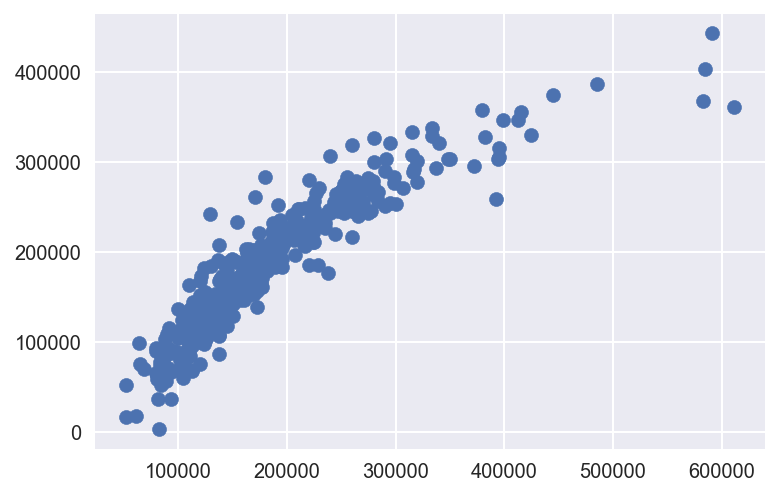

In [106]:
counter = 0
lr = LinearRegression()
for training_index, test_index in kfolds.split(X,y):
    X_train = X[training_index]
    X_test = X[test_index]
    y_train = y[training_index]
    y_test = y[test_index]
    lr.fit(X_train, y_train)
    r2_score = lr.score(X_test, y_test)
    fold_predictions = lr.predict(X_test)
    mse_score = mean_squared_error(y_test, fold_predictions)
    plt.scatter(y_test, fold_predictions)
    print('Fold', counter, '- r^2 score:', r2_score, 'mse:', mse_score)
    plt.show()
    counter += 1

#  Part 2 d.1: Load Test data

In [107]:
# This is the test set
test = pd.read_csv('test.csv')

# Part 2 d.2: Additional EDA for test set

In [108]:
# Since I made this decision to combine these columns in train I have to do it in test.
# Combined the bathrooms into one column. Changed half baths to 0.5 since they are techinically half a room. 
# Created a new column called Baths.
test['Baths'] = test['Bsmt Full Bath'] + 0.5 * test['Bsmt Half Bath'] + test['Full Bath'] + 0.5 * test['Half Bath']

In [109]:
# dropped old bathroom columns since now there is a column with the combination
test.drop(['Bsmt Full Bath', 'Bsmt Half Bath','Full Bath','Half Bath'], axis=1, inplace = True)

In [110]:
# fill in missing points for Lot Frontage
# The mean is 69.o, Median is 68, and the Mode is 60
print(test['Lot Frontage'].describe())
from scipy.stats import mode

print('Mode', mode(test['Lot Frontage']))

count    719.000000
mean      69.630042
std       23.625372
min       21.000000
25%       59.000000
50%       68.000000
75%       80.000000
max      182.000000
Name: Lot Frontage, dtype: float64
Mode ModeResult(mode=array([ 60.]), count=array([97]))


In [111]:
strategy = 'median' 

LF_imputer = Imputer(strategy=strategy)
LF_imputer.fit(test[['Lot Frontage']])

LFs = LF_imputer.transform(
    test[['Lot Frontage']])
print(LFs[0:5], LFs.mean())

[[ 69.]
 [ 68.]
 [ 58.]
 [ 60.]
 [ 68.]] 69.3333333333


In [112]:
test['Lot Frontage']=LFs

#  Part 2 d.3: Preprocessing and  Scaling for test data

In [113]:
Xpred = test[['Overall Qual','Total Bsmt SF','Baths','Garage Cars','Garage Area','Year Built','Gr Liv Area','TotRms AbvGrd','Fireplaces',
       'Open Porch SF','Lot Frontage','Lot Area','Overall Cond']]

In [114]:
ss = StandardScaler()  
ss.fit(X_train)   
Xs_train = ss.transform(X_train)  
Xss_test = ss.transform(Xpred)

#  Part 2 d.4: Modeling in test data

In [115]:
# LinearRegression scores with CV. 
lr = LinearRegression()
lr.fit(Xs_train, y_train)
predictions =lr.predict(Xss_test)
print(predictions)

[ 177949.72336025  199628.15701489  208825.59446821  103680.84786233
  191504.85856935   76660.79258323   95518.51907499  153000.07983615
  205847.3191271   190549.16135588  167660.20697171  128899.85852571
  174720.40412665  307832.38021065  163148.13180197   97457.7325698
  178133.53895282  124049.32260424  214700.84646203  222804.49406146
  145369.40456599  134633.03118967  215764.54583734  180712.79065273
  208539.5696002   114662.94912024  113719.49666028   98695.50636777
  153013.82076907   17144.10674864  107319.9759007    84181.61925742
  240377.23726007  155445.5066727   233397.912372    189429.22886476
  105924.56745704   68697.03902389   88442.75578738  212789.59366619
  158464.12929192  215336.62904959  146386.40089366  162501.66304616
  224806.33681136   81664.0970231   232839.80156355  106296.15388994
  119417.92383315  123037.66680002   99594.39290439  218679.0644236
  264865.22807091  117626.1722095    79423.25998468  159941.35470207
  184431.07021812  147115.45718129  

In [116]:
# These are the steps for fitting the RidegCV/model
alphas = np.logspace(0, 5, 10)
RCV= RidgeCV(alphas = alphas, cv=10)
print(RCV.fit(Xs_train, y_train))
predictions =RCV.predict(Xss_test)
print(predictions)

RidgeCV(alphas=array([  1.00000e+00,   3.59381e+00,   1.29155e+01,   4.64159e+01,
         1.66810e+02,   5.99484e+02,   2.15443e+03,   7.74264e+03,
         2.78256e+04,   1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)
[ 177714.34240642  200072.64390952  209188.50740853  104041.14996728
  192050.72610017   76587.43685118   95302.8991001   152407.73228257
  204396.83308144  191189.73804189  167605.0223003   129353.63348364
  174519.9277315   308328.45474402  163220.24924553   97625.82123332
  178675.10194862  123947.79538697  214882.12892977  223070.51648293
  145774.19782584  135349.93235488  215450.09851511  181021.79919918
  208457.24176594  114475.61688043  113762.26003364   98749.73577182
  153386.62485027   17547.62879444  106630.8579719    84377.00808073
  240088.26396537  155704.1236029   233143.97446783  189067.22027552
  106697.66980845   69013.61301034   88769.89239372  212351.74853845
  158351.16830086 

In [117]:
LCV = LassoCV(n_alphas =100, cv=10)
print(LCV.fit(Xs_train, y_train))
predictions = LCV.predict(Xss_test)
print(predictions)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
[ 177692.89653943  200100.39781615  209044.85930283  104236.52054343
  191630.04343099   76542.59535351   95346.06744137  152635.64463535
  204963.39412347  190666.77144578  167785.85512437  129727.02933039
  174944.4181454   308032.79202958  163456.38824364   97569.0200409
  177900.30703578  123844.34644984  214664.03614636  223302.89736338
  145190.15393711  134353.69082741  215418.72196434  180576.22174275
  208414.27927777  114387.54039026  113564.29647688   99240.39551232
  153336.18422793   17024.7336872   106082.82731745   84501.68756777
  241300.00179724  155571.12589795  233086.05906233  189528.53045295
  106671.90338468   68993.93226183   88882.15121904  212389.08383024
  158166.16583619  215963.81463844  146472.81601212  162161.15812377
 

In [118]:
l1_ratios = np.linspace(0.01, 1.0, 25)
ENCV = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,verbose=1)
ENCV.fit(Xs_train, y_train)
predictions = ENCV.predict(Xss_test)
print(predictions)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[ 177692.89653943  200100.39781615  209044.85930283  104236.52054343
  191630.04343099   76542.59535351   95346.06744137  152635.64463535
  204963.39412347  190666.77144578  167785.85512437  129727.02933039
  174944.4181454   308032.79202958  163456.38824364   97569.0200409
  177900.30703578  123844.34644984  214664.03614636  223302.89736338
  145190.15393711  134353.69082741  215418.72196434  180576.22174275
  208414.27927777  114387.54039026  113564.29647688   99240.39551232
  153336.18422793   17024.7336872   106082.82731745   84501.68756777
  241300.00179724  155571.12589795  233086.05906233  189528.53045295
  106671.90338468   68993.93226183   88882.15121904  212389.08383024
  158166.16583619  215963.81463844  146472.81601212  162161.15812377
  224548.81748288   81366.31058557  232253.24534228  106429.5658128
  119014.8102402   122864.11248575  100122.23452068  218256.48575895
  264951.68339198  117571.34069651   79632.62502578  160125.85700442
  184632.62742448  146515.83858615  

...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    4.5s finished


# Submissions round 1

In [119]:
lr_sub1 =pd.DataFrame()
lr_sub1['Id']=test['Id']
lr_sub1['SalePrice']=predictions

In [120]:
lr_sub1.head()

Id      SalePrice
0  2658  177692.896539
1  2718  200100.397816
2  2414  209044.859303
3  1989  104236.520543
4   625  191630.043431

In [121]:
lr_sub1.to_csv(path_or_buf='Submission1_lr', index=False)

In [122]:
RCV_sub2 =pd.DataFrame()
RCV_sub2['Id']=test['Id']
RCV_sub2['SalePrice']=predictions

In [123]:
RCV_sub2.head()

Id      SalePrice
0  2658  177692.896539
1  2718  200100.397816
2  2414  209044.859303
3  1989  104236.520543
4   625  191630.043431

In [124]:
RCV_sub2.to_csv(path_or_buf='Submission1_RCV', index=False)

In [125]:
LCV_sub3 =pd.DataFrame()
LCV_sub3['Id']=test['Id']
LCV_sub3['SalePrice']=predictions

In [126]:
LCV_sub3.head()

Id      SalePrice
0  2658  177692.896539
1  2718  200100.397816
2  2414  209044.859303
3  1989  104236.520543
4   625  191630.043431

In [127]:
LCV_sub3.to_csv(path_or_buf='Submission1_LCV', index=False)

# Part 3: Second round at submissions

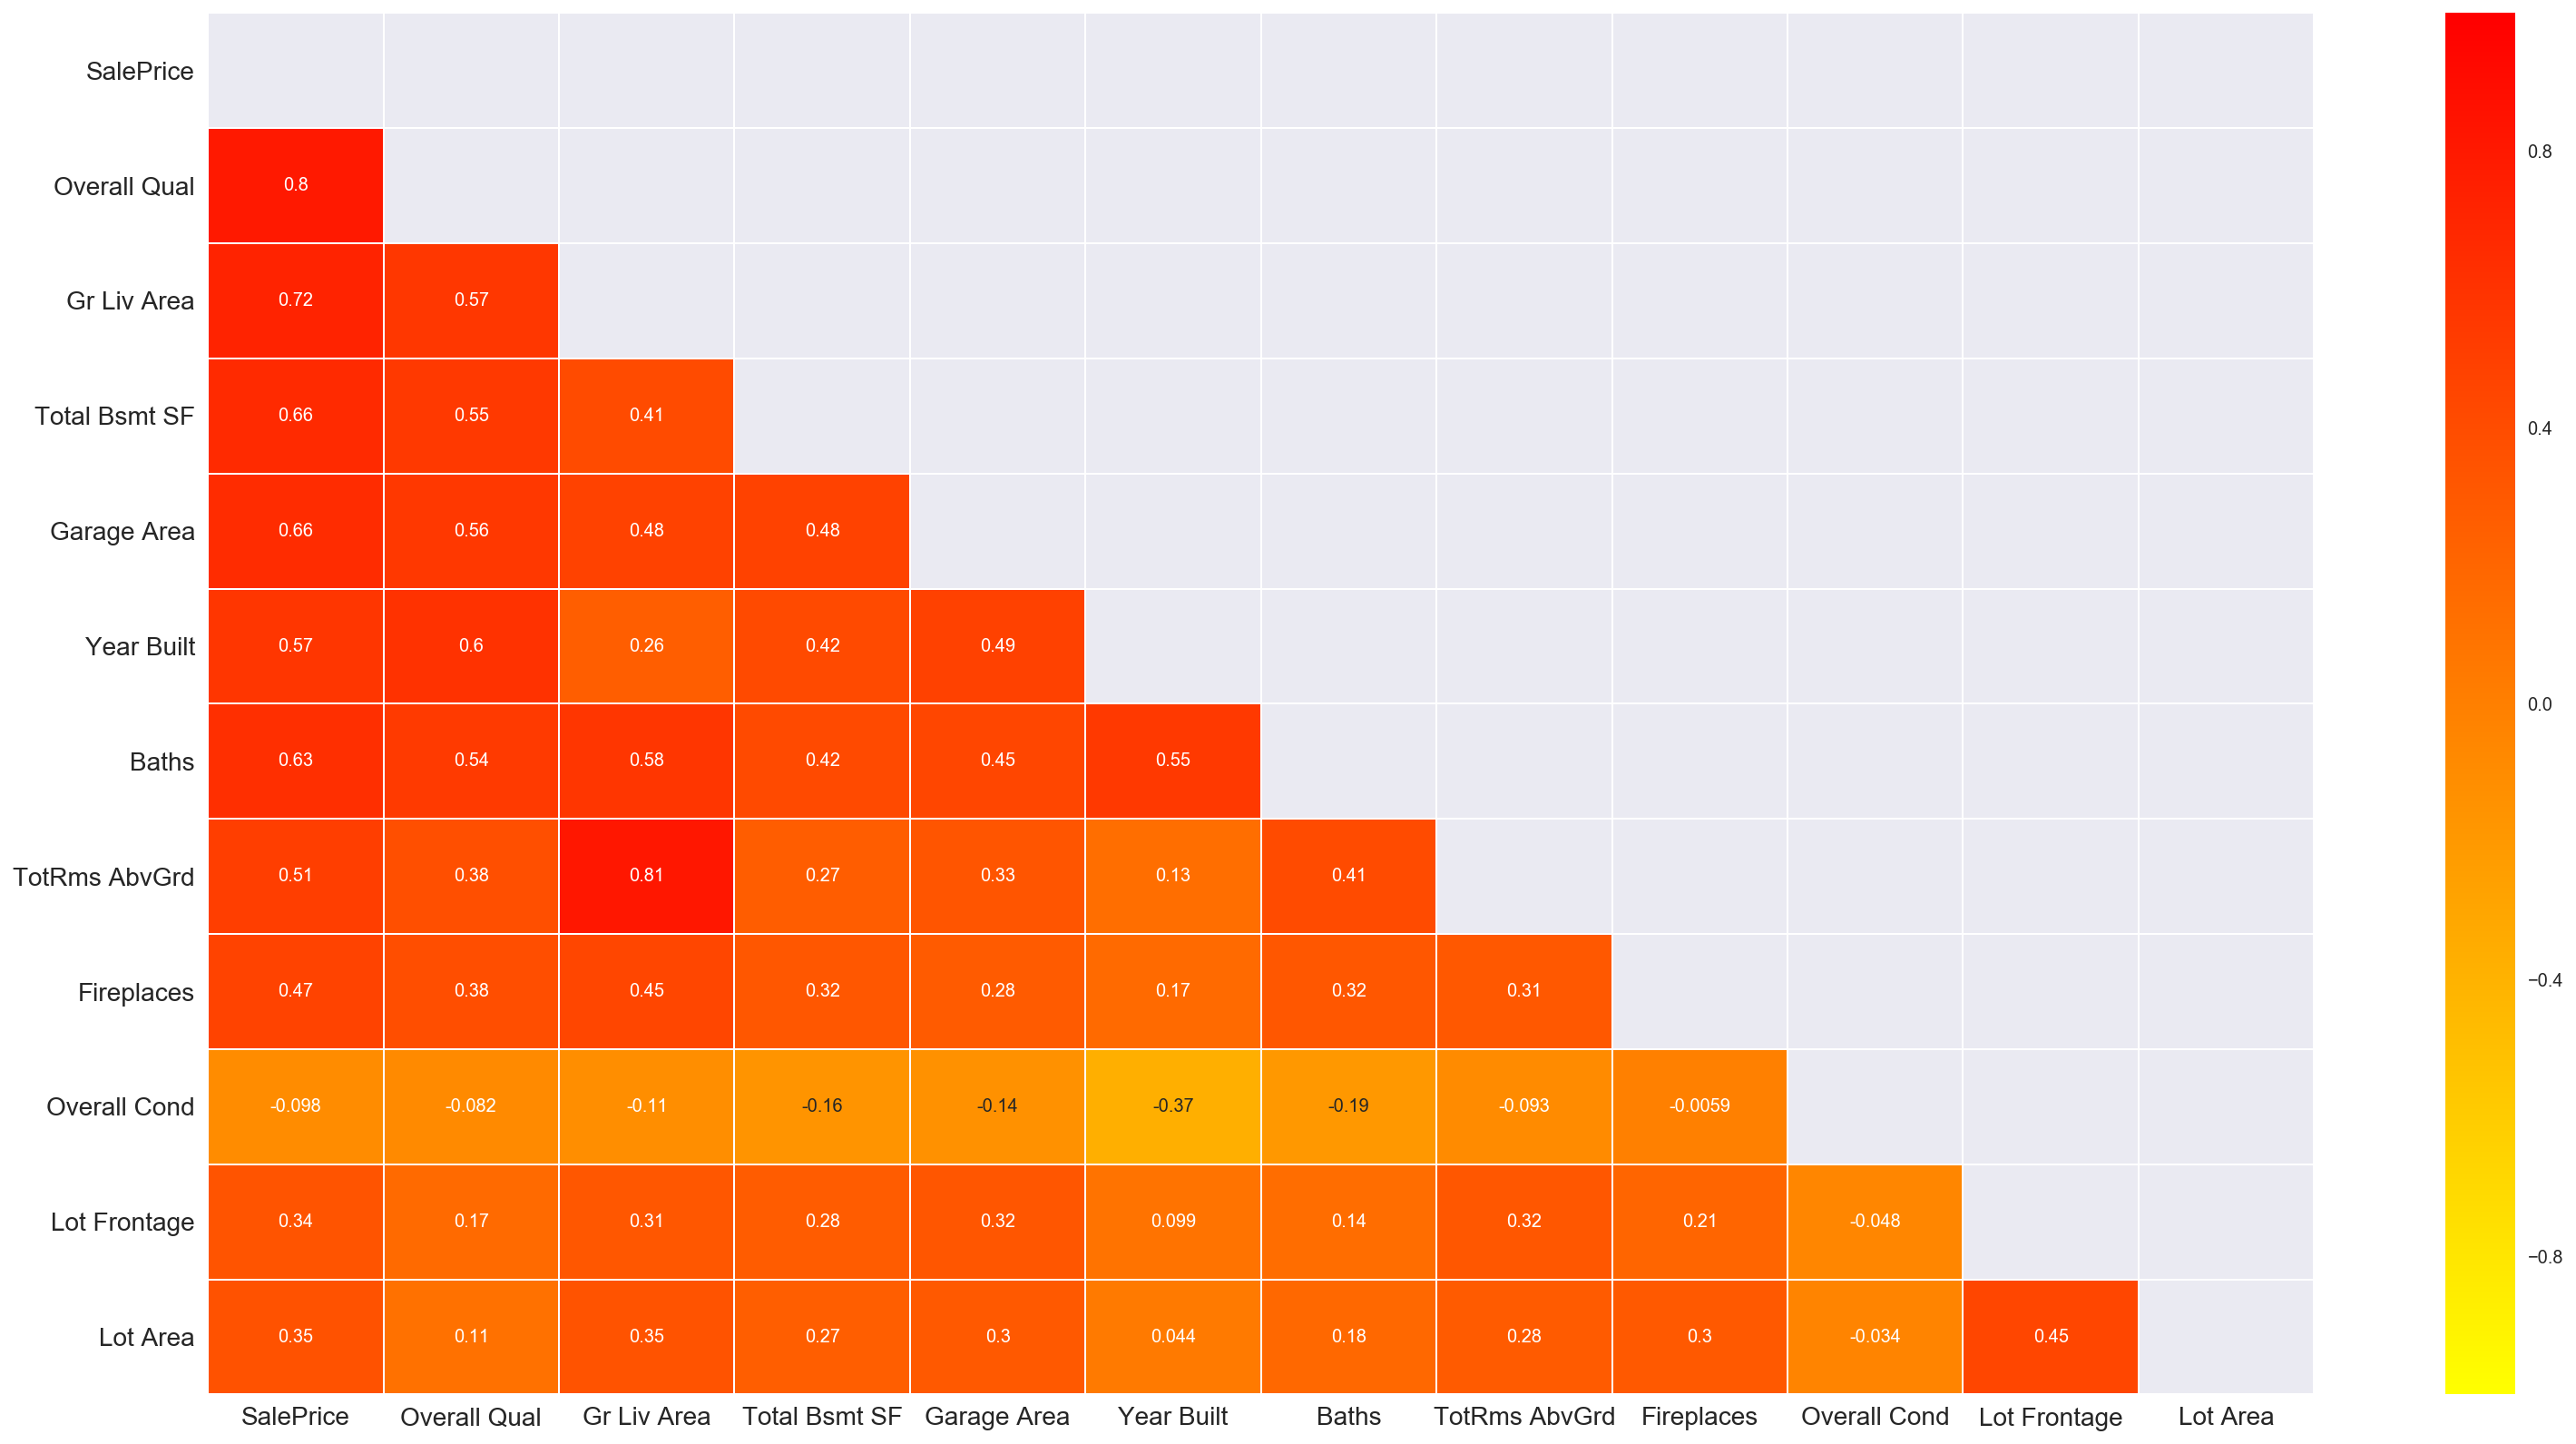

In [128]:
# Going to look over correltion data again and drop some of the lower correlations with the high 0.0 that I wasn't sure about
# the first time.
area4_corr = ames[['SalePrice','Overall Qual','Gr Liv Area','Total Bsmt SF','Garage Area','Year Built',
                  'Baths','TotRms AbvGrd','Fireplaces','Overall Cond','Lot Frontage','Lot Area']].corr()

fig, ax = plt.subplots(figsize=(26,14))

mask = np.zeros_like(area4_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

ax = sns.heatmap(area4_corr, ax=ax, mask=mask, annot=True, cmap="autumn_r", linewidths=.5)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

In [129]:
area4_corr.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
Overall Qual     0.917828
Total Bsmt SF    0.798214
Baths            0.796632
Garage Area      0.792564
Year Built       0.755301
Gr Liv Area      0.740916
TotRms AbvGrd    0.493494
Fireplaces       0.390229
Lot Frontage     0.030514
Lot Area         0.014303
Overall Cond    -0.748729
Name: SalePrice, dtype: float64

# Part 3 a: Preprocessing, Scaling, and Creating train/test sets

In [130]:
#Setting y as target which is SalePrice and X are the feature columns that have been hand picked due to there correlation
#values and extensive EDA
y1 = ames['SalePrice']
X1 = ames[['Overall Qual','Total Bsmt SF','Baths','Garage Area','Year Built','Gr Liv Area','TotRms AbvGrd','Fireplaces',
          'Lot Frontage','Lot Area','Overall Cond']]

In [131]:
# decided to change the test size to see if that would make a difference
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.40)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(1228, 11) (819, 11) (1228,) (819,)


In [132]:
ss = StandardScaler()  
ss.fit(X1_train)   
X1s_train = ss.transform(X1_train)  
X1s_test = ss.transform(X1_test)

# Part 3 b: Modeling on train split training data

In [133]:
# Fitting for Linear Regression
lr = LinearRegression()
lr.fit(X1s_train, y1_train)
print('Cross Val Score', cross_val_score(lr, X1s_train, y1_train, cv=10))

Cross Val Score [ 0.81949948  0.83061242  0.82585517  0.82618866  0.8618152   0.86466421
  0.80976181  0.81159742  0.84447242  0.82982575]


In [134]:
scores = cross_val_score(lr, X1s_train, y1_train, cv=10)
print('Scores mean', scores.mean(),'Scores std dev', scores.std())

Scores mean 0.832429255775 Scores std dev 0.0180412414042


In [135]:
# These are the steps for fitting the RidegCV/model
alphas = np.logspace(0.1, 1.0, 10)
RCV= RidgeCV(alphas = alphas, cv=10)
print(RCV.fit(X1s_train, y1_train))
print('Optimal alpha', RCV.alpha_)
print('Cross Val Score', cross_val_score(RCV, X1s_train, y1_train, cv=10))
scoresRCV = cross_val_score(RCV, X1s_train, y1_train, cv=10)
print('Scores mean',scoresRCV.mean(),'Scores std dev', scoresRCV.std())

RidgeCV(alphas=array([  1.25893,   1.58489,   1.99526,   2.51189,   3.16228,   3.98107,
         5.01187,   6.30957,   7.94328,  10.     ]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)
Optimal alpha 10.0
Cross Val Score [ 0.81945923  0.82987638  0.82624934  0.82806731  0.86231092  0.86445618
  0.8092168   0.81160072  0.8449759   0.82900626]
Scores mean 0.832521904596 Scores std dev 0.0181446668175


In [136]:
# These are the steps for LassoCV
LCV = LassoCV(n_alphas =250, cv=10)
print(LCV.fit(X1s_train, y1_train))
print('Optimal alpha',LCV.alpha_)
print('Cross Val Score', cross_val_score(LCV,X1s_train, y1_train, cv=10))
scoresLCV = cross_val_score(LCV, X1s_train, y1_train, cv=10)
print('Scores mean',scoresLCV.mean(),'Scores std dev', scoresLCV.std())

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=250, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
Optimal alpha 63.077284483
Cross Val Score [ 0.81953864  0.82779499  0.82574067  0.82661373  0.86219119  0.86456306
  0.80957398  0.81182326  0.84481452  0.8293311 ]
Scores mean 0.83219851419 Scores std dev 0.01814934662


In [137]:
l1_ratios = np.linspace(0.01, 1.0, 25)
ENCV = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=50, cv=10,verbose=1)
ENCV.fit(Xs_train, y_train)

print('Optimal alpha', ENCV.alpha_)
print('l1 ratio', ENCV.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Optimal alpha 63.1829934043
l1 ratio 1.0


...................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    2.4s finished


In [138]:
enet = ElasticNet(alpha=ENCV.alpha_, l1_ratio=ENCV.l1_ratio_)

enet_scores = cross_val_score(enet, X1s_train, y1_train, cv=10)

print('Enet scores',enet_scores)
print('Enet scores mean',np.mean(enet_scores))

Enet scores [ 0.8195386   0.83010508  0.8257417   0.82660892  0.8621936   0.86456141
  0.80956993  0.81182449  0.84481112  0.82931939]
Enet scores mean 0.832427423985


# Part 3 c: Modeling on train split testing data

In [139]:
#Fitting for Linear FRegression
lr = LinearRegression()
lr.fit(X1s_train, y1_train)
print(lr.score(X1s_test, y1_test))
print('Cross Val Score', cross_val_score(lr, X1s_test, y1_test, cv=10))
print('Coefficients', lr.coef_)

0.852228903484
Cross Val Score [ 0.84839372  0.81452227  0.84284321  0.86920224  0.80950855  0.85943814
  0.85125535  0.86304305  0.8826541   0.83583458]
Coefficients [ 26582.52337223  14640.44247652   4540.3789161    6848.25786365
  12522.11600627  23218.89048654  -3150.88190914   5453.01602947
   5185.34502473   6066.05037993   6298.24011093]


In [140]:
scores = cross_val_score(lr, X1s_test, y1_test, cv=10)
print('Scores mean', scores.mean(),'Scores std dev', scores.std())

Scores mean 0.84766952073 Scores std dev 0.0218955838069


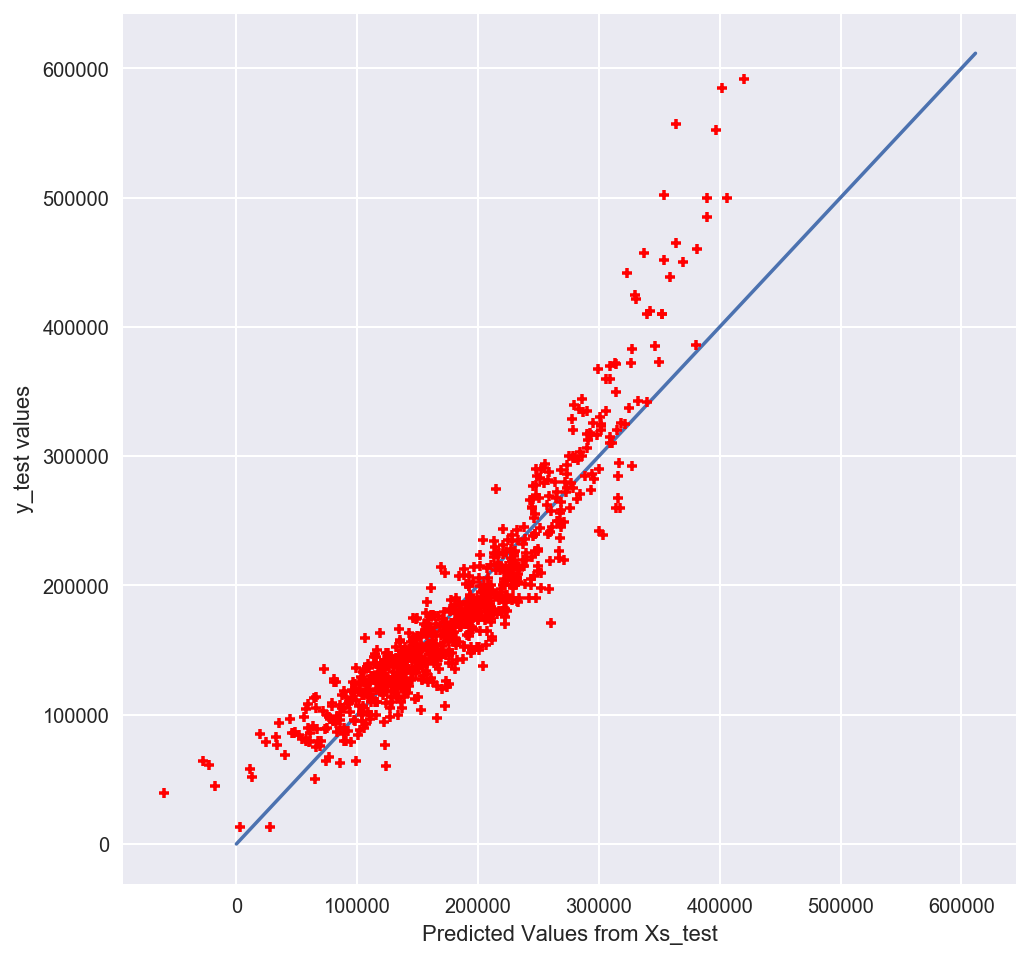

score:  0.852228903484


In [141]:
lrtest = lr.fit(X1s_train, y1_train)

predictions  =  lrtest.predict(X1s_test)
score        =  lrtest.score(X1s_test, y1_test)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y1_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Xs_test")
plt.ylabel("y_test values")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

print("score: ", score)

In [142]:
# These are the steps for fitting the RidegCV/model
alphas = np.logspace(0, 5, 10)
RCV= RidgeCV(alphas = alphas, cv=10)
print(RCV.fit(X1s_train, y1_train))
print(RCV.score(X1s_test, y1_test))
print('Optimal alpha', RCV.alpha_)
print('Cross Val Score', cross_val_score(RCV, X1s_test, y1_test, cv=10))
scoresRCV = cross_val_score(RCV, X1s_test, y1_test, cv=10)
print('Scores mean',scoresRCV.mean(),'Scores std dev', scoresRCV.std())

RidgeCV(alphas=array([  1.00000e+00,   3.59381e+00,   1.29155e+01,   4.64159e+01,
         1.66810e+02,   5.99484e+02,   2.15443e+03,   7.74264e+03,
         2.78256e+04,   1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)
0.85211053818
Optimal alpha 12.9154966501
Cross Val Score [ 0.8503563   0.81954977  0.84639806  0.87441753  0.81128139  0.85093531
  0.8479687   0.86460616  0.87707423  0.83255932]
Scores mean 0.847514677843 Scores std dev 0.0205655728238


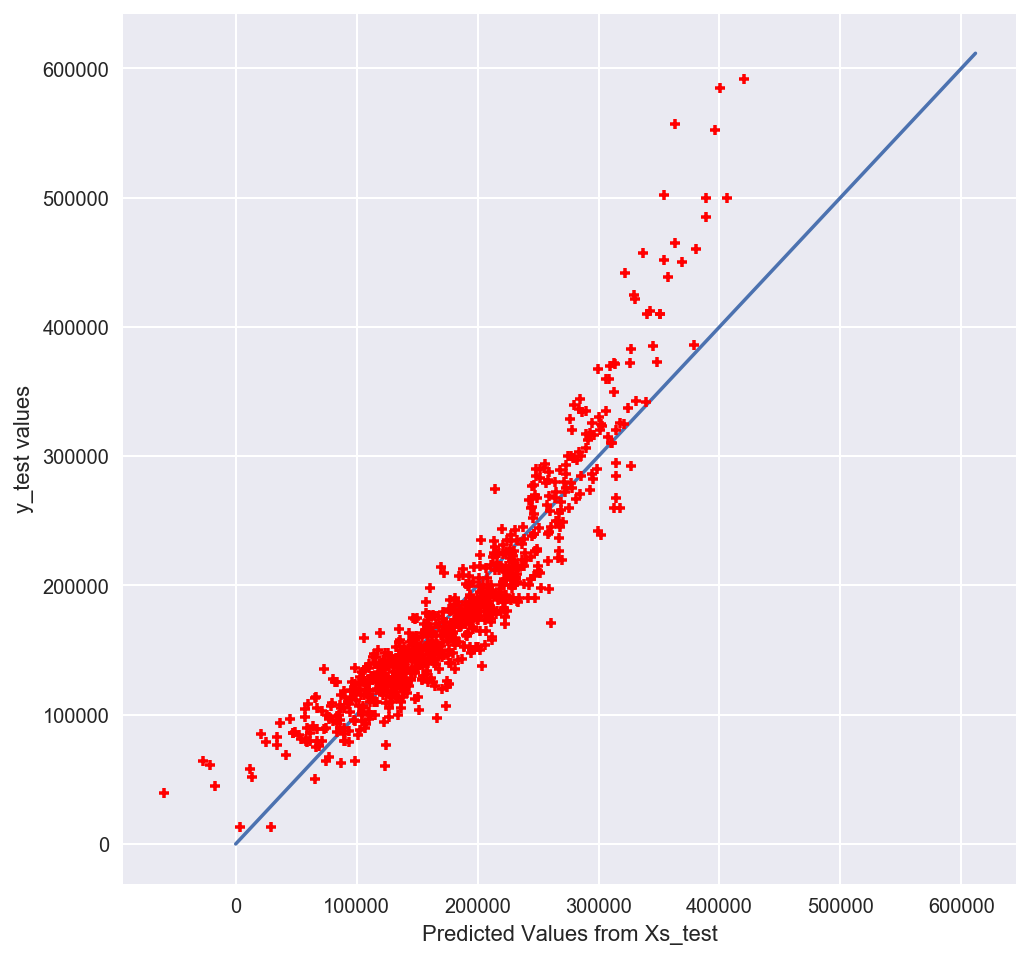

score:  0.85211053818


In [143]:
RCVtest = RCV.fit(X1s_train, y1_train)

predictions  =  RCVtest.predict(X1s_test)
score        =  RCVtest.score(X1s_test, y1_test)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y1_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Xs_test")
plt.ylabel("y_test values")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

print("score: ", score)

In [144]:
# These are the steps for LassoCV
LCV = LassoCV(n_alphas =100, cv=10)
print(LCV.fit(X1s_train, y1_train))
print(LCV.score(X1s_test, y1_test))
print('Optimal alpha',LCV.alpha_)
print('Cross Val Score', cross_val_score(LCV,X1s_test, y1_test, cv=10))
scoresLCV = cross_val_score(LCV, X1s_test, y1_test, cv=10)
print('Scores mean',scoresLCV.mean(),'Scores std dev', scoresLCV.std())

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
0.852253937283
Optimal alpha 63.077284483
Cross Val Score [ 0.84908619  0.82085265  0.84206502  0.87243267  0.81115538  0.85799358
  0.85013387  0.86330846  0.88060911  0.83024802]
Scores mean 0.847788495507 Scores std dev 0.0210824051308


In [145]:
# ElasticNetCV set up
l1_ratios = np.linspace(0.01, 1.0, 25)
ENCV = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,verbose=1)
ENCV.fit(X1s_train, y1_train)
print(ENCV.score(X1s_test, y1_test))
print('Optimal alpha', ENCV.alpha_)
print('l1 ratio', ENCV.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.852253937283
Optimal alpha 63.077284483
l1 ratio 1.0


In [146]:
enet = ElasticNet(alpha=ENCV.alpha_, l1_ratio=ENCV.l1_ratio_)

enet_scores = cross_val_score(enet, X1s_test, y1_test, cv=10)

print('Enet scores',enet_scores)
print('Enet scores mean',np.mean(enet_scores))

Enet scores [ 0.84905054  0.81523683  0.84267482  0.86970689  0.80966515  0.85912951
  0.85106049  0.86329693  0.88218096  0.8352129 ]
Enet scores mean 0.847721502247


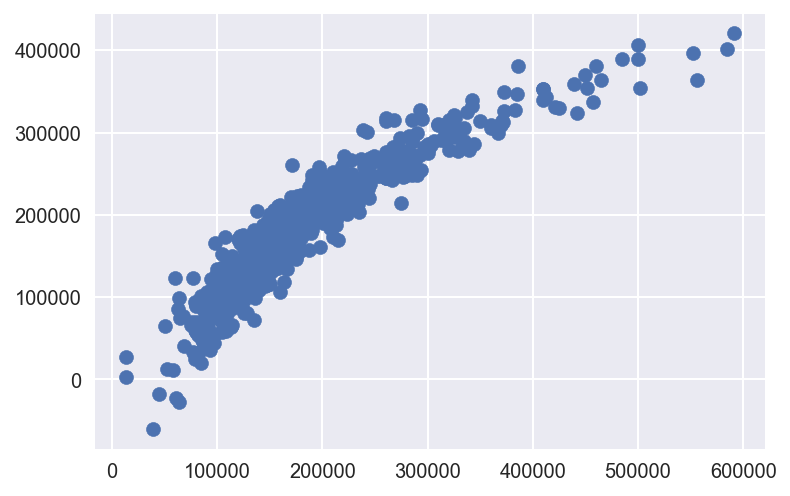

In [147]:
pred =  lr.predict(X1s_test)
plt.scatter(y1_test,pred )
plt.show()

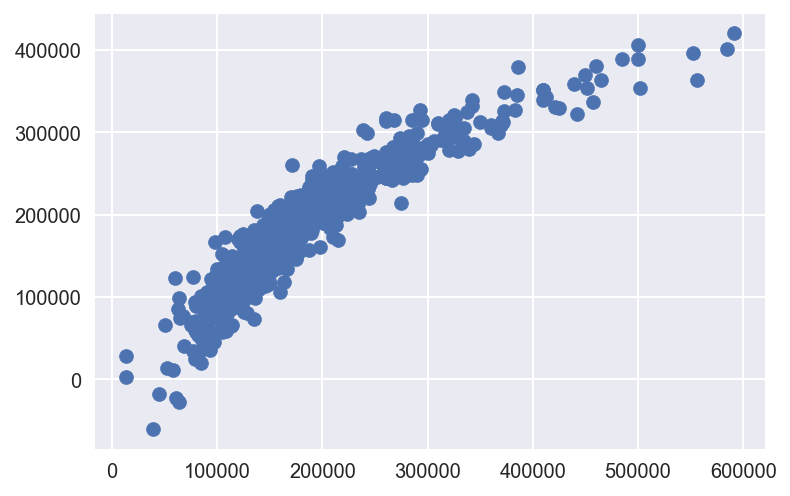

In [148]:
pred =  ENCV.predict(X1s_test)
plt.scatter(y1_test,pred )
plt.show()

# K Fold Cross Validation

In [149]:
y1 = ames['SalePrice']
X1 = ames[['Overall Qual','Total Bsmt SF','Baths','Garage Area','Year Built','Gr Liv Area','TotRms AbvGrd','Fireplaces',
       'Lot Frontage','Lot Area','Overall Cond']]
X1=X1.values
y1=y1.values
print(y1.shape, X1.shape)

(2047,) (2047, 11)


In [150]:
kfolds= KFold(5)

In [151]:
for training_index, test_index in kfolds.split(X1, y1):
    print('training: ', training_index[0:6], '...', training_index[-7:-1], 
          '\ntest: ', test_index[0:6], '...', test_index[-7:-1], '\n')

training:  [410 411 412 413 414 415] ... [2040 2041 2042 2043 2044 2045] 
test:  [0 1 2 3 4 5] ... [403 404 405 406 407 408] 

training:  [0 1 2 3 4 5] ... [2040 2041 2042 2043 2044 2045] 
test:  [410 411 412 413 414 415] ... [813 814 815 816 817 818] 

training:  [0 1 2 3 4 5] ... [2040 2041 2042 2043 2044 2045] 
test:  [820 821 822 823 824 825] ... [1222 1223 1224 1225 1226 1227] 

training:  [0 1 2 3 4 5] ... [2040 2041 2042 2043 2044 2045] 
test:  [1229 1230 1231 1232 1233 1234] ... [1631 1632 1633 1634 1635 1636] 

training:  [0 1 2 3 4 5] ... [1631 1632 1633 1634 1635 1636] 
test:  [1638 1639 1640 1641 1642 1643] ... [2040 2041 2042 2043 2044 2045] 



Fold 0 - r^2 score: 0.829842097606 mse: 1071188530.91


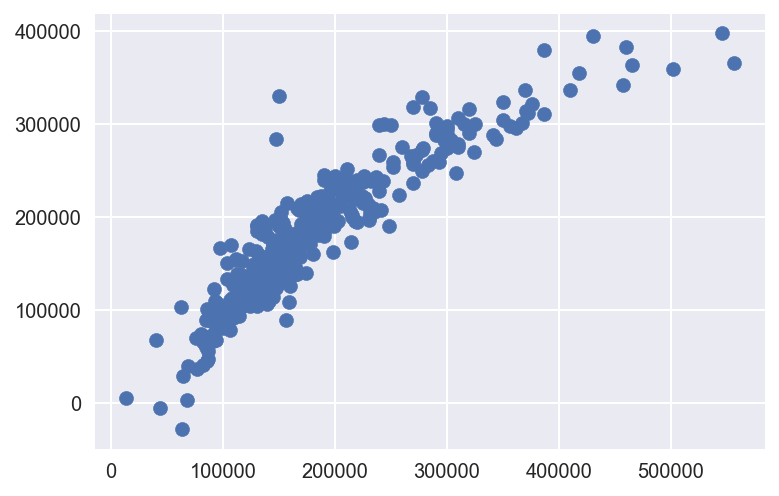

Fold 1 - r^2 score: 0.848053647994 mse: 903911559.359


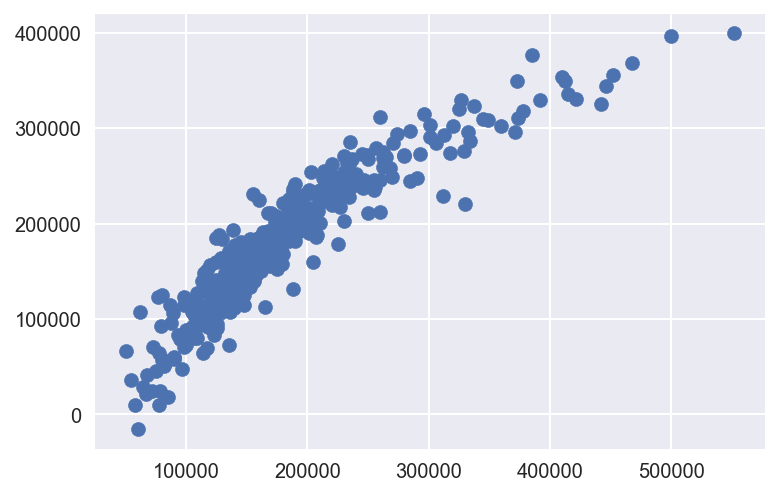

Fold 2 - r^2 score: 0.849048169748 mse: 968900375.61


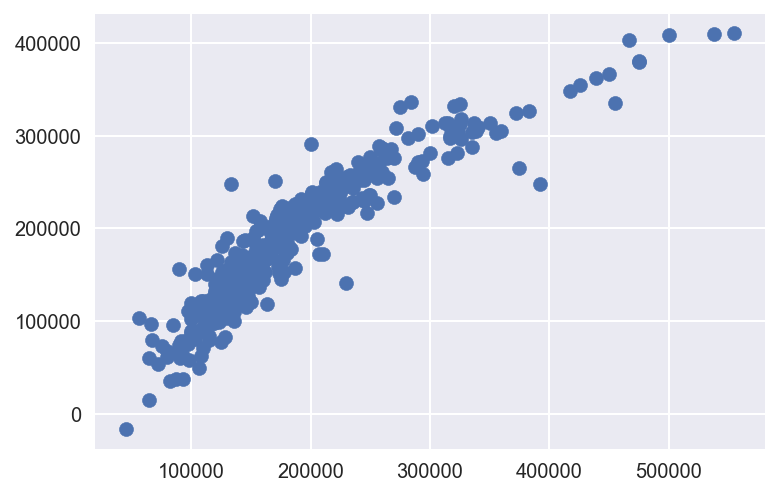

Fold 3 - r^2 score: 0.862780817477 mse: 784751912.793


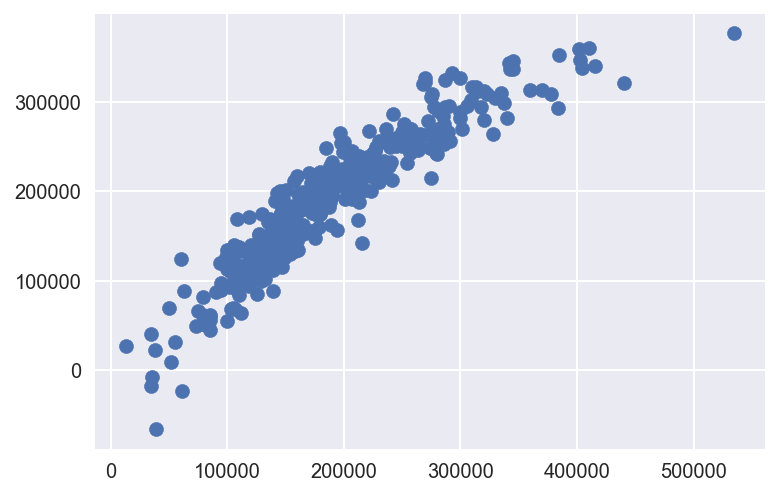

Fold 4 - r^2 score: 0.827344281885 mse: 1203222801.89


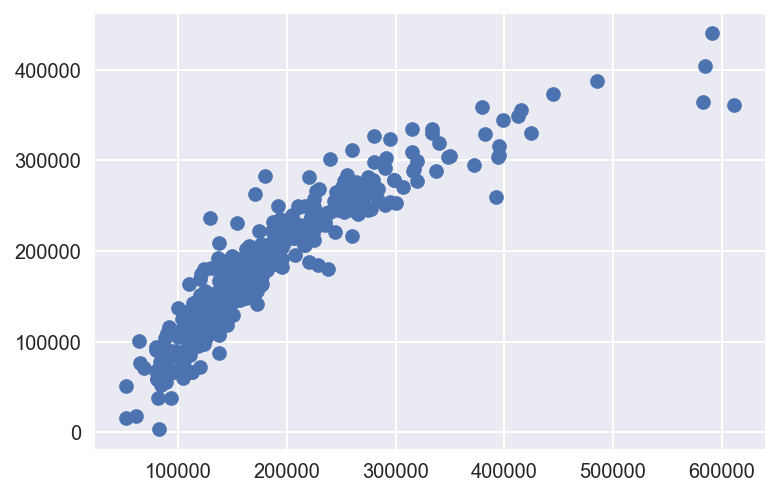

In [152]:
counter = 0
lr = LinearRegression()
for training_index, test_index in kfolds.split(X1,y1):
    X1_train = X1[training_index]
    X1_test = X1[test_index]
    y1_train = y1[training_index]
    y1_test = y1[test_index]
    lr.fit(X1_train, y1_train)
    r2_score = lr.score(X1_test, y1_test)
    fold_predictions = lr.predict(X1_test)
    mse_score = mean_squared_error(y1_test, fold_predictions)
    plt.scatter(y1_test, fold_predictions)
    print('Fold', counter, '- r^2 score:', r2_score, 'mse:', mse_score)
    plt.show()
    counter += 1

# Part 3 d.1:  Load test data

In [153]:
# This is the test set
test1 = pd.read_csv('test.csv')

# Part 3 d.2: Additional EDA for test set

In [154]:
test1['Baths'] = test1['Bsmt Full Bath'] + 0.5 * test1['Bsmt Half Bath'] + test1['Full Bath'] + 0.5 * test1['Half Bath']

In [155]:
test1.drop(['Bsmt Full Bath', 'Bsmt Half Bath','Full Bath','Half Bath'], axis=1, inplace = True)

In [156]:
print(test1['Lot Frontage'].describe())
from scipy.stats import mode

print('Mode', mode(test1['Lot Frontage']))

count    719.000000
mean      69.630042
std       23.625372
min       21.000000
25%       59.000000
50%       68.000000
75%       80.000000
max      182.000000
Name: Lot Frontage, dtype: float64
Mode ModeResult(mode=array([ 60.]), count=array([97]))


In [157]:
strategy = 'median' 

LF_imputer = Imputer(strategy=strategy)
LF_imputer.fit(test1[['Lot Frontage']])

LFs = LF_imputer.transform(
    test1[['Lot Frontage']])
print(LFs[0:5], LFs.mean())

[[ 69.]
 [ 68.]
 [ 58.]
 [ 60.]
 [ 68.]] 69.3333333333


In [158]:
test1['Lot Frontage']=LFs

# Part 3 d.3: Preprocessing and Scaling for test data

In [159]:
X1pred = test1[['Overall Qual','Total Bsmt SF','Baths','Garage Area','Year Built','Gr Liv Area','TotRms AbvGrd','Fireplaces',
       'Lot Frontage','Lot Area','Overall Cond']]

In [160]:
ss = StandardScaler()  
ss.fit(X1_train)   
X1s_train = ss.transform(X1_train)  
X1ss_test = ss.transform(X1pred)

# Part 3 d.4: Modeling in test data

In [161]:
# LinearRegression scores  
lr = LinearRegression()
lr.fit(X1s_train, y_train)
predictions =lr.predict(X1ss_test)
print(predictions)

[ 176599.26786451  200647.04553825  209708.85817955  105166.26280741
  190861.481377     76741.25549649   95791.12372119  154084.07916371
  204688.68879093  189861.79034816  167591.57469596  128354.8894302
  176055.77305971  312301.3667706   163259.73325139   97671.2461077
  177052.13113186  124214.69828637  214606.76810745  221420.74509028
  143552.67270303  126559.34231563  215616.71652309  178369.7755746
  205169.60051785  114558.07817189  113755.70510779   99773.79955792
  154474.78237421   16055.75388552  105226.87139568   84737.89362624
  245346.05477986  157229.71813121  231545.52316739  190274.13668279
  107058.28777152   69998.13797098   90053.51886323  209486.85895887
  153788.20187236  216855.98204728  146940.05903953  161942.6185455
  226332.28011785   81302.38604526  232798.63924306  106259.88732665
  119944.10645732  123344.89484734  100877.41907252  217831.77798743
  265657.49303     116595.86007108   79515.5999161   160601.09444887
  183207.64128903  145627.19459687  19

In [162]:
# These are the steps for fitting the RidegCV/model
alphas = np.logspace(0, 5, 10)
RCV= RidgeCV(alphas = alphas, cv=10)
print(RCV.fit(X1s_train, y1_train))
predictions =RCV.predict(X1ss_test)
print(predictions)

RidgeCV(alphas=array([  1.00000e+00,   3.59381e+00,   1.29155e+01,   4.64159e+01,
         1.66810e+02,   5.99484e+02,   2.15443e+03,   7.74264e+03,
         2.78256e+04,   1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)
[ 176675.74171943  201222.04091406  210059.57121287  105291.4837518
  191314.30253019   76780.76590984   95665.27705024  153528.6835586
  203206.42629939  190354.95044071  167367.67863028  128113.14573467
  175599.87840665  312459.74299267  163353.83986891   97961.60224457
  178185.83504137  124302.97243132  214501.4888173   221194.51447356
  143956.51090895  127110.2745876   215258.54985599  178518.6304987
  204952.68358975  114581.97518818  114044.78497717   99775.44443529
  154751.48795749   16560.00450115  105282.66587411   84755.50840181
  244381.94323228  157306.65722637  231335.58577612  189830.54280782
  107710.31712227   70092.58918108   90108.13776452  208983.48841091
  153375.84989995  21

In [163]:
LCV = LassoCV(n_alphas =100, cv=10)
print(LCV.fit(X1s_train, y1_train))
predictions = LCV.predict(X1ss_test)
print(predictions)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
[ 176816.8583954   201177.5641599   209835.27517294  105307.73991775
  190907.12942495   76757.46362716   95717.05834576  153715.89620923
  203903.87600058  189837.99372063  167523.15983523  128386.1166932
  175883.24900616  311750.46826538  163587.60574696   97909.19884217
  177548.43045666  124232.7938664   214246.13059674  221429.05805724
  143507.66572207  126657.72174563  215245.69965228  178204.65999817
  205137.30521323  114545.7205845   113896.64434729  100174.51541216
  154553.65511381   16154.47044705  105036.65419355   84789.53673184
  245072.00189764  157001.64260488  231429.84084582  190221.63734379
  107564.45321706   69915.46825202   90031.07793744  209269.94640647
  153496.79005297  217391.60267539  147133.8886938   161775.40382344
 

In [164]:
l1_ratios = np.linspace(0.01, 1.0, 25)
ENCV = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,verbose=1)
ENCV.fit(X1s_train, y1_train)
predictions = ENCV.predict(X1ss_test)
print(predictions)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[ 176816.8583954   201177.5641599   209835.27517294  105307.73991775
  190907.12942495   76757.46362716   95717.05834576  153715.89620923
  203903.87600058  189837.99372063  167523.15983523  128386.1166932
  175883.24900616  311750.46826538  163587.60574696   97909.19884217
  177548.43045666  124232.7938664   214246.13059674  221429.05805724
  143507.66572207  126657.72174563  215245.69965228  178204.65999817
  205137.30521323  114545.7205845   113896.64434729  100174.51541216
  154553.65511381   16154.47044705  105036.65419355   84789.53673184
  245072.00189764  157001.64260488  231429.84084582  190221.63734379
  107564.45321706   69915.46825202   90031.07793744  209269.94640647
  153496.79005297  217391.60267539  147133.8886938   161775.40382344
  226048.05272619   81355.54163765  232500.9438343   106591.91912464
  119651.80383287  123349.87216307  101116.27352762  217490.21959016
  265758.37987311  116634.47960759   79855.74599309  160426.80332825
  183469.91295924  145684.30891528 

............................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    4.4s finished


# Submissions Round 2

In [165]:
lr_sub2 =pd.DataFrame()
lr_sub2['Id']=test1['Id']
lr_sub2['SalePrice']=predictions

In [166]:
lr_sub2.head()

Id      SalePrice
0  2658  176816.858395
1  2718  201177.564160
2  2414  209835.275173
3  1989  105307.739918
4   625  190907.129425

In [167]:
lr_sub2.to_csv(path_or_buf='Submission2_lr', index=False)

In [168]:
RCV_sub2 =pd.DataFrame()
RCV_sub2['Id']=test1['Id']
RCV_sub2['SalePrice']=predictions

In [169]:
RCV_sub2.head()

Id      SalePrice
0  2658  176816.858395
1  2718  201177.564160
2  2414  209835.275173
3  1989  105307.739918
4   625  190907.129425

In [170]:
RCV_sub2.to_csv(path_or_buf='Submission2_RCV', index=False)

In [171]:
LCV_sub2 =pd.DataFrame()
LCV_sub2['Id']=test1['Id']
LCV_sub2['SalePrice']=predictions

In [172]:
LCV_sub2.head()

Id      SalePrice
0  2658  176816.858395
1  2718  201177.564160
2  2414  209835.275173
3  1989  105307.739918
4   625  190907.129425

In [173]:
LCV_sub2.to_csv(path_or_buf='Submission2_LCV', index=False)

In [174]:
ENCV_sub2 =pd.DataFrame()
ENCV_sub2['Id']=test1['Id']
ENCV_sub2['SalePrice']=predictions

In [175]:
ENCV_sub2.head()

Id      SalePrice
0  2658  176816.858395
1  2718  201177.564160
2  2414  209835.275173
3  1989  105307.739918
4   625  190907.129425

In [176]:
ENCV_sub2.to_csv(path_or_buf='Submission2_ENCV', index=False)

# Part 4: Third round at submissions

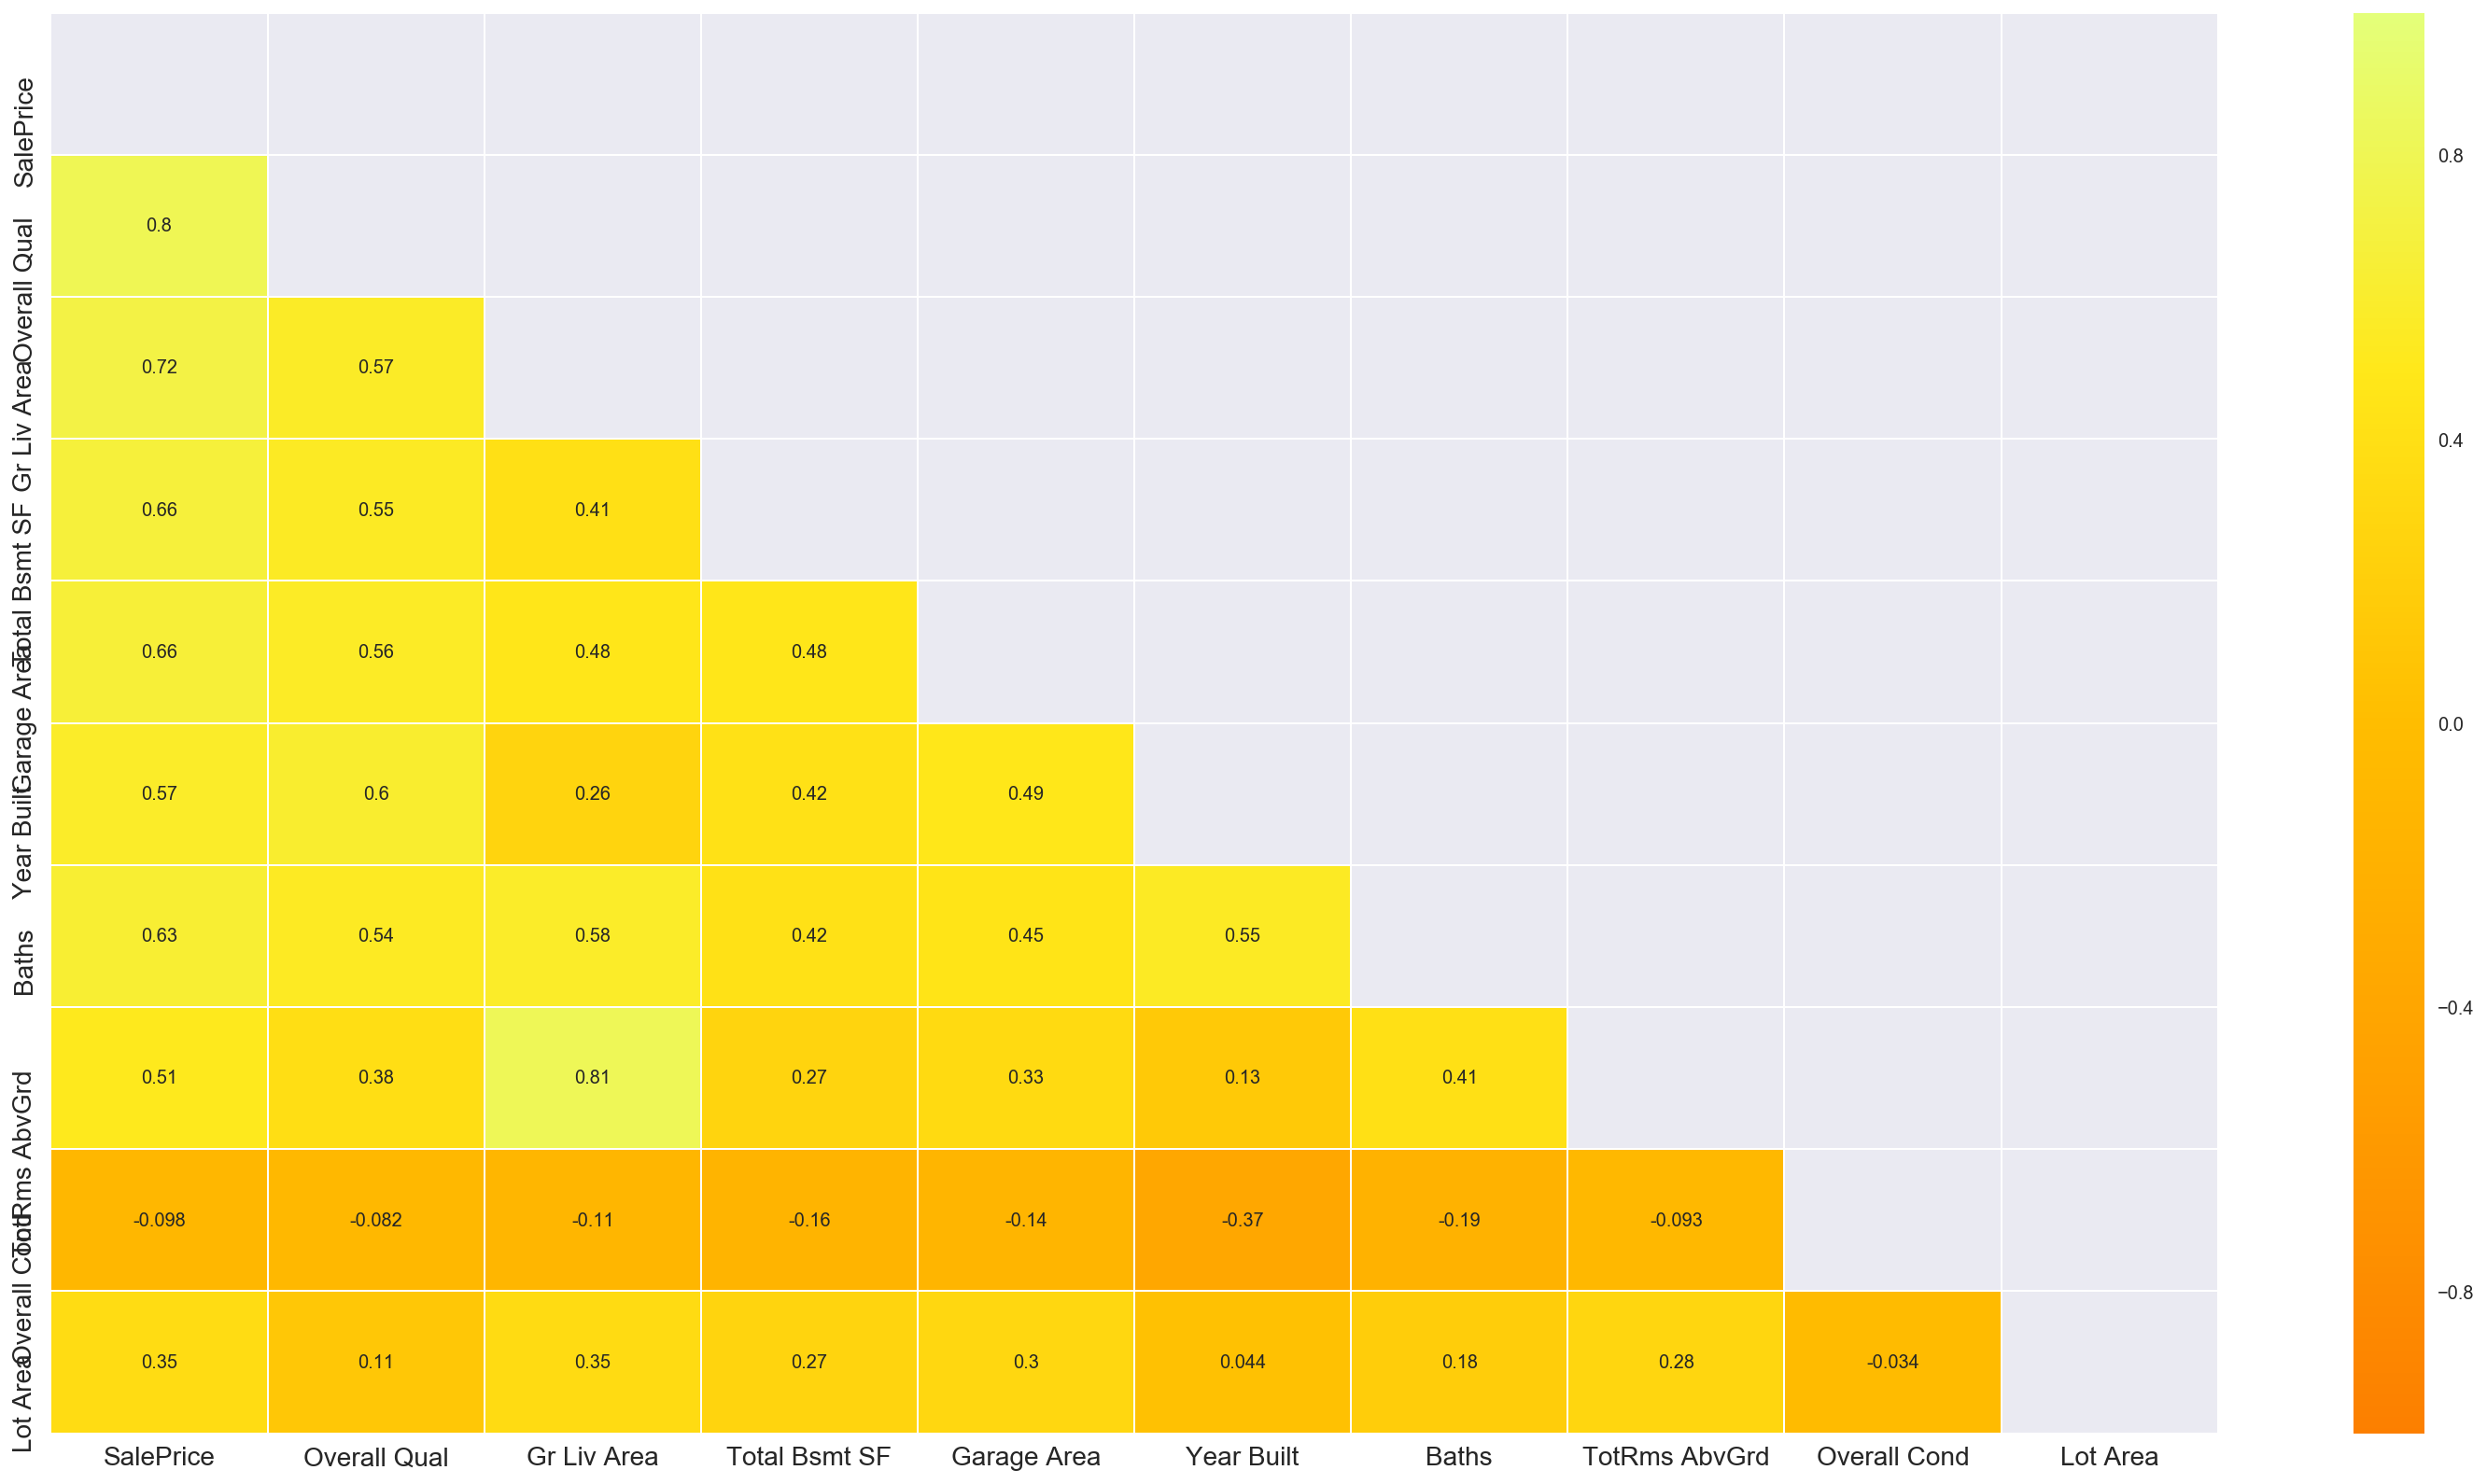

In [177]:
# Going to look over correltion data again and drop some of the lower correlations with the high 0.0 that I wasn't sure about
# the first time.
area5_corr = ames[['SalePrice','Overall Qual','Gr Liv Area','Total Bsmt SF','Garage Area','Year Built',
                  'Baths','TotRms AbvGrd','Overall Cond','Lot Area']].corr()

fig, ax = plt.subplots(figsize=(26,14))

mask = np.zeros_like(area5_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

ax = sns.heatmap(area5_corr, ax=ax, mask=mask, annot=True, cmap="Wistia_r", linewidths=.5)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

In [178]:
area5_corr.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
Overall Qual     0.912384
Total Bsmt SF    0.791579
Garage Area      0.788540
Baths            0.778712
Year Built       0.738699
Gr Liv Area      0.729170
TotRms AbvGrd    0.485228
Lot Area         0.063172
Overall Cond    -0.780081
Name: SalePrice, dtype: float64

# Part 4 a: Preprocessing, Scaling, and Creating train/test sets

In [179]:
#Setting y as target which is SalePrice and X are the feature columns that have been hand picked due to there correlation
#values and extensive EDA
y3 = ames['SalePrice']
X3 = ames[['Overall Qual','Total Bsmt SF','Baths','Garage Area','Year Built','Gr Liv Area','TotRms AbvGrd',
          'Lot Area','Overall Cond']]

In [180]:
# decided to changed the test size to see if that would make a difference
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.45)
print(X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape)

(1125, 9) (922, 9) (1125,) (922,)


In [181]:
ss = StandardScaler()  
ss.fit(X3_train)   
X3s_train = ss.transform(X3_train)  
X3s_test = ss.transform(X3_test)

# Part 4 b: Modeling on train split training data

In [182]:
# Fitting for Linear Regression
lr = LinearRegression()
lr.fit(X3s_train, y3_train)
print('Cross Val Score', cross_val_score(lr, X3s_train, y3_train, cv=10))

Cross Val Score [ 0.84452216  0.83239104  0.81887898  0.86827841  0.83086862  0.83874425
  0.85916692  0.88855353  0.8370879   0.8298283 ]


In [183]:
scores = cross_val_score(lr, X3s_train, y3_train, cv=10)
print('Scores mean', scores.mean(),'Scores std dev', scores.std())

Scores mean 0.844832010843 Scores std dev 0.020030845898


In [184]:
# These are the steps for fitting the RidegCV/model
alphas = np.logspace(0.1, 1.0, 10)
RCV= RidgeCV(alphas = alphas, cv=10)
print(RCV.fit(X3s_train, y3_train))
print('Optimal alpha', RCV.alpha_)
print('Cross Val Score', cross_val_score(RCV, X3s_train, y3_train, cv=10))
scoresRCV = cross_val_score(RCV, X3s_train, y3_train, cv=10)
print('Scores mean',scoresRCV.mean(),'Scores std dev', scoresRCV.std())

RidgeCV(alphas=array([  1.25893,   1.58489,   1.99526,   2.51189,   3.16228,   3.98107,
         5.01187,   6.30957,   7.94328,  10.     ]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)
Optimal alpha 10.0
Cross Val Score [ 0.84445172  0.83099746  0.81960497  0.86827854  0.83035923  0.8394743
  0.85907079  0.88923391  0.8377163   0.83085332]
Scores mean 0.845004054637 Scores std dev 0.020089456039


In [185]:
# These are the steps for LassoCV
LCV = LassoCV(n_alphas =250, cv=10)
print(LCV.fit(X3s_train, y3_train))
print('Optimal alpha',LCV.alpha_)
print('Cross Val Score', cross_val_score(LCV,X3s_train, y3_train, cv=10))
scoresLCV = cross_val_score(LCV, X3s_train, y3_train, cv=10)
print('Scores mean',scoresLCV.mean(),'Scores std dev', scoresLCV.std())

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=250, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
Optimal alpha 64.9402388997
Cross Val Score [ 0.84441328  0.83206895  0.81881935  0.86812157  0.83075776  0.83914151
  0.85936341  0.88885003  0.83703626  0.82993974]
Scores mean 0.844851185929 Scores std dev 0.020109443152


In [186]:
l1_ratios = np.linspace(0.01, 1.0, 25)
ENCV = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=50, cv=10,verbose=1)
ENCV.fit(X3s_train, y3_train)

print('Optimal alpha', ENCV.alpha_)
print('l1 ratio', ENCV.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Optimal alpha 63.1634275957
l1 ratio 1.0


...........................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    2.2s finished


In [187]:
enet = ElasticNet(alpha=ENCV.alpha_, l1_ratio=ENCV.l1_ratio_)

enet_scores = cross_val_score(enet, X3s_train, y3_train, cv=10)

print('Enet scores',enet_scores)
print('Enet scores mean',np.mean(enet_scores))

Enet scores [ 0.84441231  0.83206942  0.81882137  0.86811865  0.83075599  0.83913002
  0.85936499  0.88884777  0.83703878  0.82993556]
Enet scores mean 0.844849486944


# Part 4 c: Modeling on train split testing data

In [188]:
#Fitting for Linear FRegression
lr = LinearRegression()
lr.fit(X3s_train, y3_train)
print(lr.score(X3s_test, y3_test))
print('Cross Val Score', cross_val_score(lr, X3s_test, y3_test, cv=10))
print(lr.coef_)

0.825929249944
Cross Val Score [ 0.80972602  0.84281342  0.86193291  0.83402926  0.72154734  0.8513668
  0.82695524  0.81828671  0.86518572  0.78284665]
[ 24918.96332068  15730.28464875   5244.32866886   9493.06233394
  10992.68677526  27651.64323747  -2991.07520846   6523.08024083
   5559.87589948]


In [189]:
scores = cross_val_score(lr, X3s_test, y3_test, cv=10)
print('Scores mean', scores.mean(),'Scores std dev', scores.std())

Scores mean 0.821469008042 Scores std dev 0.0408776813615


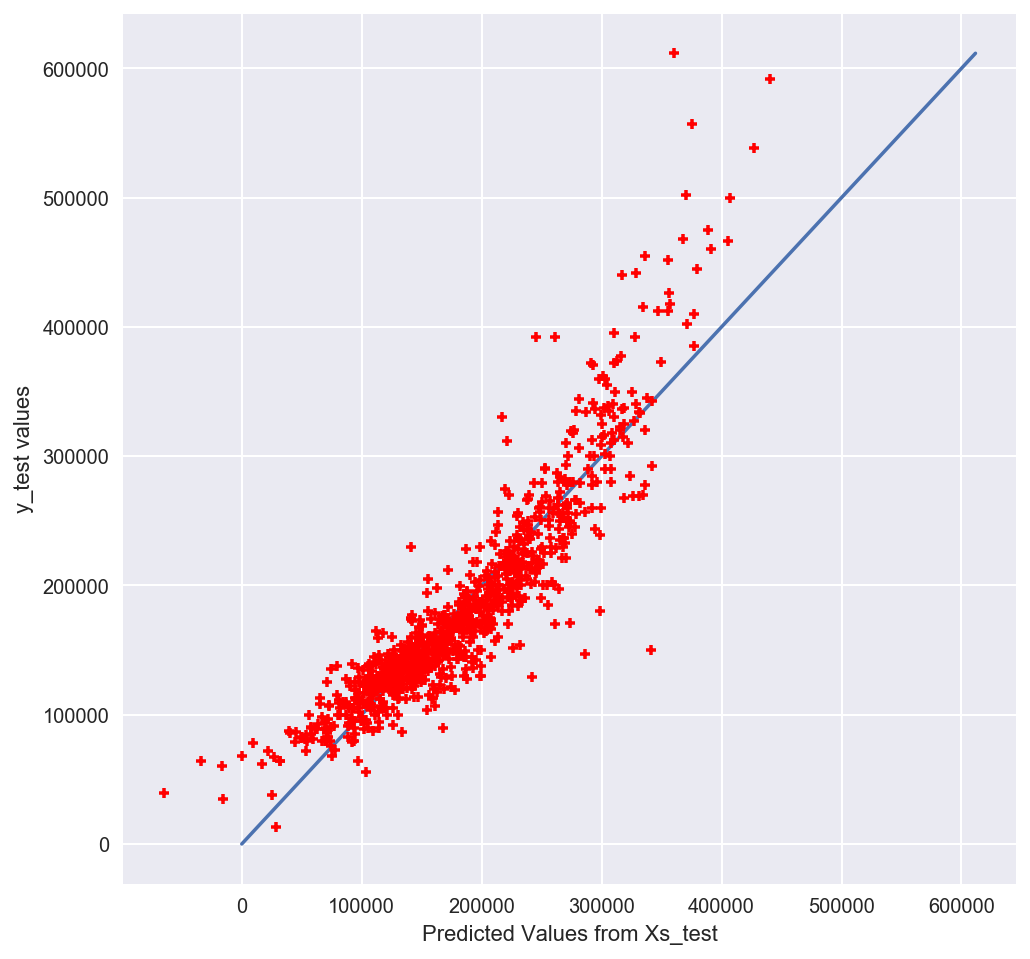

score:  0.825929249944


In [190]:
lrtest = lr.fit(X3s_train, y3_train)

predictions  =  lrtest.predict(X3s_test)
score        =  lrtest.score(X3s_test, y3_test)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y3_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Xs_test")
plt.ylabel("y_test values")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

print("score: ", score)

In [191]:
# These are the steps for fitting the RidegCV/model
alphas = np.logspace(0, 5, 10)
RCV= RidgeCV(alphas = alphas, cv=10)
print(RCV.fit(X3s_train, y3_train))
print(RCV.score(X3s_test, y3_test))
print('Optimal alpha', RCV.alpha_)
print('Cross Val Score', cross_val_score(RCV, X3s_test, y3_test, cv=10))
scoresRCV = cross_val_score(RCV, X3s_test, y3_test, cv=10)
print('Scores mean',scoresRCV.mean(),'Scores std dev', scoresRCV.std())

RidgeCV(alphas=array([  1.00000e+00,   3.59381e+00,   1.29155e+01,   4.64159e+01,
         1.66810e+02,   5.99484e+02,   2.15443e+03,   7.74264e+03,
         2.78256e+04,   1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)
0.82600929428
Optimal alpha 12.9154966501
Cross Val Score [ 0.80914819  0.844104    0.86139061  0.83390933  0.72325796  0.85122973
  0.82824241  0.81901477  0.86392744  0.78197859]
Scores mean 0.821620304435 Scores std dev 0.0404445758743


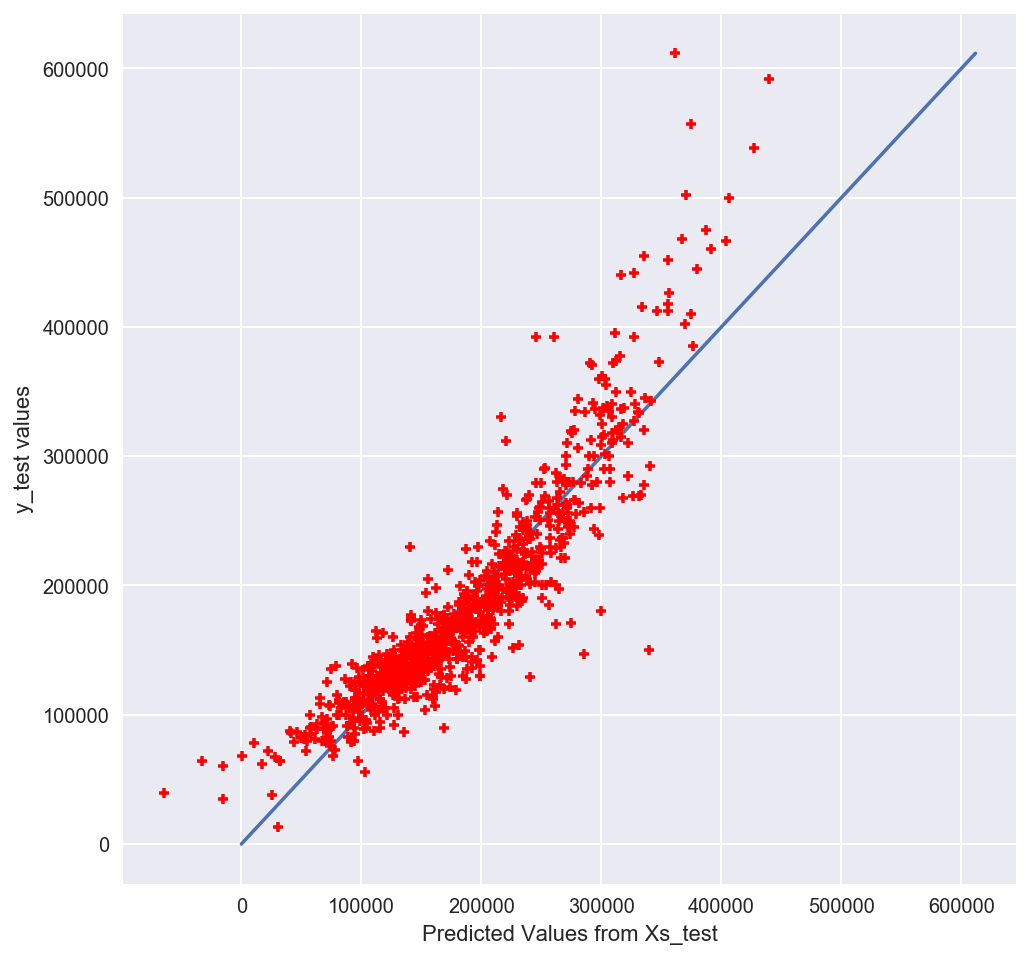

score:  0.82600929428


In [192]:
RCVtest = RCV.fit(X3s_train, y3_train)

predictions  =  RCVtest.predict(X3s_test)
score        =  RCVtest.score(X3s_test, y3_test)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y3_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Xs_test")
plt.ylabel("y_test values")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

print("score: ", score)

In [193]:
# These are the steps for LassoCV
LCV = LassoCV(n_alphas =100, cv=10)
print(LCV.fit(X3s_train, y3_train))
print(LCV.score(X3s_test, y3_test))
print('Optimal alpha',LCV.alpha_)
print('Cross Val Score', cross_val_score(LCV,X3s_test, y3_test, cv=10))
scoresLCV = cross_val_score(LCV, X3s_test, y3_test, cv=10)
print('Scores mean',scoresLCV.mean(),'Scores std dev', scoresLCV.std())

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
0.825895297657
Optimal alpha 63.1634275957
Cross Val Score [ 0.80738257  0.8464259   0.86040024  0.83204088  0.72212392  0.85006708
  0.82752369  0.81876898  0.86346764  0.78200919]
Scores mean 0.821021008145 Scores std dev 0.0406188148284


In [194]:
# ElasticNetCV set up
l1_ratios = np.linspace(0.01, 1.0, 25)
ENCV = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,verbose=1)
ENCV.fit(X3s_train, y3_train)
print(ENCV.score(X3s_test, y3_test))
print('Optimal alpha', ENCV.alpha_)
print('l1 ratio', ENCV.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.825895297657
Optimal alpha 63.1634275957
l1 ratio 1.0


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    4.3s finished


In [195]:
enet = ElasticNet(alpha=ENCV.alpha_, l1_ratio=ENCV.l1_ratio_)

enet_scores = cross_val_score(enet, X3s_test, y3_test, cv=10)

print('Enet scores',enet_scores)
print('Enet scores mean',np.mean(enet_scores))

Enet scores [ 0.80928479  0.84333763  0.86180205  0.83375702  0.72209973  0.85114123
  0.82750242  0.81807097  0.86495898  0.7825212 ]
Enet scores mean 0.821447600372


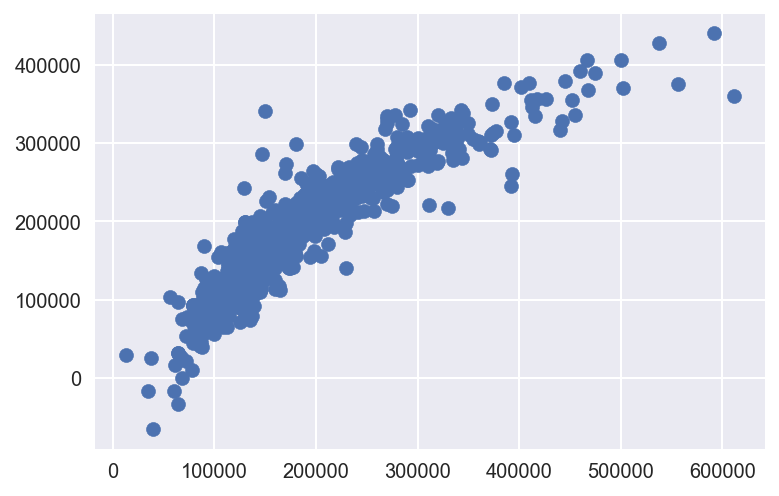

In [196]:
pred =  lr.predict(X3s_test)
plt.scatter(y3_test,pred )
plt.show()

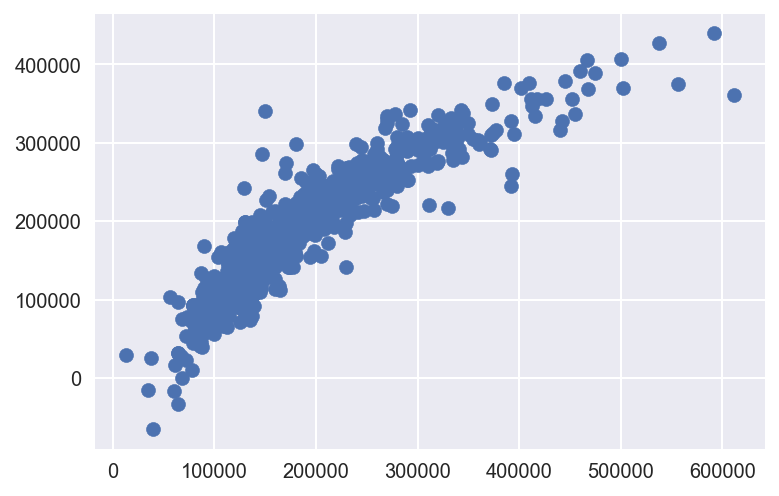

In [197]:
pred =  ENCV.predict(X3s_test)
plt.scatter(y3_test,pred )
plt.show()

# K Fold Cross Validation

In [198]:
y3 = ames['SalePrice']
X3 = ames[['Overall Qual','Total Bsmt SF','Baths','Garage Area','Year Built','Gr Liv Area','TotRms AbvGrd'
       ,'Lot Area','Overall Cond']]
X3=X3.values
y3=y3.values
print(y3.shape, X3.shape)

(2047,) (2047, 9)


In [199]:
kfolds= KFold(5)

In [200]:
for training_index, test_index in kfolds.split(X3, y3):
    print('training: ', training_index[0:6], '...', training_index[-7:-1], 
          '\ntest: ', test_index[0:6], '...', test_index[-7:-1], '\n')

training:  [410 411 412 413 414 415] ... [2040 2041 2042 2043 2044 2045] 
test:  [0 1 2 3 4 5] ... [403 404 405 406 407 408] 

training:  [0 1 2 3 4 5] ... [2040 2041 2042 2043 2044 2045] 
test:  [410 411 412 413 414 415] ... [813 814 815 816 817 818] 

training:  [0 1 2 3 4 5] ... [2040 2041 2042 2043 2044 2045] 
test:  [820 821 822 823 824 825] ... [1222 1223 1224 1225 1226 1227] 

training:  [0 1 2 3 4 5] ... [2040 2041 2042 2043 2044 2045] 
test:  [1229 1230 1231 1232 1233 1234] ... [1631 1632 1633 1634 1635 1636] 

training:  [0 1 2 3 4 5] ... [1631 1632 1633 1634 1635 1636] 
test:  [1638 1639 1640 1641 1642 1643] ... [2040 2041 2042 2043 2044 2045] 



Fold 0 - r^2 score: 0.828228530127 mse: 1081346360.51


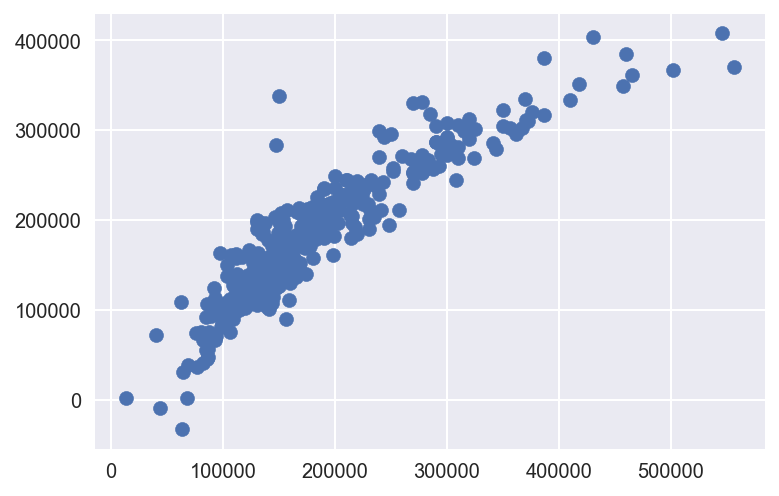

Fold 1 - r^2 score: 0.844229334923 mse: 926661962.68


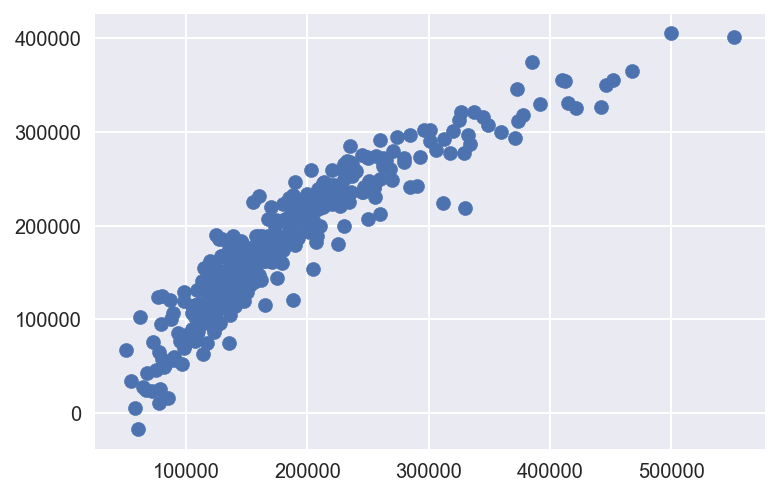

Fold 2 - r^2 score: 0.844636246766 mse: 997218772.457


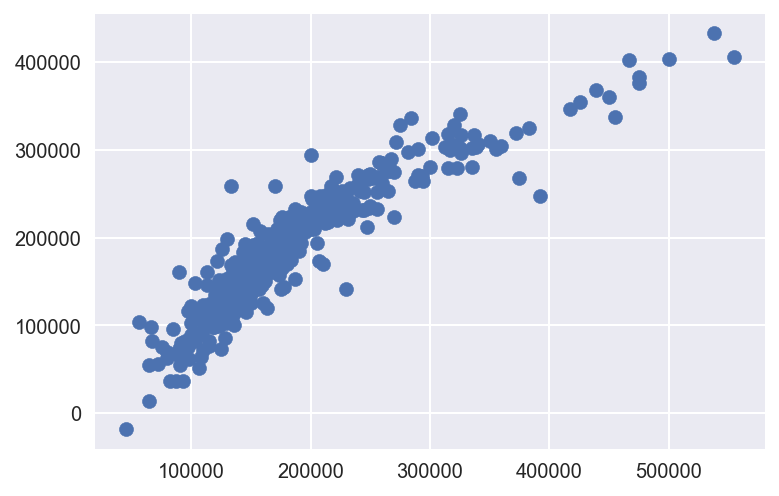

Fold 3 - r^2 score: 0.862356010184 mse: 787181371.49


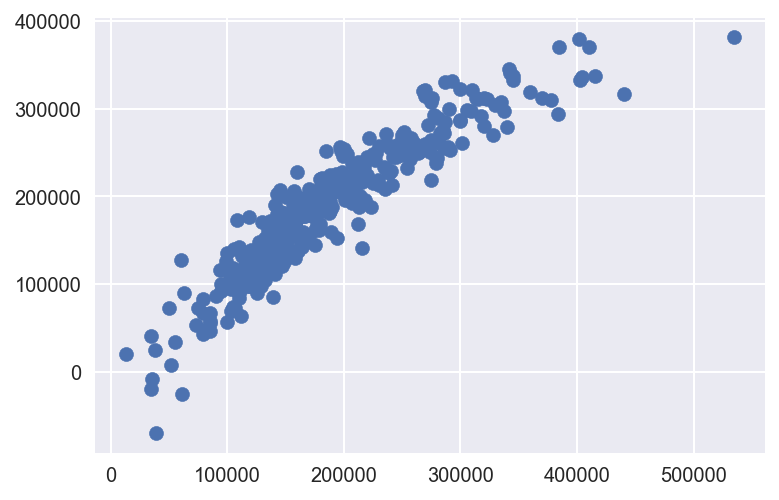

Fold 4 - r^2 score: 0.822574464094 mse: 1236463250.51


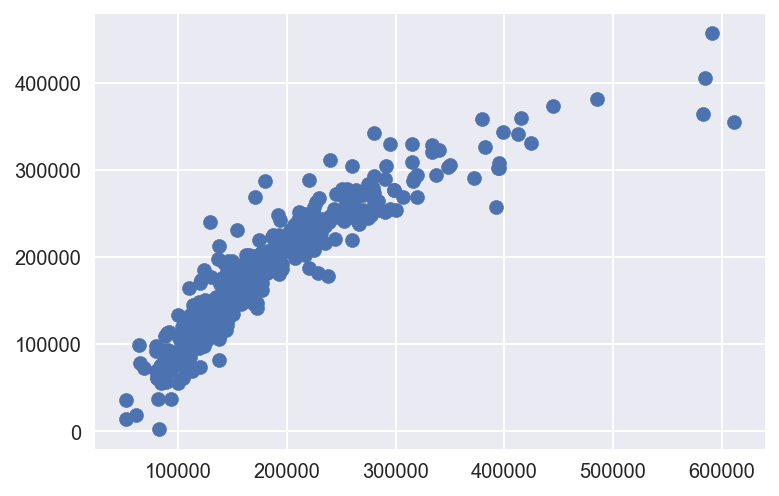

In [201]:
counter = 0
lr = LinearRegression()
for training_index, test_index in kfolds.split(X3,y3):
    X3_train = X3[training_index]
    X3_test = X3[test_index]
    y3_train = y3[training_index]
    y3_test = y3[test_index]
    lr.fit(X3_train, y3_train)
    r2_score = lr.score(X3_test, y3_test)
    fold_predictions = lr.predict(X3_test)
    mse_score = mean_squared_error(y3_test, fold_predictions)
    plt.scatter(y3_test, fold_predictions)
    print('Fold', counter, '- r^2 score:', r2_score, 'mse:', mse_score)
    plt.show()
    counter += 1

# Part 4 d.1:  Load test data

In [202]:
# This is the test set
test3 = pd.read_csv('test.csv')

# Part 4 d.2: Additional EDA for test set

In [203]:
test3['Baths'] = test3['Bsmt Full Bath'] + 0.5 * test3['Bsmt Half Bath'] + test3['Full Bath'] + 0.5 * test3['Half Bath']

In [204]:
test3.drop(['Bsmt Full Bath', 'Bsmt Half Bath','Full Bath','Half Bath'], axis=1, inplace = True)

In [205]:
print(test3['Lot Frontage'].describe())
from scipy.stats import mode

print('Mode', mode(test3['Lot Frontage']))

count    719.000000
mean      69.630042
std       23.625372
min       21.000000
25%       59.000000
50%       68.000000
75%       80.000000
max      182.000000
Name: Lot Frontage, dtype: float64
Mode ModeResult(mode=array([ 60.]), count=array([97]))


In [206]:
strategy = 'median' 

LF_imputer = Imputer(strategy=strategy)
LF_imputer.fit(test3[['Lot Frontage']])

LFs = LF_imputer.transform(
    test3[['Lot Frontage']])
print(LFs[0:5], LFs.mean())

[[ 69.]
 [ 68.]
 [ 58.]
 [ 60.]
 [ 68.]] 69.3333333333


In [207]:
test3['Lot Frontage']=LFs

# Part 4 d.3: Preprocessing and Scaling for test data

In [208]:
X3pred = test3[['Overall Qual','Total Bsmt SF','Baths','Garage Area','Year Built','Gr Liv Area','TotRms AbvGrd',
       'Lot Area','Overall Cond']]

In [209]:
ss = StandardScaler()  
ss.fit(X3_train)   
X3s_train = ss.transform(X3_train)  
X3ss_test = ss.transform(X3pred)

# Part 4 d.4: Modeling in test data

In [210]:
# LinearRegression scores  
lr = LinearRegression()
lr.fit(X3s_train, y_train)
predictions =lr.predict(X3ss_test)
print(predictions)

[  1.81680656e+05   2.06503263e+05   2.10675731e+05   1.08061281e+05
   1.82894426e+05   8.15438502e+04   9.90181841e+04   1.56468422e+05
   2.10427768e+05   1.80383555e+05   1.72122739e+05   1.31248868e+05
   1.73412503e+05   3.07342683e+05   1.62283637e+05   9.35441963e+04
   1.71192605e+05   1.25886227e+05   2.06027904e+05   2.16283573e+05
   1.39154064e+05   1.27913095e+05   2.16300806e+05   1.72938536e+05
   2.06665985e+05   1.15994582e+05   1.11667068e+05   1.05781777e+05
   1.54727969e+05   1.44990201e+04   1.05594252e+05   8.78761666e+04
   2.49655456e+05   1.52056117e+05   2.29624493e+05   1.95580504e+05
   1.04230288e+05   6.98347072e+04   8.90912226e+04   2.11698431e+05
   1.57515458e+05   2.15867503e+05   1.48191788e+05   1.53647229e+05
   2.20434636e+05   8.02396364e+04   2.31639545e+05   1.07710399e+05
   1.18978473e+05   1.22879667e+05   1.05086284e+05   2.26785490e+05
   2.66028391e+05   1.19201027e+05   8.06075765e+04   1.63516323e+05
   1.88767665e+05   1.42378349e+05

In [211]:
# These are the steps for fitting the RidegCV/model
alphas = np.logspace(0, 5, 10)
RCV= RidgeCV(alphas = alphas, cv=10)
print(RCV.fit(X3s_train, y3_train))
predictions =RCV.predict(X3ss_test)
print(predictions)

RidgeCV(alphas=array([  1.00000e+00,   3.59381e+00,   1.29155e+01,   4.64159e+01,
         1.66810e+02,   5.99484e+02,   2.15443e+03,   7.74264e+03,
         2.78256e+04,   1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)
[  1.81918944e+05   2.07208328e+05   2.10960794e+05   1.08251259e+05
   1.83051005e+05   8.15983290e+04   9.89321535e+04   1.56002530e+05
   2.09061967e+05   1.80576253e+05   1.71986017e+05   1.31093209e+05
   1.72850303e+05   3.07361014e+05   1.62293303e+05   9.36750548e+04
   1.72021448e+05   1.26057003e+05   2.05665844e+05   2.16066788e+05
   1.39435816e+05   1.28537060e+05   2.15865868e+05   1.72770504e+05
   2.06559832e+05   1.16065432e+05   1.11844304e+05   1.05882455e+05
   1.55111264e+05   1.50067211e+04   1.05684446e+05   8.79395254e+04
   2.48694537e+05   1.52018450e+05   2.29338745e+05   1.95246545e+05
   1.04747474e+05   6.99652450e+04   8.91949372e+04   2.11316796e+05
   1.57175922e+05 

In [212]:
LCV = LassoCV(n_alphas =100, cv=10)
print(LCV.fit(X3s_train, y3_train))
predictions = LCV.predict(X3ss_test)
print(predictions)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
[  1.81885528e+05   2.06979408e+05   2.10744509e+05   1.08183116e+05
   1.82930983e+05   8.14667745e+04   9.89077504e+04   1.56112307e+05
   2.09618111e+05   1.80373549e+05   1.72014206e+05   1.31275114e+05
   1.73251834e+05   3.06806718e+05   1.62588326e+05   9.37703239e+04
   1.71621565e+05   1.25916515e+05   2.05703661e+05   2.16411792e+05
   1.39116513e+05   1.28011785e+05   2.15883739e+05   1.72725617e+05
   2.06661608e+05   1.15974154e+05   1.11796630e+05   1.06127564e+05
   1.54848169e+05   1.46154438e+04   1.05413892e+05   8.78961437e+04
   2.49335461e+05   1.51867279e+05   2.29510268e+05   1.95492306e+05
   1.04706907e+05   6.97729847e+04   8.91100173e+04   2.11508707e+05
   1.57189859e+05   2.16369896e+05   1.48401018e+05   1.53480925e+05


In [213]:
l1_ratios = np.linspace(0.01, 1.0, 25)
ENCV = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,verbose=1)
ENCV.fit(X3s_train, y3_train)
predictions = ENCV.predict(X3ss_test)
print(predictions)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[  1.81885528e+05   2.06979408e+05   2.10744509e+05   1.08183116e+05
   1.82930983e+05   8.14667745e+04   9.89077504e+04   1.56112307e+05
   2.09618111e+05   1.80373549e+05   1.72014206e+05   1.31275114e+05
   1.73251834e+05   3.06806718e+05   1.62588326e+05   9.37703239e+04
   1.71621565e+05   1.25916515e+05   2.05703661e+05   2.16411792e+05
   1.39116513e+05   1.28011785e+05   2.15883739e+05   1.72725617e+05
   2.06661608e+05   1.15974154e+05   1.11796630e+05   1.06127564e+05
   1.54848169e+05   1.46154438e+04   1.05413892e+05   8.78961437e+04
   2.49335461e+05   1.51867279e+05   2.29510268e+05   1.95492306e+05
   1.04706907e+05   6.97729847e+04   8.91100173e+04   2.11508707e+05
   1.57189859e+05   2.16369896e+05   1.48401018e+05   1.53480925e+05
   2.20110595e+05   8.02045720e+04   2.31344479e+05   1.08032858e+05
   1.18746812e+05   1.22933703e+05   1.05285278e+05   2.26409746e+05
   2.66086992e+05   1.19235837e+05   8.09500552e+04   1.63335989e+05
   1.89014418e+05   1.42432729e+05

......................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    4.4s finished


# Submissions Round 3

In [214]:
lr_sub3 =pd.DataFrame()
lr_sub3['Id']=test3['Id']
lr_sub3['SalePrice']=predictions

In [215]:
lr_sub3.head()

Id      SalePrice
0  2658  181885.527599
1  2718  206979.407561
2  2414  210744.509196
3  1989  108183.116312
4   625  182930.982941

In [216]:
lr_sub3.to_csv(path_or_buf='Submission3_lr', index=False)

In [217]:
RCV_sub3 =pd.DataFrame()
RCV_sub3['Id']=test3['Id']
RCV_sub3['SalePrice']=predictions

In [218]:
RCV_sub3.head()

Id      SalePrice
0  2658  181885.527599
1  2718  206979.407561
2  2414  210744.509196
3  1989  108183.116312
4   625  182930.982941

In [219]:
RCV_sub3.to_csv(path_or_buf='Submission3_RCV', index=False)

In [220]:
LCV_sub3 =pd.DataFrame()
LCV_sub3['Id']=test3['Id']
LCV_sub3['SalePrice']=predictions

In [221]:
LCV_sub3.head()

Id      SalePrice
0  2658  181885.527599
1  2718  206979.407561
2  2414  210744.509196
3  1989  108183.116312
4   625  182930.982941

In [222]:
LCV_sub3.to_csv(path_or_buf='Submission3_LCV', index=False)

In [223]:
ENCV_sub3 =pd.DataFrame()
ENCV_sub3['Id']=test3['Id']
ENCV_sub3['SalePrice']=predictions

In [224]:
ENCV_sub3.head()

Id      SalePrice
0  2658  181885.527599
1  2718  206979.407561
2  2414  210744.509196
3  1989  108183.116312
4   625  182930.982941

In [225]:
ENCV_sub3.to_csv(path_or_buf='Submission3_ENCV', index=False)

# Summary of result findings
 Changing the number of features and the train_test split does not always mean the results will increase with less features; decreased complexitity does not lead to a better value in all cases. There has to be a balance with variance and bias. I had better scores with my second round of submission and I had more features and a lower train_test split. This could be due to the correlation of features, they might have had a better relationship to each other and better multicollinearity, where one variable is changed another will effect the value of another. This could have made difference since I was working with features that were highly correlated.
 I also thought about changing the categorical data to values by using get dummy or some other method but decided it wasn't worth the time. Not that it would not have been interesting to do but I thought those features would not have made a large enough impact on the modeling. 
 I also would have liked to try different modeling techniques. The ones I choose were goodand worked well with good R2 values and alphas but I feel they were it the same 'family' which is why the results were so close in comparison and the hyperparameters are so similar that its difficult to introduce new parameters which may have been more selective and given a better r2 and RMSE score. 
 If I had more time I would have tried LogisticRegression, spent some more time experimenting with the hyperparmaters on ENCV, and tried some more regualization techniques to see if my data had a bias/variance issue that wwas casuing issues.

# Part 5 Classification

Load train set

In [226]:
y2 = ames['Sale Condition'].map(lambda x: 1 if x in ['Abnorml'] else 0)
X2 = ames[['Overall Qual','Total Bsmt SF','Baths','Garage Area','Year Built','Gr Liv Area','TotRms AbvGrd','Fireplaces',
       'Lot Frontage','Lot Area','Overall Cond']]

# Part 5 a: EDA 

In [227]:
# set up baseline
# Baseline = 93.6%
y2.value_counts()/ len(y2)

0    0.935515
1    0.064485
Name: Sale Condition, dtype: float64

In [228]:
y2.head()

0    0
1    0
2    1
3    0
4    0
Name: Sale Condition, dtype: int64

# Part 5 b: Preprocessing and Scaling for training data

In [229]:
ss = StandardScaler()
X2s = ss.fit_transform(X2)

# Part 5 c: Modeling in training data

In [230]:
lrSVC = SVC(kernel = 'linear')
print('Cross Val Score', cross_val_score(lrSVC, X2s, y2, cv=10))
scoreslrSVC = cross_val_score(lrSVC, X2s, y2, cv=10)
print('Scores mean',scoreslrSVC.mean(),'Scores std dev', scoreslrSVC.std())

Cross Val Score [ 0.93203883  0.93203883  0.93658537  0.93658537  0.93658537  0.93627451
  0.93627451  0.93627451  0.93627451  0.93627451]
Scores mean 0.935520631648 Scores std dev 0.00174609434533


In [231]:
rbfSVC = SVC(kernel = 'rbf')
print('Cross Val Score', cross_val_score(rbfSVC, X2s, y2, cv=10))
scoresrbfSVC = cross_val_score(rbfSVC, X2s, y2, cv=10)
print('Scores mean',scoresrbfSVC.mean(),'Scores std dev', scoresrbfSVC.std())

Cross Val Score [ 0.93203883  0.93203883  0.93658537  0.93658537  0.93658537  0.93627451
  0.93627451  0.93627451  0.93627451  0.93627451]
Scores mean 0.935520631648 Scores std dev 0.00174609434533


In [232]:
# setting up for classification report and confusion matrix
def print_cm_cr(y2_true, y2_pred):
    confusion = pd.crosstab(y2_true, y2_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    print(confusion)
    print()
    print(classification_report(y2_true, y2_pred))

In [233]:
# Setting up train test split  for lrSVC
X2s_train, X2s_test, y2_train, y2_test = train_test_split(X2s, y2, stratify=y2, test_size=0.33)
lrSVC.fit(X2s_train, y2_train)
y2_pred = lrSVC.predict(X2s_test)
print_cm_cr(y2_test, y2_pred)

Predicted    0  All
Actual             
0          632  632
1           44   44
All        676  676

             precision    recall  f1-score   support

          0       0.93      1.00      0.97       632
          1       0.00      0.00      0.00        44

avg / total       0.87      0.93      0.90       676



C:\Users\emmag\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [234]:
# Setting up train test split  for rbfSVC
rbfSVC.fit(X2s_train, y2_train)
y_pred = rbfSVC.predict(X2s_test)
print_cm_cr(y2_test, y_pred)

Predicted    0  All
Actual             
0          632  632
1           44   44
All        676  676

             precision    recall  f1-score   support

          0       0.93      1.00      0.97       632
          1       0.00      0.00      0.00        44

avg / total       0.87      0.93      0.90       676



C:\Users\emmag\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [235]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X2s_train, y2_train)
print(knn.score(X2s_test, y2_test))

0.934911242604


In [236]:
y_pred = knn.predict(X2s_test)
#print(y_pred)

In [237]:
y_pp = knn.predict_proba(X2s_test)
print(y_pp)

[[ 0.92  0.08]
 [ 0.96  0.04]
 [ 0.84  0.16]
 ..., 
 [ 0.88  0.12]
 [ 0.96  0.04]
 [ 0.84  0.16]]


In [238]:
conmat = np.array(confusion_matrix(y2_test, y_pred, labels=[0,1]))
confusion = pd.DataFrame(conmat, index= ['is_normal', 'is_abnormal'],
                                 columns = ['predicted_normal', 'predicted_abnormal'])
confusion

predicted_normal  predicted_abnormal
is_normal                 632                   0
is_abnormal                44                   0

# Part 5 d.1: Load test data

In [239]:
# This is the test set
test2 = pd.read_csv('test.csv')

# Part 5 d.2: Additional EDA for test set

In [240]:
test2['Baths'] = test2['Bsmt Full Bath'] + 0.5 * test2['Bsmt Half Bath'] + test2['Full Bath'] + 0.5 * test2['Half Bath']

In [241]:
test2.drop(['Bsmt Full Bath', 'Bsmt Half Bath','Full Bath','Half Bath'], axis=1, inplace = True)

In [242]:
print(test2['Lot Frontage'].describe())
from scipy.stats import mode

print('Mode', mode(test2['Lot Frontage']))

count    719.000000
mean      69.630042
std       23.625372
min       21.000000
25%       59.000000
50%       68.000000
75%       80.000000
max      182.000000
Name: Lot Frontage, dtype: float64
Mode ModeResult(mode=array([ 60.]), count=array([97]))


In [243]:
strategy = 'median' 

LF_imputer = Imputer(strategy=strategy)
LF_imputer.fit(test2[['Lot Frontage']])

LFs = LF_imputer.transform(
    test2[['Lot Frontage']])
print(LFs[0:5], LFs.mean())

[[ 69.]
 [ 68.]
 [ 58.]
 [ 60.]
 [ 68.]] 69.3333333333


In [244]:
test2['Lot Frontage']=LFs

# Part 5 d.3: Preprocessing and Scaling for test data

In [245]:
X2pred = test2[['Overall Qual','Total Bsmt SF','Baths','Garage Area','Year Built','Gr Liv Area','TotRms AbvGrd','Fireplaces',
       'Lot Frontage','Lot Area','Overall Cond']]

# Part 5 d.4: Modeling on test data

In [246]:
# Setting up train test split  for lrSVC
X2s_train, X2s_test, y2_train, y2_test = train_test_split(X2s, y2, stratify=y2, test_size=0.33)
lrSVC.fit(X2s_train, y2_train)
predictions =lrSVC.predict(X2pred)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [247]:
rbfSVC.fit(X2s_train, y2_train)
predictions = rbfSVC.predict(X2pred)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [248]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X2s_train, y2_train)
predictions = knn.predict(X2pred)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# Summary of result findings
 There seems to be a high bias in my data selection that is coming from my traget. This was deduced by the the fact that when running confusion matrix and classification report the predictor results had no ones while the actual had 0s and 1s which was desired and expected results. This worked in my favor since that was what the challenge was looking for but in real life this would not be acceptable and it would have to be retified.
 My target is imbalanced which is causing there to be more 0s if not almost all 0s. How could this  be fixed? I could have done some more preprocessing and looked at the threshold especially since the baseline accuracy is so high in the test set. I could just start over from scratch and reprocess my data and take a closer look at my target data and see if there are outliers involved somewhere with other features. I could adjust the weight cost at the algorthim level through a possible emsemble technique such as Ada or Gradient Boost. 
 With such a high baseline accuracy score I should have run np.unique to see if in fact I was unbalanced and only predicting 0s while ignoring all the 1s. From my research it seems to be the best way to solve this problem would be to A. Scrap it and start over B. Use an ensemble technique C. Change my perfromance metrics and try AUROC, it would have helped me understand that my model wasn't distinguishing the observations between the two classes in a balanced way.

# Submissions Round 1

In [249]:
lrSVC_sub1 =pd.DataFrame()
lrSVC_sub1['Id']=test2['Id']
lrSVC_sub1['Sale Condition']=predictions

In [250]:
lrSVC_sub1.head()

Id  Sale Condition
0  2658               0
1  2718               0
2  2414               0
3  1989               0
4   625               0

In [251]:
lrSVC_sub1.to_csv(path_or_buf='Submission1_SVC', index=False)

In [252]:
rbfSVC_sub1 =pd.DataFrame()
rbfSVC_sub1['Id']=test2['Id']
rbfSVC_sub1['Sale Condition']=predictions

In [253]:
rbfSVC_sub1.head()

Id  Sale Condition
0  2658               0
1  2718               0
2  2414               0
3  1989               0
4   625               0

In [254]:
rbfSVC_sub1.to_csv(path_or_buf='Submission1_RBF', index=False)

In [255]:
knn_sub1 =pd.DataFrame()
knn_sub1['Id']=test2['Id']
knn_sub1['Sale Condition']=predictions

In [256]:
knn_sub1.head()

Id  Sale Condition
0  2658               0
1  2718               0
2  2414               0
3  1989               0
4   625               0

In [257]:
knn_sub1.to_csv(path_or_buf='Submission1_KNN', index=False)